In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [3]:
pwd = os.getcwd() # current directory

In [4]:
df = pd.read_csv(pwd+'/Encoded_dataset/df_encoded_FF.csv') # Loading encoded dataset for FF
print(df.shape) # Print shape of the dataset
df.head()

(26457, 30)


Cell_architecture  Cell_flexible  Cell_semitransparent  \
0           0.653286              0                     0   
1           0.670308              0                     0   
2           0.653286              0                     0   
3           0.653286              0                     0   
4           0.653286              0                     0   

   Substrate_stack_sequence  ETL_stack_sequence  ETL_thickness  \
0                  0.652116            0.649305          370.0   
1                  0.671036            0.719703          279.6   
2                  0.652116            0.645703          480.0   
3                  0.671036            0.650048          279.6   
4                  0.652116            0.645703          230.0   

   ETL_deposition_procedure  Perovskite_dimension_2D  \
0                  0.675102                        0   
1                  0.660002                        0   
2                  0.662964                        0   
3                  0.652413                        0   
4                  0.662964                        1   

   Perovskite_dimension_2D3D_mixture  Perovskite_dimension_3D  ...  \
0                                  0                        1  ...   
1                                  0                        1  ...   
2                                  0                        1  ...   
3                                  0                        1  ...   
4                                  0                        0  ...   

   Perovskite_deposition_thermal_annealing_temperature  \
0                                           0.643467     
1                                           0.692515     
2                                           0.601828     
3                                           0.662327     
4                                           0.652178     

   Perovskite_deposition_thermal_annealing_time  \
0                                      0.647860   
1                                      0.693115   
2                                      0.596372   
3                                      0.657580   
4                                      0.675118   

   Perovskite_deposition_solvent_annealing  HTL_stack_sequence  \
0                                        0            0.658181   
1                                        0            0.692365   
2                                        0            0.624823   
3                                        0            0.658181   
4                                        0            0.658181   

   HTL_thickness_list  HTL_deposition_procedure  Backcontact_stack_sequence  \
0               148.0                  0.658377                    0.657498   
1                34.0                  0.658377                    0.664057   
2               218.0                  0.646018                    0.657498   
3                34.0                  0.658377                    0.664057   
4                20.0                  0.658377                    0.657498   

   Backcontact_thickness_list  Backcontact_deposition_procedure  JV_default_FF  
0                        80.0                          0.660435          0.678  
1                       100.0                          0.660435          0.783  
2                        50.0                          0.660435          0.436  
3                       100.0                          0.660435          0.660  
4                        80.0                          0.660435          0.708  

[5 rows x 30 columns]

In [5]:
X = df.iloc[:,:-1] # Features
y = df['JV_default_FF'] # Target variable

In [6]:
X.head()

Cell_architecture  Cell_flexible  Cell_semitransparent  \
0           0.653286              0                     0   
1           0.670308              0                     0   
2           0.653286              0                     0   
3           0.653286              0                     0   
4           0.653286              0                     0   

   Substrate_stack_sequence  ETL_stack_sequence  ETL_thickness  \
0                  0.652116            0.649305          370.0   
1                  0.671036            0.719703          279.6   
2                  0.652116            0.645703          480.0   
3                  0.671036            0.650048          279.6   
4                  0.652116            0.645703          230.0   

   ETL_deposition_procedure  Perovskite_dimension_2D  \
0                  0.675102                        0   
1                  0.660002                        0   
2                  0.662964                        0   
3                  0.652413                        0   
4                  0.662964                        1   

   Perovskite_dimension_2D3D_mixture  Perovskite_dimension_3D  ...  \
0                                  0                        1  ...   
1                                  0                        1  ...   
2                                  0                        1  ...   
3                                  0                        1  ...   
4                                  0                        0  ...   

   Perovskite_deposition_quenching_induced_crystallisation  \
0                                                  0         
1                                                  1         
2                                                  0         
3                                                  1         
4                                                  0         

   Perovskite_deposition_thermal_annealing_temperature  \
0                                           0.643467     
1                                           0.692515     
2                                           0.601828     
3                                           0.662327     
4                                           0.652178     

   Perovskite_deposition_thermal_annealing_time  \
0                                      0.647860   
1                                      0.693115   
2                                      0.596372   
3                                      0.657580   
4                                      0.675118   

   Perovskite_deposition_solvent_annealing  HTL_stack_sequence  \
0                                        0            0.658181   
1                                        0            0.692365   
2                                        0            0.624823   
3                                        0            0.658181   
4                                        0            0.658181   

   HTL_thickness_list  HTL_deposition_procedure  Backcontact_stack_sequence  \
0               148.0                  0.658377                    0.657498   
1                34.0                  0.658377                    0.664057   
2               218.0                  0.646018                    0.657498   
3                34.0                  0.658377                    0.664057   
4                20.0                  0.658377                    0.657498   

   Backcontact_thickness_list  Backcontact_deposition_procedure  
0                        80.0                          0.660435  
1                       100.0                          0.660435  
2                        50.0                          0.660435  
3                       100.0                          0.660435  
4                        80.0                          0.660435  

[5 rows x 29 columns]

In [7]:
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns]) # Scaling the features

In [8]:
X.head()

Cell_architecture  Cell_flexible  Cell_semitransparent  \
0           0.899415            0.0                   0.0   
1           1.000000            0.0                   0.0   
2           0.899415            0.0                   0.0   
3           0.899415            0.0                   0.0   
4           0.899415            0.0                   0.0   

   Substrate_stack_sequence  ETL_stack_sequence  ETL_thickness  \
0                  0.726652            0.490445       0.014780   
1                  0.857392            0.794861       0.011164   
2                  0.726652            0.474868       0.019180   
3                  0.857392            0.493658       0.011164   
4                  0.726652            0.474868       0.009180   

   ETL_deposition_procedure  Perovskite_dimension_2D  \
0                  0.669846                      0.0   
1                  0.578773                      0.0   
2                  0.596637                      0.0   
3                  0.532999                      0.0   
4                  0.596637                      1.0   

   Perovskite_dimension_2D3D_mixture  Perovskite_dimension_3D  ...  \
0                                0.0                      1.0  ...   
1                                0.0                      1.0  ...   
2                                0.0                      1.0  ...   
3                                0.0                      1.0  ...   
4                                0.0                      0.0  ...   

   Perovskite_deposition_quenching_induced_crystallisation  \
0                                                0.0         
1                                                1.0         
2                                                0.0         
3                                                1.0         
4                                                0.0         

   Perovskite_deposition_thermal_annealing_temperature  \
0                                           0.396315     
1                                           0.659750     
2                                           0.172672     
3                                           0.497611     
4                                           0.443099     

   Perovskite_deposition_thermal_annealing_time  \
0                                      0.480472   
1                                      0.681353   
2                                      0.251922   
3                                      0.523618   
4                                      0.601469   

   Perovskite_deposition_solvent_annealing  HTL_stack_sequence  \
0                                      0.0            0.533738   
1                                      0.0            0.651582   
2                                      0.0            0.418741   
3                                      0.0            0.533738   
4                                      0.0            0.533738   

   HTL_thickness_list  HTL_deposition_procedure  Backcontact_stack_sequence  \
0             0.00588                  0.703052                    0.503587   
1             0.00132                  0.703052                    0.546387   
2             0.00868                  0.630642                    0.503587   
3             0.00132                  0.703052                    0.546387   
4             0.00076                  0.703052                    0.503587   

   Backcontact_thickness_list  Backcontact_deposition_procedure  
0                    0.000650                           0.74615  
1                    0.000817                           0.74615  
2                    0.000400                           0.74615  
3                    0.000817                           0.74615  
4                    0.000650                           0.74615  

[5 rows x 29 columns]

In [9]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Test-Train Split

In [10]:
def parity_plot(predicted_train, predicted_test, y_train, y_test):
    """ Draw Parity Plot"""
    plt.style.use('default')
    plt.figure(figsize=(5,5))
    plt.scatter(y_train, predicted_train, c='r', label='Train data', edgecolors=(0, 0, 0), marker="o", s=100)
    plt.scatter(y_test, predicted_test, c='b', label='Test data', edgecolors=(0, 0, 0), marker="o", s=100)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual FF (%)')
    plt.ylabel('Predicted FF (%)')
    plt.legend(loc='upper left')
    return plt.show()

In [11]:
def model_builder(model_name, y_train, y_test):
    model_name.fit(X_train, y_train)
    y_pred_train = model_name.predict(X_train)
    y_pred_test = model_name.predict(X_test)

    
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
    print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print("r2 on train set: {:.4f}".format(r2_train))
    print("r2 on test set: {:.4f}".format(r2_test))
    parity_plot(y_pred_train, y_pred_test, y_train, y_test)

Best parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
The mean squared error (MSE) on test set: 0.0071
The root mean squared error (RMSE) on test set: 0.0844
The mean absolute error (MAE) on test set: 0.0561
r2 on train set: 0.7119
r2 on test set: 0.5112


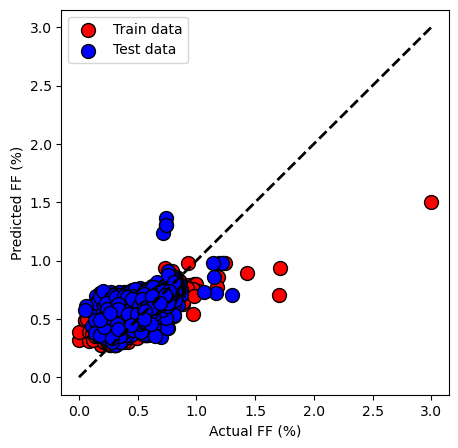

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] # Warning - 'max_features' 'auto' is deprecated. 
}

# Define the search object
search = RandomizedSearchCV(rf, param_grid, cv=5, n_iter=50, n_jobs=-1, random_state=42)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_rf = search.best_estimator_



model_builder(best_rf, y_train, y_test)

Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 1.0}
The mean squared error (MSE) on test set: 0.0084
The root mean squared error (RMSE) on test set: 0.0914
The mean absolute error (MAE) on test set: 0.0556
r2 on train set: 0.7599
r2 on test set: 0.4267


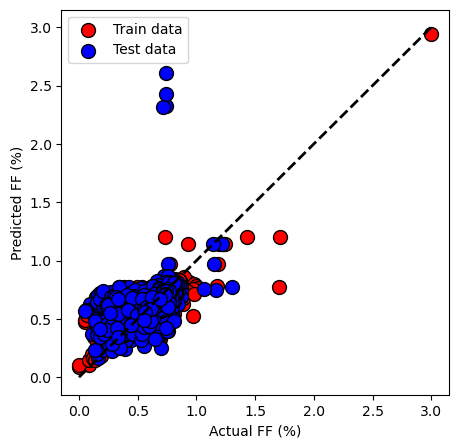

In [13]:
import xgboost as xgb

# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the model
xgb = xgb.XGBRegressor(random_state = 42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0]
}

# Define the search object
search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')


# Get the best model
best_xgb = search.best_estimator_



model_builder(best_xgb, y_train, y_test)

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda

Best parameters: {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.75}
The mean squared error (MSE) on test set: 0.0079
The root mean squared error (RMSE) on test set: 0.0890
The mean absolute error (MAE) on test set: 0.0557
r2 on train set: 0.6914
r2 on test set: 0.4566


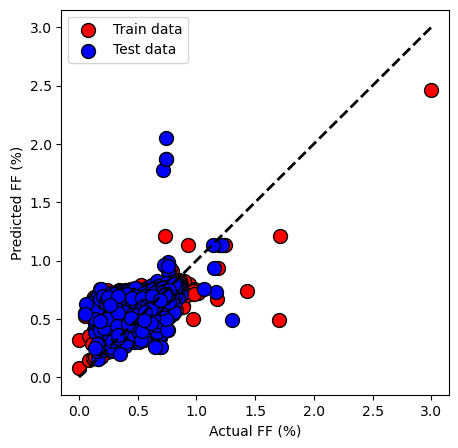

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gbr = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample': [0.5, 0.75, 1.0],
    'loss': ['ls', 'lad', 'huber'] 
    
    # warning 'loss' - 'ls' --> 'squared_error', 'lad' --> 'absolute_error',
    # 'loss': ['squared_error','absolute_error','huber']
}

# Define the search object
search = GridSearchCV(gbr, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_gbr = search.best_estimator_



model_builder(best_gbr, y_train, y_test)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
The mean squared error (MSE) on test set: 0.0089
The root mean squared error (RMSE) on test set: 0.0942
The mean absolute error (MAE) on test set: 0.0623
r2 on train set: 0.7022
r2 on test set: 0.3913


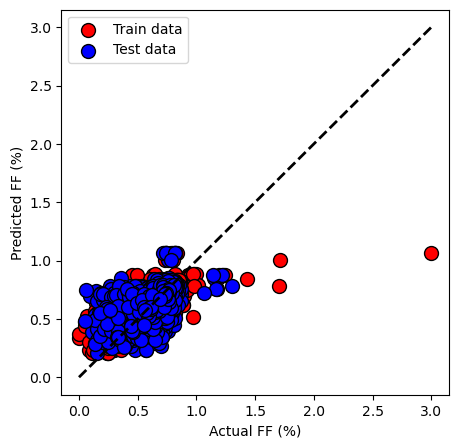

In [15]:
from sklearn.tree import DecisionTreeRegressor


# Define the model
dt = DecisionTreeRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the search object
search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_dt = search.best_estimator_



model_builder(best_dt, y_train, y_test)

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/min

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/min

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

Best parameters: {'C': 100, 'degree': 2, 'epsilon': 0.1, 'kernel': 'rbf'}
The mean squared error (MSE) on test set: 0.0100
The root mean squared error (RMSE) on test set: 0.0998
The mean absolute error (MAE) on test set: 0.0743
r2 on train set: 0.3612
r2 on test set: 0.3158


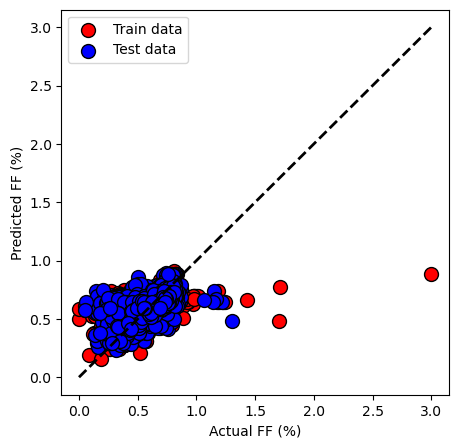

In [16]:
from sklearn.svm import SVR


# Define the model
svr = SVR()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.3],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5]
}

# Define the search object
search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_svr = search.best_estimator_




model_builder(best_svr, y_train, y_test)

Best parameters: {'bootstrap': False, 'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 40}
The mean squared error (MSE) on test set: 0.0088
The root mean squared error (RMSE) on test set: 0.0936
The mean absolute error (MAE) on test set: 0.0555
r2 on train set: 0.8140
r2 on test set: 0.3989


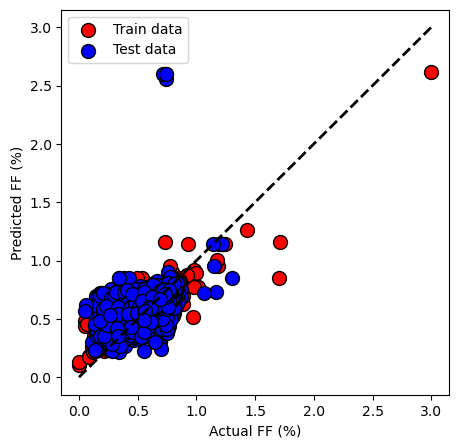

In [17]:
from sklearn.ensemble import BaggingRegressor


# Define the model
br = BaggingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False]
}

# Define the search object
search = GridSearchCV(br, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_br = search.best_estimator_




model_builder(best_br, y_train, y_test)

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 40}
The mean squared error (MSE) on test set: 0.0070
The root mean squared error (RMSE) on test set: 0.0835
The mean absolute error (MAE) on test set: 0.0547
r2 on train set: 0.7559
r2 on test set: 0.5218


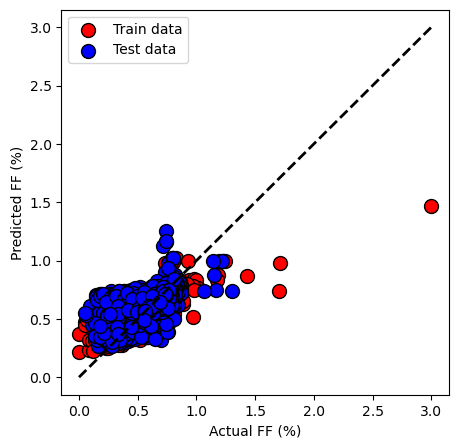

In [18]:
from sklearn.ensemble import ExtraTreesRegressor


# Define the model
et = ExtraTreesRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40],
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the search object
search = GridSearchCV(et, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_et = search.best_estimator_



model_builder(best_et, y_train, y_test)


Best parameters: {'alpha': 1, 'solver': 'lsqr'}
The mean squared error (MSE) on test set: 0.0107
The root mean squared error (RMSE) on test set: 0.1036
The mean absolute error (MAE) on test set: 0.0753
r2 on train set: 0.2554
r2 on test set: 0.2635


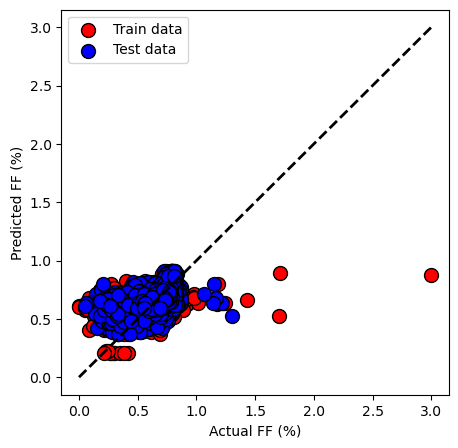

In [19]:
from sklearn.linear_model import Ridge


# Define the model
ridge = Ridge()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Define the search object
search = GridSearchCV(ridge, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_ridge = search.best_estimator_


model_builder(best_ridge, y_train, y_test)

Best parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
The mean squared error (MSE) on test set: 0.0082
The root mean squared error (RMSE) on test set: 0.0907
The mean absolute error (MAE) on test set: 0.0580
r2 on train set: 0.8404
r2 on test set: 0.4355


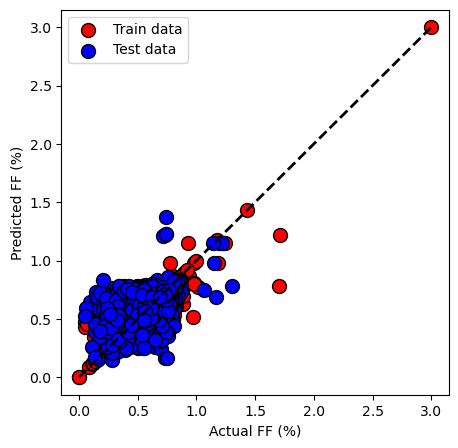

In [20]:
from sklearn.neighbors import KNeighborsRegressor


# Define the model
knr = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

# Define the search object
search = GridSearchCV(knr, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_knr = search.best_estimator_


model_builder(best_knr, y_train, y_test)

0:	learn: 0.1203116	total: 49.3ms	remaining: 4.88s
1:	learn: 0.1185947	total: 54ms	remaining: 2.64s
2:	learn: 0.1168762	total: 114ms	remaining: 3.7s
3:	learn: 0.1156094	total: 116ms	remaining: 2.79s
4:	learn: 0.1144584	total: 180ms	remaining: 3.42s
5:	learn: 0.1133379	total: 185ms	remaining: 2.9s
6:	learn: 0.1123919	total: 188ms	remaining: 2.5s
7:	learn: 0.1116268	total: 268ms	remaining: 3.08s
8:	learn: 0.1108827	total: 306ms	remaining: 3.09s
9:	learn: 0.1102033	total: 308ms	remaining: 2.77s
10:	learn: 0.1095587	total: 451ms	remaining: 3.65s
11:	learn: 0.1090291	total: 453ms	remaining: 3.32s
12:	learn: 0.1085053	total: 517ms	remaining: 3.46s
13:	learn: 0.1080503	total: 519ms	remaining: 3.19s
14:	learn: 0.1075946	total: 577ms	remaining: 3.27s
15:	learn: 0.1072136	total: 640ms	remaining: 3.36s
16:	learn: 0.1068449	total: 722ms	remaining: 3.52s
17:	learn: 0.1065064	total: 724ms	remaining: 3.3s
18:	learn: 0.1061993	total: 822ms	remaining: 3.5s
19:	learn: 0.1059207	total: 932ms	remaining: 3

0:	learn: 0.1169134	total: 53.1ms	remaining: 5.25s
1:	learn: 0.1129355	total: 55.7ms	remaining: 2.73s
2:	learn: 0.1107699	total: 57.8ms	remaining: 1.87s
3:	learn: 0.1088051	total: 91.4ms	remaining: 2.19s
4:	learn: 0.1074442	total: 93.2ms	remaining: 1.77s
5:	learn: 0.1061974	total: 94.8ms	remaining: 1.49s
6:	learn: 0.1052735	total: 194ms	remaining: 2.57s
7:	learn: 0.1045822	total: 231ms	remaining: 2.65s
8:	learn: 0.1039645	total: 237ms	remaining: 2.4s
9:	learn: 0.1035625	total: 265ms	remaining: 2.39s
10:	learn: 0.1031164	total: 296ms	remaining: 2.39s
11:	learn: 0.1027545	total: 299ms	remaining: 2.19s
12:	learn: 0.1024700	total: 304ms	remaining: 2.03s
13:	learn: 0.1022320	total: 306ms	remaining: 1.88s
14:	learn: 0.1019670	total: 321ms	remaining: 1.82s
15:	learn: 0.1017349	total: 413ms	remaining: 2.17s
16:	learn: 0.1015469	total: 414ms	remaining: 2.02s
17:	learn: 0.1014014	total: 415ms	remaining: 1.89s
18:	learn: 0.1011579	total: 419ms	remaining: 1.79s
19:	learn: 0.1010122	total: 586ms	re

0:	learn: 0.1172969	total: 55.1ms	remaining: 5.46s
1:	learn: 0.1133413	total: 65.7ms	remaining: 3.22s
2:	learn: 0.1110546	total: 67.4ms	remaining: 2.18s
3:	learn: 0.1090069	total: 95.2ms	remaining: 2.28s
4:	learn: 0.1078262	total: 99.7ms	remaining: 1.89s
5:	learn: 0.1067255	total: 170ms	remaining: 2.67s
6:	learn: 0.1058208	total: 173ms	remaining: 2.29s
7:	learn: 0.1050577	total: 204ms	remaining: 2.34s
8:	learn: 0.1045469	total: 207ms	remaining: 2.09s
9:	learn: 0.1039662	total: 227ms	remaining: 2.04s
10:	learn: 0.1035750	total: 238ms	remaining: 1.93s
11:	learn: 0.1032198	total: 353ms	remaining: 2.59s
12:	learn: 0.1029623	total: 453ms	remaining: 3.03s
13:	learn: 0.1026735	total: 471ms	remaining: 2.89s
14:	learn: 0.1024493	total: 497ms	remaining: 2.82s
15:	learn: 0.1021854	total: 501ms	remaining: 2.63s
16:	learn: 0.1019779	total: 643ms	remaining: 3.14s
17:	learn: 0.1017947	total: 646ms	remaining: 2.94s
18:	learn: 0.1015323	total: 650ms	remaining: 2.77s
19:	learn: 0.1013821	total: 772ms	re

0:	learn: 0.1171970	total: 48.1ms	remaining: 4.76s
1:	learn: 0.1130660	total: 49.8ms	remaining: 2.44s
2:	learn: 0.1108866	total: 51.7ms	remaining: 1.67s
3:	learn: 0.1088879	total: 124ms	remaining: 2.98s
4:	learn: 0.1075056	total: 162ms	remaining: 3.08s
5:	learn: 0.1065170	total: 164ms	remaining: 2.57s
6:	learn: 0.1056342	total: 174ms	remaining: 2.31s
7:	learn: 0.1049190	total: 181ms	remaining: 2.08s
8:	learn: 0.1043828	total: 266ms	remaining: 2.69s
9:	learn: 0.1038462	total: 269ms	remaining: 2.42s
10:	learn: 0.1034552	total: 292ms	remaining: 2.36s
11:	learn: 0.1030341	total: 298ms	remaining: 2.18s
12:	learn: 0.1028028	total: 334ms	remaining: 2.24s
13:	learn: 0.1025411	total: 530ms	remaining: 3.25s
14:	learn: 0.1023316	total: 546ms	remaining: 3.1s
15:	learn: 0.1021405	total: 878ms	remaining: 4.61s
16:	learn: 0.1019551	total: 880ms	remaining: 4.29s
17:	learn: 0.1017579	total: 935ms	remaining: 4.26s
18:	learn: 0.1015146	total: 957ms	remaining: 4.08s
19:	learn: 0.1013843	total: 1.04s	remai

0:	learn: 0.0857317	total: 115ms	remaining: 11.4s
1:	learn: 0.0843436	total: 122ms	remaining: 5.99s
2:	learn: 0.0832021	total: 171ms	remaining: 5.53s
3:	learn: 0.0818826	total: 175ms	remaining: 4.21s
4:	learn: 0.0810319	total: 339ms	remaining: 6.44s
5:	learn: 0.0800326	total: 351ms	remaining: 5.49s
6:	learn: 0.0793344	total: 433ms	remaining: 5.75s
7:	learn: 0.0787081	total: 456ms	remaining: 5.24s
8:	learn: 0.0779580	total: 495ms	remaining: 5.01s
9:	learn: 0.0773263	total: 508ms	remaining: 4.57s
10:	learn: 0.0766783	total: 697ms	remaining: 5.64s
11:	learn: 0.0761692	total: 780ms	remaining: 5.72s
12:	learn: 0.0758272	total: 785ms	remaining: 5.25s
13:	learn: 0.0752640	total: 990ms	remaining: 6.08s
14:	learn: 0.0749469	total: 994ms	remaining: 5.63s
15:	learn: 0.0746824	total: 1.13s	remaining: 5.93s
16:	learn: 0.0741980	total: 1.21s	remaining: 5.92s
17:	learn: 0.0738508	total: 1.36s	remaining: 6.18s
18:	learn: 0.0736110	total: 1.36s	remaining: 5.81s
19:	learn: 0.0733054	total: 1.52s	remaini

0:	learn: 0.1169530	total: 104ms	remaining: 10.3s
1:	learn: 0.1128211	total: 107ms	remaining: 5.24s
2:	learn: 0.1105717	total: 167ms	remaining: 5.41s
3:	learn: 0.1087967	total: 170ms	remaining: 4.07s
4:	learn: 0.1074915	total: 173ms	remaining: 3.29s
5:	learn: 0.1063879	total: 175ms	remaining: 2.74s
6:	learn: 0.1053156	total: 184ms	remaining: 2.44s
7:	learn: 0.1046210	total: 187ms	remaining: 2.15s
8:	learn: 0.1040101	total: 331ms	remaining: 3.35s
9:	learn: 0.1034239	total: 381ms	remaining: 3.43s
10:	learn: 0.1030121	total: 388ms	remaining: 3.14s
11:	learn: 0.1026748	total: 462ms	remaining: 3.39s
12:	learn: 0.1023833	total: 513ms	remaining: 3.43s
13:	learn: 0.1021308	total: 515ms	remaining: 3.16s
14:	learn: 0.1019179	total: 642ms	remaining: 3.64s
15:	learn: 0.1017239	total: 646ms	remaining: 3.39s
16:	learn: 0.1014757	total: 738ms	remaining: 3.6s
17:	learn: 0.1013263	total: 742ms	remaining: 3.38s
18:	learn: 0.1010723	total: 772ms	remaining: 3.29s
19:	learn: 0.1008914	total: 774ms	remainin

0:	learn: 0.0859014	total: 90.6ms	remaining: 8.97s
1:	learn: 0.0845783	total: 148ms	remaining: 7.27s
2:	learn: 0.0833760	total: 155ms	remaining: 5s
3:	learn: 0.0821420	total: 283ms	remaining: 6.78s
4:	learn: 0.0809936	total: 301ms	remaining: 5.73s
5:	learn: 0.0800728	total: 306ms	remaining: 4.79s
6:	learn: 0.0791742	total: 309ms	remaining: 4.11s
7:	learn: 0.0785098	total: 313ms	remaining: 3.6s
8:	learn: 0.0778658	total: 427ms	remaining: 4.31s
9:	learn: 0.0772790	total: 441ms	remaining: 3.97s
10:	learn: 0.0766680	total: 444ms	remaining: 3.59s
11:	learn: 0.0761607	total: 447ms	remaining: 3.28s
12:	learn: 0.0757497	total: 478ms	remaining: 3.2s
13:	learn: 0.0752327	total: 481ms	remaining: 2.96s
14:	learn: 0.0748761	total: 567ms	remaining: 3.21s
15:	learn: 0.0745342	total: 681ms	remaining: 3.57s
16:	learn: 0.0742130	total: 684ms	remaining: 3.34s
17:	learn: 0.0739184	total: 765ms	remaining: 3.48s
18:	learn: 0.0736737	total: 811ms	remaining: 3.46s
19:	learn: 0.0734168	total: 964ms	remaining: 

0:	learn: 0.0853022	total: 61ms	remaining: 6.04s
1:	learn: 0.0839181	total: 190ms	remaining: 9.3s
2:	learn: 0.0827913	total: 290ms	remaining: 9.38s
3:	learn: 0.0818296	total: 293ms	remaining: 7.02s
4:	learn: 0.0807606	total: 475ms	remaining: 9.02s
5:	learn: 0.0798202	total: 553ms	remaining: 8.67s
6:	learn: 0.0789275	total: 599ms	remaining: 7.95s
7:	learn: 0.0782028	total: 693ms	remaining: 7.97s
8:	learn: 0.0774206	total: 697ms	remaining: 7.05s
9:	learn: 0.0768975	total: 722ms	remaining: 6.49s
10:	learn: 0.0764224	total: 878ms	remaining: 7.1s
11:	learn: 0.0759134	total: 932ms	remaining: 6.83s
12:	learn: 0.0755293	total: 981ms	remaining: 6.57s
13:	learn: 0.0749857	total: 984ms	remaining: 6.04s
14:	learn: 0.0745809	total: 1.03s	remaining: 5.86s
15:	learn: 0.0742671	total: 1.07s	remaining: 5.61s
16:	learn: 0.0739800	total: 1.1s	remaining: 5.36s
17:	learn: 0.0736904	total: 1.1s	remaining: 5.01s
18:	learn: 0.0734956	total: 1.1s	remaining: 4.7s
19:	learn: 0.0731215	total: 1.1s	remaining: 4.42

0:	learn: 0.0857431	total: 234ms	remaining: 23.2s
1:	learn: 0.0844669	total: 237ms	remaining: 11.6s
2:	learn: 0.0833226	total: 251ms	remaining: 8.11s
3:	learn: 0.0821146	total: 255ms	remaining: 6.13s
4:	learn: 0.0813117	total: 291ms	remaining: 5.53s
5:	learn: 0.0803260	total: 349ms	remaining: 5.47s
6:	learn: 0.0795159	total: 382ms	remaining: 5.08s
7:	learn: 0.0787616	total: 407ms	remaining: 4.68s
8:	learn: 0.0780550	total: 429ms	remaining: 4.34s
9:	learn: 0.0775176	total: 512ms	remaining: 4.61s
10:	learn: 0.0770180	total: 585ms	remaining: 4.73s
11:	learn: 0.0764667	total: 619ms	remaining: 4.54s
12:	learn: 0.0759704	total: 853ms	remaining: 5.71s
13:	learn: 0.0755083	total: 938ms	remaining: 5.76s
14:	learn: 0.0751320	total: 942ms	remaining: 5.34s
15:	learn: 0.0748156	total: 1.01s	remaining: 5.3s
16:	learn: 0.0744542	total: 1.01s	remaining: 4.95s
17:	learn: 0.0742153	total: 1.09s	remaining: 4.97s
18:	learn: 0.0739951	total: 1.11s	remaining: 4.72s
19:	learn: 0.0738068	total: 1.15s	remainin

0:	learn: 0.0830302	total: 128ms	remaining: 12.7s
1:	learn: 0.0802350	total: 172ms	remaining: 8.41s
2:	learn: 0.0774502	total: 207ms	remaining: 6.71s
3:	learn: 0.0756753	total: 409ms	remaining: 9.81s
4:	learn: 0.0747416	total: 615ms	remaining: 11.7s
5:	learn: 0.0738781	total: 657ms	remaining: 10.3s
6:	learn: 0.0730261	total: 751ms	remaining: 9.98s
7:	learn: 0.0725511	total: 769ms	remaining: 8.84s
8:	learn: 0.0720350	total: 773ms	remaining: 7.81s
9:	learn: 0.0716538	total: 918ms	remaining: 8.26s
10:	learn: 0.0712288	total: 939ms	remaining: 7.59s
11:	learn: 0.0709487	total: 1.04s	remaining: 7.67s
12:	learn: 0.0707787	total: 1.05s	remaining: 7.02s
13:	learn: 0.0705608	total: 1.05s	remaining: 6.46s
14:	learn: 0.0704181	total: 1.15s	remaining: 6.52s
15:	learn: 0.0703231	total: 1.15s	remaining: 6.06s
16:	learn: 0.0701941	total: 1.22s	remaining: 5.94s
17:	learn: 0.0700971	total: 1.28s	remaining: 5.81s
18:	learn: 0.0699830	total: 1.43s	remaining: 6.11s
19:	learn: 0.0697568	total: 1.44s	remaini

62:	learn: 0.0659590	total: 1.85s	remaining: 1.09s
63:	learn: 0.0659199	total: 1.96s	remaining: 1.1s
64:	learn: 0.0658195	total: 1.96s	remaining: 1.06s
65:	learn: 0.0657810	total: 2.03s	remaining: 1.04s
66:	learn: 0.0656697	total: 2.09s	remaining: 1.03s
67:	learn: 0.0656303	total: 2.1s	remaining: 986ms
68:	learn: 0.0656145	total: 2.23s	remaining: 1s
69:	learn: 0.0655568	total: 2.23s	remaining: 958ms
70:	learn: 0.0655397	total: 2.44s	remaining: 998ms
71:	learn: 0.0655086	total: 2.45s	remaining: 953ms
72:	learn: 0.0654843	total: 2.57s	remaining: 950ms
73:	learn: 0.0654425	total: 2.57s	remaining: 904ms
74:	learn: 0.0653496	total: 2.64s	remaining: 881ms
75:	learn: 0.0653137	total: 2.65s	remaining: 836ms
76:	learn: 0.0653011	total: 2.76s	remaining: 826ms
77:	learn: 0.0652797	total: 2.83s	remaining: 798ms
78:	learn: 0.0652079	total: 2.83s	remaining: 753ms
79:	learn: 0.0651718	total: 2.88s	remaining: 720ms
80:	learn: 0.0651517	total: 2.88s	remaining: 676ms
81:	learn: 0.0651173	total: 2.89s	re

62:	learn: 0.0665101	total: 2.06s	remaining: 1.21s
63:	learn: 0.0664594	total: 2.11s	remaining: 1.19s
64:	learn: 0.0664338	total: 2.17s	remaining: 1.17s
65:	learn: 0.0663631	total: 2.18s	remaining: 1.12s
66:	learn: 0.0662717	total: 2.23s	remaining: 1.1s
67:	learn: 0.0661812	total: 2.24s	remaining: 1.05s
68:	learn: 0.0661232	total: 2.32s	remaining: 1.04s
69:	learn: 0.0660563	total: 2.33s	remaining: 997ms
70:	learn: 0.0658627	total: 2.34s	remaining: 957ms
71:	learn: 0.0658385	total: 2.35s	remaining: 912ms
72:	learn: 0.0658019	total: 2.41s	remaining: 890ms
73:	learn: 0.0657503	total: 2.41s	remaining: 846ms
74:	learn: 0.0656959	total: 2.63s	remaining: 878ms
75:	learn: 0.0656591	total: 2.75s	remaining: 869ms
76:	learn: 0.0656114	total: 2.76s	remaining: 823ms
77:	learn: 0.0655673	total: 2.88s	remaining: 811ms
78:	learn: 0.0655304	total: 2.93s	remaining: 780ms
79:	learn: 0.0654674	total: 2.94s	remaining: 734ms
80:	learn: 0.0654341	total: 2.94s	remaining: 690ms
81:	learn: 0.0653363	total: 2.94

62:	learn: 0.0668344	total: 2.56s	remaining: 1.51s
63:	learn: 0.0667752	total: 2.66s	remaining: 1.5s
64:	learn: 0.0667502	total: 2.7s	remaining: 1.45s
65:	learn: 0.0667107	total: 2.7s	remaining: 1.39s
66:	learn: 0.0666707	total: 2.71s	remaining: 1.33s
67:	learn: 0.0666359	total: 2.71s	remaining: 1.28s
68:	learn: 0.0665811	total: 2.72s	remaining: 1.22s
69:	learn: 0.0665574	total: 2.88s	remaining: 1.23s
70:	learn: 0.0665033	total: 2.88s	remaining: 1.18s
71:	learn: 0.0664719	total: 2.89s	remaining: 1.12s
72:	learn: 0.0664240	total: 2.93s	remaining: 1.08s
73:	learn: 0.0663914	total: 3.01s	remaining: 1.06s
74:	learn: 0.0663605	total: 3.01s	remaining: 1s
75:	learn: 0.0663541	total: 3.05s	remaining: 964ms
76:	learn: 0.0663272	total: 3.06s	remaining: 913ms
77:	learn: 0.0662217	total: 3.15s	remaining: 890ms
78:	learn: 0.0661782	total: 3.16s	remaining: 840ms
79:	learn: 0.0661482	total: 3.27s	remaining: 816ms
80:	learn: 0.0660983	total: 3.29s	remaining: 771ms
81:	learn: 0.0659902	total: 3.33s	rem

62:	learn: 0.0941958	total: 2.23s	remaining: 1.31s
63:	learn: 0.0940555	total: 2.23s	remaining: 1.25s
64:	learn: 0.0938969	total: 2.23s	remaining: 1.2s
65:	learn: 0.0937399	total: 2.29s	remaining: 1.18s
66:	learn: 0.0936410	total: 2.29s	remaining: 1.13s
67:	learn: 0.0935509	total: 2.29s	remaining: 1.08s
68:	learn: 0.0934409	total: 2.4s	remaining: 1.08s
69:	learn: 0.0933497	total: 2.51s	remaining: 1.07s
70:	learn: 0.0932899	total: 2.51s	remaining: 1.02s
71:	learn: 0.0931817	total: 2.63s	remaining: 1.02s
72:	learn: 0.0930575	total: 2.71s	remaining: 1s
73:	learn: 0.0929732	total: 2.71s	remaining: 953ms
74:	learn: 0.0928747	total: 2.71s	remaining: 905ms
75:	learn: 0.0928114	total: 2.85s	remaining: 901ms
76:	learn: 0.0927547	total: 2.86s	remaining: 854ms
77:	learn: 0.0926962	total: 2.89s	remaining: 815ms
78:	learn: 0.0926070	total: 2.89s	remaining: 769ms
79:	learn: 0.0925409	total: 3.03s	remaining: 758ms
80:	learn: 0.0924586	total: 3.04s	remaining: 712ms
81:	learn: 0.0923868	total: 3.04s	re

62:	learn: 0.0933070	total: 2.8s	remaining: 1.65s
63:	learn: 0.0931540	total: 2.82s	remaining: 1.59s
64:	learn: 0.0929991	total: 2.9s	remaining: 1.56s
65:	learn: 0.0929421	total: 2.9s	remaining: 1.49s
66:	learn: 0.0928241	total: 2.97s	remaining: 1.46s
67:	learn: 0.0927384	total: 3s	remaining: 1.41s
68:	learn: 0.0926651	total: 3.17s	remaining: 1.43s
69:	learn: 0.0925758	total: 3.18s	remaining: 1.36s
70:	learn: 0.0924469	total: 3.18s	remaining: 1.3s
71:	learn: 0.0923786	total: 3.26s	remaining: 1.27s
72:	learn: 0.0922812	total: 3.32s	remaining: 1.23s
73:	learn: 0.0922110	total: 3.44s	remaining: 1.21s
74:	learn: 0.0921715	total: 3.46s	remaining: 1.15s
75:	learn: 0.0920647	total: 3.46s	remaining: 1.09s
76:	learn: 0.0919557	total: 3.61s	remaining: 1.08s
77:	learn: 0.0918753	total: 3.64s	remaining: 1.03s
78:	learn: 0.0917812	total: 3.65s	remaining: 969ms
79:	learn: 0.0916449	total: 3.75s	remaining: 938ms
80:	learn: 0.0915717	total: 3.79s	remaining: 890ms
81:	learn: 0.0914007	total: 3.92s	rema

62:	learn: 0.0662434	total: 2.68s	remaining: 1.57s
63:	learn: 0.0662193	total: 2.73s	remaining: 1.54s
64:	learn: 0.0661812	total: 2.74s	remaining: 1.47s
65:	learn: 0.0661173	total: 2.74s	remaining: 1.41s
66:	learn: 0.0660655	total: 2.93s	remaining: 1.44s
67:	learn: 0.0660247	total: 2.97s	remaining: 1.4s
68:	learn: 0.0660044	total: 3.15s	remaining: 1.41s
69:	learn: 0.0659718	total: 3.15s	remaining: 1.35s
70:	learn: 0.0659032	total: 3.15s	remaining: 1.29s
71:	learn: 0.0658736	total: 3.18s	remaining: 1.24s
72:	learn: 0.0658447	total: 3.18s	remaining: 1.18s
73:	learn: 0.0657485	total: 3.31s	remaining: 1.16s
74:	learn: 0.0657226	total: 3.31s	remaining: 1.1s
75:	learn: 0.0656820	total: 3.34s	remaining: 1.05s
76:	learn: 0.0656330	total: 3.45s	remaining: 1.03s
77:	learn: 0.0655840	total: 3.46s	remaining: 975ms
78:	learn: 0.0654945	total: 3.48s	remaining: 924ms
79:	learn: 0.0654518	total: 3.75s	remaining: 936ms
80:	learn: 0.0654225	total: 3.75s	remaining: 879ms
81:	learn: 0.0653766	total: 3.9s	

62:	learn: 0.0647325	total: 2.72s	remaining: 1.6s
63:	learn: 0.0646690	total: 2.88s	remaining: 1.62s
64:	learn: 0.0646548	total: 2.89s	remaining: 1.55s
65:	learn: 0.0645090	total: 2.89s	remaining: 1.49s
66:	learn: 0.0644246	total: 2.91s	remaining: 1.43s
67:	learn: 0.0643937	total: 3.05s	remaining: 1.44s
68:	learn: 0.0643502	total: 3.05s	remaining: 1.37s
69:	learn: 0.0642821	total: 3.19s	remaining: 1.37s
70:	learn: 0.0642199	total: 3.2s	remaining: 1.3s
71:	learn: 0.0642048	total: 3.22s	remaining: 1.25s
72:	learn: 0.0641759	total: 3.22s	remaining: 1.19s
73:	learn: 0.0641301	total: 3.42s	remaining: 1.2s
74:	learn: 0.0640934	total: 3.51s	remaining: 1.17s
75:	learn: 0.0640768	total: 3.52s	remaining: 1.11s
76:	learn: 0.0639815	total: 3.52s	remaining: 1.05s
77:	learn: 0.0639501	total: 3.56s	remaining: 1s
78:	learn: 0.0639074	total: 3.58s	remaining: 952ms
79:	learn: 0.0638331	total: 3.61s	remaining: 902ms
80:	learn: 0.0638061	total: 3.61s	remaining: 847ms
81:	learn: 0.0637662	total: 3.66s	rema

62:	learn: 0.0645550	total: 3.51s	remaining: 2.06s
63:	learn: 0.0645049	total: 3.52s	remaining: 1.98s
64:	learn: 0.0644820	total: 3.56s	remaining: 1.92s
65:	learn: 0.0644512	total: 3.69s	remaining: 1.9s
66:	learn: 0.0643981	total: 3.76s	remaining: 1.85s
67:	learn: 0.0643610	total: 3.79s	remaining: 1.78s
68:	learn: 0.0642992	total: 3.79s	remaining: 1.7s
69:	learn: 0.0642756	total: 3.85s	remaining: 1.65s
70:	learn: 0.0642662	total: 3.87s	remaining: 1.58s
71:	learn: 0.0642300	total: 3.88s	remaining: 1.51s
72:	learn: 0.0641404	total: 3.99s	remaining: 1.48s
73:	learn: 0.0640829	total: 4.25s	remaining: 1.49s
74:	learn: 0.0640541	total: 4.32s	remaining: 1.44s
75:	learn: 0.0640114	total: 4.32s	remaining: 1.36s
76:	learn: 0.0639578	total: 4.34s	remaining: 1.3s
77:	learn: 0.0638890	total: 4.51s	remaining: 1.27s
78:	learn: 0.0638738	total: 4.53s	remaining: 1.2s
79:	learn: 0.0637784	total: 4.56s	remaining: 1.14s
80:	learn: 0.0636945	total: 4.56s	remaining: 1.07s
81:	learn: 0.0636465	total: 4.57s	r

62:	learn: 0.0933573	total: 2.7s	remaining: 1.59s
63:	learn: 0.0933146	total: 2.7s	remaining: 1.52s
64:	learn: 0.0932066	total: 2.79s	remaining: 1.5s
65:	learn: 0.0931215	total: 2.84s	remaining: 1.46s
66:	learn: 0.0930282	total: 2.84s	remaining: 1.4s
67:	learn: 0.0929463	total: 2.95s	remaining: 1.39s
68:	learn: 0.0928348	total: 2.95s	remaining: 1.33s
69:	learn: 0.0927319	total: 3.01s	remaining: 1.29s
70:	learn: 0.0926445	total: 3.01s	remaining: 1.23s
71:	learn: 0.0924924	total: 3.09s	remaining: 1.2s
72:	learn: 0.0924141	total: 3.09s	remaining: 1.14s
73:	learn: 0.0923547	total: 3.16s	remaining: 1.11s
74:	learn: 0.0922120	total: 3.16s	remaining: 1.05s
75:	learn: 0.0920784	total: 3.16s	remaining: 999ms
76:	learn: 0.0920258	total: 3.24s	remaining: 969ms
77:	learn: 0.0919391	total: 3.24s	remaining: 915ms
78:	learn: 0.0918653	total: 3.3s	remaining: 876ms
79:	learn: 0.0918409	total: 3.31s	remaining: 828ms
80:	learn: 0.0917838	total: 3.32s	remaining: 779ms
81:	learn: 0.0916591	total: 3.35s	rem

62:	learn: 0.0644558	total: 3.45s	remaining: 2.03s
63:	learn: 0.0644088	total: 3.63s	remaining: 2.04s
64:	learn: 0.0643500	total: 3.63s	remaining: 1.96s
65:	learn: 0.0642820	total: 3.69s	remaining: 1.9s
66:	learn: 0.0642360	total: 3.7s	remaining: 1.82s
67:	learn: 0.0641926	total: 3.75s	remaining: 1.77s
68:	learn: 0.0641249	total: 3.78s	remaining: 1.7s
69:	learn: 0.0640422	total: 3.82s	remaining: 1.64s
70:	learn: 0.0639584	total: 3.83s	remaining: 1.56s
71:	learn: 0.0639436	total: 3.92s	remaining: 1.52s
72:	learn: 0.0639299	total: 3.92s	remaining: 1.45s
73:	learn: 0.0638608	total: 4.04s	remaining: 1.42s
74:	learn: 0.0638023	total: 4.04s	remaining: 1.35s
75:	learn: 0.0637035	total: 4.12s	remaining: 1.3s
76:	learn: 0.0636549	total: 4.13s	remaining: 1.23s
77:	learn: 0.0636045	total: 4.2s	remaining: 1.18s
78:	learn: 0.0635392	total: 4.21s	remaining: 1.12s
79:	learn: 0.0635053	total: 4.23s	remaining: 1.06s
80:	learn: 0.0634590	total: 4.25s	remaining: 997ms
81:	learn: 0.0634010	total: 4.28s	re

62:	learn: 0.0645983	total: 4.19s	remaining: 2.46s
63:	learn: 0.0645444	total: 4.23s	remaining: 2.38s
64:	learn: 0.0645109	total: 4.24s	remaining: 2.28s
65:	learn: 0.0644308	total: 4.33s	remaining: 2.23s
66:	learn: 0.0643417	total: 4.34s	remaining: 2.14s
67:	learn: 0.0642997	total: 4.39s	remaining: 2.07s
68:	learn: 0.0642761	total: 4.43s	remaining: 1.99s
69:	learn: 0.0642323	total: 4.44s	remaining: 1.9s
70:	learn: 0.0641724	total: 4.51s	remaining: 1.84s
71:	learn: 0.0641645	total: 4.62s	remaining: 1.8s
72:	learn: 0.0641329	total: 4.63s	remaining: 1.71s
73:	learn: 0.0640979	total: 4.67s	remaining: 1.64s
74:	learn: 0.0640160	total: 4.75s	remaining: 1.58s
75:	learn: 0.0639192	total: 4.79s	remaining: 1.51s
76:	learn: 0.0638909	total: 4.87s	remaining: 1.45s
77:	learn: 0.0638646	total: 4.87s	remaining: 1.37s
78:	learn: 0.0637749	total: 4.99s	remaining: 1.32s
79:	learn: 0.0636900	total: 5.19s	remaining: 1.3s
80:	learn: 0.0636543	total: 5.2s	remaining: 1.22s
81:	learn: 0.0635879	total: 5.4s	re

123:	learn: 0.0984061	total: 5.03s	remaining: 3.08s
124:	learn: 0.0983671	total: 5.07s	remaining: 3.04s
125:	learn: 0.0983269	total: 5.08s	remaining: 2.98s
126:	learn: 0.0982804	total: 5.11s	remaining: 2.94s
127:	learn: 0.0982503	total: 5.21s	remaining: 2.93s
128:	learn: 0.0982126	total: 5.24s	remaining: 2.88s
129:	learn: 0.0981895	total: 5.24s	remaining: 2.82s
130:	learn: 0.0981682	total: 5.24s	remaining: 2.76s
131:	learn: 0.0981041	total: 5.25s	remaining: 2.7s
132:	learn: 0.0980805	total: 5.25s	remaining: 2.64s
133:	learn: 0.0980446	total: 5.42s	remaining: 2.67s
134:	learn: 0.0980070	total: 5.45s	remaining: 2.62s
135:	learn: 0.0979845	total: 5.48s	remaining: 2.58s
136:	learn: 0.0979489	total: 5.48s	remaining: 2.52s
137:	learn: 0.0979248	total: 5.49s	remaining: 2.46s
138:	learn: 0.0978926	total: 5.55s	remaining: 2.44s
139:	learn: 0.0978604	total: 5.55s	remaining: 2.38s
140:	learn: 0.0978361	total: 5.65s	remaining: 2.36s
141:	learn: 0.0978106	total: 5.67s	remaining: 2.31s
142:	learn: 0

22:	learn: 0.0693831	total: 726ms	remaining: 5.59s
23:	learn: 0.0693165	total: 781ms	remaining: 5.73s
24:	learn: 0.0691957	total: 786ms	remaining: 5.5s
25:	learn: 0.0690748	total: 860ms	remaining: 5.76s
26:	learn: 0.0690331	total: 863ms	remaining: 5.53s
27:	learn: 0.0689039	total: 927ms	remaining: 5.69s
28:	learn: 0.0688713	total: 929ms	remaining: 5.48s
29:	learn: 0.0687716	total: 1.02s	remaining: 5.78s
30:	learn: 0.0687330	total: 1.02s	remaining: 5.57s
31:	learn: 0.0686683	total: 1.05s	remaining: 5.52s
32:	learn: 0.0685333	total: 1.05s	remaining: 5.34s
33:	learn: 0.0684665	total: 1.06s	remaining: 5.17s
34:	learn: 0.0684196	total: 1.12s	remaining: 5.29s
35:	learn: 0.0683454	total: 1.16s	remaining: 5.27s
36:	learn: 0.0681819	total: 1.16s	remaining: 5.11s
37:	learn: 0.0681198	total: 1.21s	remaining: 5.15s
38:	learn: 0.0680735	total: 1.21s	remaining: 5s
39:	learn: 0.0679704	total: 1.26s	remaining: 5.05s
40:	learn: 0.0679030	total: 1.27s	remaining: 4.91s
41:	learn: 0.0678396	total: 1.27s	r

124:	learn: 0.0923024	total: 5.38s	remaining: 3.23s
125:	learn: 0.0922617	total: 5.38s	remaining: 3.16s
126:	learn: 0.0922017	total: 5.39s	remaining: 3.1s
127:	learn: 0.0921390	total: 5.4s	remaining: 3.04s
128:	learn: 0.0920673	total: 5.54s	remaining: 3.05s
129:	learn: 0.0920123	total: 5.54s	remaining: 2.98s
130:	learn: 0.0919596	total: 5.55s	remaining: 2.92s
131:	learn: 0.0919285	total: 5.67s	remaining: 2.92s
132:	learn: 0.0919031	total: 5.74s	remaining: 2.89s
133:	learn: 0.0918486	total: 5.79s	remaining: 2.85s
134:	learn: 0.0918229	total: 5.79s	remaining: 2.79s
135:	learn: 0.0917830	total: 5.86s	remaining: 2.76s
136:	learn: 0.0917442	total: 5.92s	remaining: 2.72s
137:	learn: 0.0916684	total: 5.92s	remaining: 2.66s
138:	learn: 0.0916374	total: 6s	remaining: 2.63s
139:	learn: 0.0916096	total: 6.06s	remaining: 2.6s
140:	learn: 0.0915757	total: 6.16s	remaining: 2.58s
141:	learn: 0.0915489	total: 6.17s	remaining: 2.52s
142:	learn: 0.0915298	total: 6.34s	remaining: 2.53s
143:	learn: 0.0915

22:	learn: 0.0690697	total: 965ms	remaining: 7.42s
23:	learn: 0.0690218	total: 1.08s	remaining: 7.9s
24:	learn: 0.0689412	total: 1.08s	remaining: 7.57s
25:	learn: 0.0688235	total: 1.18s	remaining: 7.87s
26:	learn: 0.0686935	total: 1.19s	remaining: 7.63s
27:	learn: 0.0686127	total: 1.21s	remaining: 7.45s
28:	learn: 0.0684400	total: 1.22s	remaining: 7.2s
29:	learn: 0.0683713	total: 1.3s	remaining: 7.35s
30:	learn: 0.0683388	total: 1.3s	remaining: 7.09s
31:	learn: 0.0682869	total: 1.3s	remaining: 6.84s
32:	learn: 0.0681395	total: 1.31s	remaining: 6.62s
33:	learn: 0.0680660	total: 1.31s	remaining: 6.4s
34:	learn: 0.0679925	total: 1.71s	remaining: 8.06s
35:	learn: 0.0678708	total: 1.74s	remaining: 7.92s
36:	learn: 0.0678002	total: 1.83s	remaining: 8.07s
37:	learn: 0.0677124	total: 1.86s	remaining: 7.93s
38:	learn: 0.0676122	total: 1.91s	remaining: 7.88s
39:	learn: 0.0675655	total: 1.91s	remaining: 7.65s
40:	learn: 0.0674915	total: 2.05s	remaining: 7.95s
41:	learn: 0.0674245	total: 2.05s	rem

124:	learn: 0.0928211	total: 6.39s	remaining: 3.83s
125:	learn: 0.0927944	total: 6.59s	remaining: 3.87s
126:	learn: 0.0927491	total: 6.59s	remaining: 3.79s
127:	learn: 0.0926894	total: 6.6s	remaining: 3.71s
128:	learn: 0.0926390	total: 6.68s	remaining: 3.68s
129:	learn: 0.0925762	total: 6.68s	remaining: 3.6s
130:	learn: 0.0924991	total: 6.93s	remaining: 3.65s
131:	learn: 0.0924624	total: 7.06s	remaining: 3.64s
132:	learn: 0.0924318	total: 7.12s	remaining: 3.58s
133:	learn: 0.0923803	total: 7.15s	remaining: 3.52s
134:	learn: 0.0923627	total: 7.16s	remaining: 3.45s
135:	learn: 0.0922788	total: 7.33s	remaining: 3.45s
136:	learn: 0.0921836	total: 7.39s	remaining: 3.4s
137:	learn: 0.0921265	total: 7.4s	remaining: 3.32s
138:	learn: 0.0920853	total: 7.46s	remaining: 3.27s
139:	learn: 0.0920537	total: 7.46s	remaining: 3.2s
140:	learn: 0.0920239	total: 7.56s	remaining: 3.16s
141:	learn: 0.0919236	total: 7.56s	remaining: 3.09s
142:	learn: 0.0918400	total: 7.57s	remaining: 3.02s
143:	learn: 0.091

124:	learn: 0.0672911	total: 6.29s	remaining: 3.77s
125:	learn: 0.0672672	total: 6.3s	remaining: 3.7s
126:	learn: 0.0672362	total: 6.36s	remaining: 3.65s
127:	learn: 0.0671909	total: 6.53s	remaining: 3.67s
128:	learn: 0.0671659	total: 6.53s	remaining: 3.59s
129:	learn: 0.0671430	total: 6.65s	remaining: 3.58s
130:	learn: 0.0671213	total: 6.67s	remaining: 3.51s
131:	learn: 0.0670936	total: 6.9s	remaining: 3.55s
132:	learn: 0.0670585	total: 6.9s	remaining: 3.48s
133:	learn: 0.0670391	total: 7.03s	remaining: 3.46s
134:	learn: 0.0670219	total: 7.03s	remaining: 3.38s
135:	learn: 0.0669949	total: 7.03s	remaining: 3.31s
136:	learn: 0.0669789	total: 7.09s	remaining: 3.26s
137:	learn: 0.0669423	total: 7.2s	remaining: 3.23s
138:	learn: 0.0669312	total: 7.2s	remaining: 3.16s
139:	learn: 0.0668926	total: 7.2s	remaining: 3.09s
140:	learn: 0.0668759	total: 7.56s	remaining: 3.16s
141:	learn: 0.0668584	total: 7.56s	remaining: 3.09s
142:	learn: 0.0668378	total: 7.56s	remaining: 3.01s
143:	learn: 0.06682

123:	learn: 0.0924320	total: 4.94s	remaining: 3.03s
124:	learn: 0.0923532	total: 4.96s	remaining: 2.98s
125:	learn: 0.0923018	total: 4.99s	remaining: 2.93s
126:	learn: 0.0922697	total: 5.02s	remaining: 2.89s
127:	learn: 0.0921856	total: 5.03s	remaining: 2.83s
128:	learn: 0.0921727	total: 5.03s	remaining: 2.77s
129:	learn: 0.0921601	total: 5.19s	remaining: 2.79s
130:	learn: 0.0921114	total: 5.19s	remaining: 2.73s
131:	learn: 0.0920535	total: 5.25s	remaining: 2.71s
132:	learn: 0.0920149	total: 5.26s	remaining: 2.65s
133:	learn: 0.0919813	total: 5.27s	remaining: 2.59s
134:	learn: 0.0919365	total: 5.27s	remaining: 2.54s
135:	learn: 0.0918892	total: 5.61s	remaining: 2.64s
136:	learn: 0.0918183	total: 5.61s	remaining: 2.58s
137:	learn: 0.0917802	total: 5.67s	remaining: 2.55s
138:	learn: 0.0917225	total: 5.67s	remaining: 2.49s
139:	learn: 0.0916087	total: 5.68s	remaining: 2.43s
140:	learn: 0.0915382	total: 5.68s	remaining: 2.38s
141:	learn: 0.0914108	total: 5.82s	remaining: 2.38s
142:	learn: 

124:	learn: 0.0676161	total: 7.19s	remaining: 4.31s
125:	learn: 0.0675803	total: 7.19s	remaining: 4.22s
126:	learn: 0.0675521	total: 7.32s	remaining: 4.21s
127:	learn: 0.0675268	total: 7.32s	remaining: 4.12s
128:	learn: 0.0675007	total: 7.42s	remaining: 4.08s
129:	learn: 0.0674571	total: 7.58s	remaining: 4.08s
130:	learn: 0.0674341	total: 7.64s	remaining: 4.02s
131:	learn: 0.0674145	total: 7.77s	remaining: 4s
132:	learn: 0.0673957	total: 7.78s	remaining: 3.92s
133:	learn: 0.0673718	total: 7.82s	remaining: 3.85s
134:	learn: 0.0673481	total: 7.83s	remaining: 3.77s
135:	learn: 0.0673346	total: 7.88s	remaining: 3.71s
136:	learn: 0.0673138	total: 7.93s	remaining: 3.65s
137:	learn: 0.0673001	total: 7.93s	remaining: 3.56s
138:	learn: 0.0672760	total: 8.03s	remaining: 3.52s
139:	learn: 0.0672386	total: 8.03s	remaining: 3.44s
140:	learn: 0.0672037	total: 8.03s	remaining: 3.36s
141:	learn: 0.0671741	total: 8.05s	remaining: 3.29s
142:	learn: 0.0671581	total: 8.17s	remaining: 3.26s
143:	learn: 0.0

123:	learn: 0.0927847	total: 5.76s	remaining: 3.53s
124:	learn: 0.0927433	total: 5.81s	remaining: 3.49s
125:	learn: 0.0927113	total: 5.81s	remaining: 3.41s
126:	learn: 0.0926397	total: 5.82s	remaining: 3.34s
127:	learn: 0.0925870	total: 6s	remaining: 3.37s
128:	learn: 0.0925430	total: 6.01s	remaining: 3.31s
129:	learn: 0.0924728	total: 6.02s	remaining: 3.24s
130:	learn: 0.0924063	total: 6.03s	remaining: 3.17s
131:	learn: 0.0923680	total: 6.03s	remaining: 3.11s
132:	learn: 0.0923122	total: 6.03s	remaining: 3.04s
133:	learn: 0.0922566	total: 6.18s	remaining: 3.05s
134:	learn: 0.0921842	total: 6.19s	remaining: 2.98s
135:	learn: 0.0921537	total: 6.22s	remaining: 2.93s
136:	learn: 0.0921030	total: 6.23s	remaining: 2.87s
137:	learn: 0.0920554	total: 6.24s	remaining: 2.8s
138:	learn: 0.0920346	total: 6.3s	remaining: 2.76s
139:	learn: 0.0919999	total: 6.38s	remaining: 2.73s
140:	learn: 0.0919891	total: 6.38s	remaining: 2.67s
141:	learn: 0.0919548	total: 6.39s	remaining: 2.61s
142:	learn: 0.091

83:	learn: 0.0922841	total: 3.56s	remaining: 4.91s
84:	learn: 0.0921622	total: 3.58s	remaining: 4.84s
85:	learn: 0.0921031	total: 3.6s	remaining: 4.77s
86:	learn: 0.0920681	total: 3.67s	remaining: 4.77s
87:	learn: 0.0920135	total: 3.72s	remaining: 4.74s
88:	learn: 0.0919061	total: 3.74s	remaining: 4.66s
89:	learn: 0.0918817	total: 3.74s	remaining: 4.57s
90:	learn: 0.0918002	total: 3.77s	remaining: 4.51s
91:	learn: 0.0917141	total: 3.77s	remaining: 4.42s
92:	learn: 0.0916688	total: 3.77s	remaining: 4.34s
93:	learn: 0.0916038	total: 3.9s	remaining: 4.39s
94:	learn: 0.0914727	total: 3.99s	remaining: 4.41s
95:	learn: 0.0914301	total: 3.99s	remaining: 4.32s
96:	learn: 0.0913786	total: 3.99s	remaining: 4.24s
97:	learn: 0.0912936	total: 4.1s	remaining: 4.27s
98:	learn: 0.0912118	total: 4.11s	remaining: 4.19s
99:	learn: 0.0911283	total: 4.14s	remaining: 4.14s
100:	learn: 0.0910778	total: 4.15s	remaining: 4.07s
101:	learn: 0.0910306	total: 4.17s	remaining: 4s
102:	learn: 0.0909614	total: 4.17s	

83:	learn: 0.0659131	total: 4.28s	remaining: 5.91s
84:	learn: 0.0658289	total: 4.34s	remaining: 5.87s
85:	learn: 0.0657446	total: 4.34s	remaining: 5.76s
86:	learn: 0.0656764	total: 4.41s	remaining: 5.73s
87:	learn: 0.0656227	total: 4.45s	remaining: 5.66s
88:	learn: 0.0656096	total: 4.47s	remaining: 5.57s
89:	learn: 0.0655499	total: 4.47s	remaining: 5.46s
90:	learn: 0.0655086	total: 4.55s	remaining: 5.45s
91:	learn: 0.0654681	total: 4.55s	remaining: 5.34s
92:	learn: 0.0654341	total: 4.61s	remaining: 5.3s
93:	learn: 0.0654105	total: 4.61s	remaining: 5.2s
94:	learn: 0.0653766	total: 4.61s	remaining: 5.1s
95:	learn: 0.0653668	total: 4.66s	remaining: 5.04s
96:	learn: 0.0653423	total: 4.69s	remaining: 4.98s
97:	learn: 0.0652877	total: 4.71s	remaining: 4.9s
98:	learn: 0.0652208	total: 4.71s	remaining: 4.81s
99:	learn: 0.0651230	total: 4.79s	remaining: 4.79s
100:	learn: 0.0650924	total: 4.82s	remaining: 4.72s
101:	learn: 0.0650394	total: 4.84s	remaining: 4.65s
102:	learn: 0.0649753	total: 4.84

84:	learn: 0.0652232	total: 3.15s	remaining: 4.26s
85:	learn: 0.0652087	total: 3.19s	remaining: 4.22s
86:	learn: 0.0651573	total: 3.24s	remaining: 4.21s
87:	learn: 0.0651152	total: 3.28s	remaining: 4.17s
88:	learn: 0.0650678	total: 3.28s	remaining: 4.09s
89:	learn: 0.0650448	total: 3.44s	remaining: 4.21s
90:	learn: 0.0650201	total: 3.45s	remaining: 4.13s
91:	learn: 0.0649020	total: 3.5s	remaining: 4.11s
92:	learn: 0.0648358	total: 3.5s	remaining: 4.03s
93:	learn: 0.0648030	total: 3.61s	remaining: 4.07s
94:	learn: 0.0647396	total: 3.63s	remaining: 4.01s
95:	learn: 0.0647054	total: 3.71s	remaining: 4.02s
96:	learn: 0.0646666	total: 3.71s	remaining: 3.94s
97:	learn: 0.0646536	total: 3.79s	remaining: 3.94s
98:	learn: 0.0646225	total: 3.84s	remaining: 3.92s
99:	learn: 0.0645902	total: 3.96s	remaining: 3.96s
100:	learn: 0.0645421	total: 4.12s	remaining: 4.04s
101:	learn: 0.0644744	total: 4.12s	remaining: 3.96s
102:	learn: 0.0644191	total: 4.19s	remaining: 3.95s
103:	learn: 0.0643457	total: 4

84:	learn: 0.0915175	total: 3.58s	remaining: 4.85s
85:	learn: 0.0914456	total: 3.67s	remaining: 4.86s
86:	learn: 0.0913500	total: 3.73s	remaining: 4.85s
87:	learn: 0.0912889	total: 3.73s	remaining: 4.75s
88:	learn: 0.0912014	total: 3.76s	remaining: 4.68s
89:	learn: 0.0910841	total: 3.84s	remaining: 4.69s
90:	learn: 0.0910004	total: 3.89s	remaining: 4.66s
91:	learn: 0.0909150	total: 3.9s	remaining: 4.57s
92:	learn: 0.0908630	total: 3.91s	remaining: 4.5s
93:	learn: 0.0907555	total: 4.1s	remaining: 4.62s
94:	learn: 0.0906807	total: 4.1s	remaining: 4.53s
95:	learn: 0.0906087	total: 4.1s	remaining: 4.45s
96:	learn: 0.0905467	total: 4.11s	remaining: 4.36s
97:	learn: 0.0904990	total: 4.18s	remaining: 4.35s
98:	learn: 0.0904666	total: 4.18s	remaining: 4.27s
99:	learn: 0.0903800	total: 4.18s	remaining: 4.18s
100:	learn: 0.0903119	total: 4.25s	remaining: 4.16s
101:	learn: 0.0902628	total: 4.25s	remaining: 4.08s
102:	learn: 0.0902075	total: 4.34s	remaining: 4.09s
103:	learn: 0.0901511	total: 4.38

182:	learn: 0.0625064	total: 7.34s	remaining: 682ms
183:	learn: 0.0624590	total: 7.35s	remaining: 639ms
184:	learn: 0.0624398	total: 7.42s	remaining: 602ms
185:	learn: 0.0624261	total: 7.43s	remaining: 559ms
186:	learn: 0.0623908	total: 7.55s	remaining: 525ms
187:	learn: 0.0623735	total: 7.63s	remaining: 487ms
188:	learn: 0.0623271	total: 7.63s	remaining: 444ms
189:	learn: 0.0622707	total: 7.64s	remaining: 402ms
190:	learn: 0.0622305	total: 7.73s	remaining: 364ms
191:	learn: 0.0622020	total: 7.77s	remaining: 324ms
192:	learn: 0.0621871	total: 7.81s	remaining: 283ms
193:	learn: 0.0621698	total: 7.9s	remaining: 244ms
194:	learn: 0.0621331	total: 8.04s	remaining: 206ms
195:	learn: 0.0621143	total: 8.1s	remaining: 165ms
196:	learn: 0.0620901	total: 8.11s	remaining: 123ms
197:	learn: 0.0620815	total: 8.17s	remaining: 82.5ms
198:	learn: 0.0620612	total: 8.17s	remaining: 41.1ms
199:	learn: 0.0620440	total: 8.17s	remaining: 0us
0:	learn: 0.1204442	total: 148ms	remaining: 44.2s
1:	learn: 0.1186

85:	learn: 0.0910663	total: 4.33s	remaining: 5.74s
86:	learn: 0.0910153	total: 4.36s	remaining: 5.67s
87:	learn: 0.0909715	total: 4.36s	remaining: 5.55s
88:	learn: 0.0908924	total: 4.37s	remaining: 5.45s
89:	learn: 0.0908186	total: 4.42s	remaining: 5.41s
90:	learn: 0.0907886	total: 4.43s	remaining: 5.31s
91:	learn: 0.0907273	total: 4.44s	remaining: 5.21s
92:	learn: 0.0906245	total: 4.52s	remaining: 5.2s
93:	learn: 0.0905396	total: 4.53s	remaining: 5.1s
94:	learn: 0.0904270	total: 4.53s	remaining: 5s
95:	learn: 0.0903394	total: 4.53s	remaining: 4.91s
96:	learn: 0.0902551	total: 4.65s	remaining: 4.93s
97:	learn: 0.0901911	total: 4.66s	remaining: 4.85s
98:	learn: 0.0900445	total: 4.7s	remaining: 4.8s
99:	learn: 0.0900198	total: 4.8s	remaining: 4.8s
100:	learn: 0.0899378	total: 4.82s	remaining: 4.72s
101:	learn: 0.0898445	total: 4.82s	remaining: 4.63s
102:	learn: 0.0897605	total: 4.91s	remaining: 4.63s
103:	learn: 0.0896882	total: 4.97s	remaining: 4.58s
104:	learn: 0.0896381	total: 4.97s	r

84:	learn: 0.0914427	total: 2.67s	remaining: 3.62s
85:	learn: 0.0913559	total: 2.71s	remaining: 3.59s
86:	learn: 0.0912596	total: 2.71s	remaining: 3.53s
87:	learn: 0.0911801	total: 2.72s	remaining: 3.46s
88:	learn: 0.0910973	total: 2.82s	remaining: 3.52s
89:	learn: 0.0909975	total: 2.83s	remaining: 3.46s
90:	learn: 0.0907791	total: 3s	remaining: 3.59s
91:	learn: 0.0907531	total: 3s	remaining: 3.52s
92:	learn: 0.0906539	total: 3s	remaining: 3.45s
93:	learn: 0.0906369	total: 3.12s	remaining: 3.52s
94:	learn: 0.0906162	total: 3.17s	remaining: 3.51s
95:	learn: 0.0904484	total: 3.17s	remaining: 3.44s
96:	learn: 0.0903301	total: 3.3s	remaining: 3.51s
97:	learn: 0.0902737	total: 3.31s	remaining: 3.44s
98:	learn: 0.0902302	total: 3.6s	remaining: 3.67s
99:	learn: 0.0901495	total: 3.6s	remaining: 3.6s
100:	learn: 0.0900872	total: 3.68s	remaining: 3.61s
101:	learn: 0.0900049	total: 3.69s	remaining: 3.54s
102:	learn: 0.0899362	total: 3.75s	remaining: 3.53s
103:	learn: 0.0898854	total: 3.75s	remain

182:	learn: 0.0619678	total: 8.72s	remaining: 810ms
183:	learn: 0.0619556	total: 8.77s	remaining: 763ms
184:	learn: 0.0619378	total: 8.77s	remaining: 711ms
185:	learn: 0.0619273	total: 8.78s	remaining: 661ms
186:	learn: 0.0619131	total: 9s	remaining: 626ms
187:	learn: 0.0618775	total: 9s	remaining: 575ms
188:	learn: 0.0618662	total: 9.12s	remaining: 531ms
189:	learn: 0.0618529	total: 9.16s	remaining: 482ms
190:	learn: 0.0618232	total: 9.32s	remaining: 439ms
191:	learn: 0.0618116	total: 9.43s	remaining: 393ms
192:	learn: 0.0618025	total: 9.52s	remaining: 345ms
193:	learn: 0.0617753	total: 9.53s	remaining: 295ms
194:	learn: 0.0617606	total: 9.61s	remaining: 246ms
195:	learn: 0.0617423	total: 9.67s	remaining: 197ms
196:	learn: 0.0617235	total: 9.74s	remaining: 148ms
197:	learn: 0.0617082	total: 9.81s	remaining: 99.1ms
198:	learn: 0.0616528	total: 9.81s	remaining: 49.3ms
199:	learn: 0.0616456	total: 9.85s	remaining: 0us
0:	learn: 0.1203116	total: 105ms	remaining: 31.5s
1:	learn: 0.1185947	

83:	learn: 0.0636232	total: 4.3s	remaining: 5.94s
84:	learn: 0.0635949	total: 4.31s	remaining: 5.83s
85:	learn: 0.0635583	total: 4.31s	remaining: 5.71s
86:	learn: 0.0635179	total: 4.31s	remaining: 5.6s
87:	learn: 0.0634968	total: 4.32s	remaining: 5.5s
88:	learn: 0.0634574	total: 4.32s	remaining: 5.39s
89:	learn: 0.0634261	total: 4.44s	remaining: 5.43s
90:	learn: 0.0634032	total: 4.52s	remaining: 5.41s
91:	learn: 0.0633775	total: 4.6s	remaining: 5.4s
92:	learn: 0.0633220	total: 4.6s	remaining: 5.29s
93:	learn: 0.0632855	total: 4.61s	remaining: 5.19s
94:	learn: 0.0632457	total: 4.69s	remaining: 5.19s
95:	learn: 0.0631506	total: 4.74s	remaining: 5.14s
96:	learn: 0.0631040	total: 4.74s	remaining: 5.04s
97:	learn: 0.0630452	total: 4.75s	remaining: 4.94s
98:	learn: 0.0630118	total: 4.85s	remaining: 4.95s
99:	learn: 0.0629997	total: 4.86s	remaining: 4.86s
100:	learn: 0.0628759	total: 5.14s	remaining: 5.04s
101:	learn: 0.0628466	total: 5.19s	remaining: 4.98s
102:	learn: 0.0628118	total: 5.2s	r

84:	learn: 0.0998606	total: 3.58s	remaining: 9.07s
85:	learn: 0.0998016	total: 3.63s	remaining: 9.04s
86:	learn: 0.0997667	total: 3.64s	remaining: 8.9s
87:	learn: 0.0997107	total: 3.71s	remaining: 8.93s
88:	learn: 0.0996785	total: 3.71s	remaining: 8.8s
89:	learn: 0.0996232	total: 3.79s	remaining: 8.84s
90:	learn: 0.0995907	total: 3.79s	remaining: 8.71s
91:	learn: 0.0995676	total: 3.87s	remaining: 8.76s
92:	learn: 0.0995321	total: 3.88s	remaining: 8.64s
93:	learn: 0.0994979	total: 3.9s	remaining: 8.55s
94:	learn: 0.0994687	total: 3.91s	remaining: 8.43s
95:	learn: 0.0994449	total: 3.97s	remaining: 8.44s
96:	learn: 0.0994192	total: 4.04s	remaining: 8.46s
97:	learn: 0.0993926	total: 4.05s	remaining: 8.34s
98:	learn: 0.0993702	total: 4.11s	remaining: 8.35s
99:	learn: 0.0992449	total: 4.12s	remaining: 8.25s
100:	learn: 0.0991915	total: 4.13s	remaining: 8.13s
101:	learn: 0.0991601	total: 4.24s	remaining: 8.24s
102:	learn: 0.0991053	total: 4.25s	remaining: 8.12s
103:	learn: 0.0990758	total: 4.

85:	learn: 0.0920033	total: 4.14s	remaining: 5.48s
86:	learn: 0.0919495	total: 4.19s	remaining: 5.44s
87:	learn: 0.0918734	total: 4.3s	remaining: 5.48s
88:	learn: 0.0917839	total: 4.3s	remaining: 5.37s
89:	learn: 0.0916748	total: 4.33s	remaining: 5.29s
90:	learn: 0.0916397	total: 4.38s	remaining: 5.25s
91:	learn: 0.0915539	total: 4.38s	remaining: 5.14s
92:	learn: 0.0914484	total: 4.38s	remaining: 5.04s
93:	learn: 0.0913817	total: 4.4s	remaining: 4.96s
94:	learn: 0.0912598	total: 4.4s	remaining: 4.87s
95:	learn: 0.0912006	total: 4.5s	remaining: 4.87s
96:	learn: 0.0911223	total: 4.51s	remaining: 4.79s
97:	learn: 0.0910819	total: 4.52s	remaining: 4.7s
98:	learn: 0.0909649	total: 4.62s	remaining: 4.71s
99:	learn: 0.0909035	total: 4.69s	remaining: 4.69s
100:	learn: 0.0908476	total: 4.69s	remaining: 4.6s
101:	learn: 0.0908014	total: 4.69s	remaining: 4.51s
102:	learn: 0.0907467	total: 4.7s	remaining: 4.42s
103:	learn: 0.0906088	total: 4.8s	remaining: 4.43s
104:	learn: 0.0905004	total: 4.8s	re

84:	learn: 0.0634081	total: 4.22s	remaining: 5.71s
85:	learn: 0.0633706	total: 4.23s	remaining: 5.61s
86:	learn: 0.0633418	total: 4.25s	remaining: 5.52s
87:	learn: 0.0633015	total: 4.3s	remaining: 5.47s
88:	learn: 0.0632486	total: 4.46s	remaining: 5.56s
89:	learn: 0.0632273	total: 4.46s	remaining: 5.45s
90:	learn: 0.0631960	total: 4.52s	remaining: 5.42s
91:	learn: 0.0631868	total: 4.53s	remaining: 5.31s
92:	learn: 0.0631613	total: 4.58s	remaining: 5.27s
93:	learn: 0.0630937	total: 4.6s	remaining: 5.19s
94:	learn: 0.0630768	total: 4.62s	remaining: 5.1s
95:	learn: 0.0630252	total: 4.62s	remaining: 5.01s
96:	learn: 0.0630110	total: 4.63s	remaining: 4.91s
97:	learn: 0.0630018	total: 4.63s	remaining: 4.82s
98:	learn: 0.0629477	total: 4.72s	remaining: 4.82s
99:	learn: 0.0628903	total: 4.73s	remaining: 4.73s
100:	learn: 0.0627932	total: 4.76s	remaining: 4.66s
101:	learn: 0.0627614	total: 4.76s	remaining: 4.57s
102:	learn: 0.0627255	total: 4.84s	remaining: 4.56s
103:	learn: 0.0626828	total: 4.

0:	learn: 0.1169530	total: 91.5ms	remaining: 27.4s
1:	learn: 0.1128211	total: 101ms	remaining: 15.1s
2:	learn: 0.1105717	total: 125ms	remaining: 12.4s
3:	learn: 0.1087967	total: 129ms	remaining: 9.53s
4:	learn: 0.1074915	total: 183ms	remaining: 10.8s
5:	learn: 0.1063879	total: 185ms	remaining: 9.08s
6:	learn: 0.1053156	total: 235ms	remaining: 9.84s
7:	learn: 0.1046210	total: 300ms	remaining: 11s
8:	learn: 0.1040101	total: 303ms	remaining: 9.79s
9:	learn: 0.1034239	total: 305ms	remaining: 8.84s
10:	learn: 0.1030121	total: 344ms	remaining: 9.03s
11:	learn: 0.1026748	total: 346ms	remaining: 8.3s
12:	learn: 0.1023833	total: 348ms	remaining: 7.68s
13:	learn: 0.1021308	total: 391ms	remaining: 7.99s
14:	learn: 0.1019179	total: 393ms	remaining: 7.47s
15:	learn: 0.1017239	total: 396ms	remaining: 7.03s
16:	learn: 0.1014757	total: 423ms	remaining: 7.04s
17:	learn: 0.1013263	total: 425ms	remaining: 6.66s
18:	learn: 0.1010723	total: 451ms	remaining: 6.66s
19:	learn: 0.1008914	total: 453ms	remaining

43:	learn: 0.0701800	total: 1.8s	remaining: 10.5s
44:	learn: 0.0701174	total: 1.8s	remaining: 10.2s
45:	learn: 0.0700573	total: 1.97s	remaining: 10.9s
46:	learn: 0.0699670	total: 1.98s	remaining: 10.6s
47:	learn: 0.0698822	total: 1.98s	remaining: 10.4s
48:	learn: 0.0698097	total: 2.05s	remaining: 10.5s
49:	learn: 0.0697611	total: 2.18s	remaining: 10.9s
50:	learn: 0.0697044	total: 2.19s	remaining: 10.7s
51:	learn: 0.0696295	total: 2.45s	remaining: 11.7s
52:	learn: 0.0695653	total: 2.47s	remaining: 11.5s
53:	learn: 0.0695169	total: 2.47s	remaining: 11.3s
54:	learn: 0.0694547	total: 2.66s	remaining: 11.8s
55:	learn: 0.0694147	total: 2.67s	remaining: 11.6s
56:	learn: 0.0693937	total: 2.67s	remaining: 11.4s
57:	learn: 0.0693499	total: 2.75s	remaining: 11.5s
58:	learn: 0.0692852	total: 2.77s	remaining: 11.3s
59:	learn: 0.0692466	total: 2.77s	remaining: 11.1s
60:	learn: 0.0692112	total: 2.85s	remaining: 11.2s
61:	learn: 0.0691758	total: 2.85s	remaining: 10.9s
62:	learn: 0.0691180	total: 2.86s

44:	learn: 0.0699118	total: 2.19s	remaining: 12.4s
45:	learn: 0.0698228	total: 2.2s	remaining: 12.1s
46:	learn: 0.0697631	total: 2.32s	remaining: 12.5s
47:	learn: 0.0697138	total: 2.32s	remaining: 12.2s
48:	learn: 0.0696340	total: 2.42s	remaining: 12.4s
49:	learn: 0.0695698	total: 2.49s	remaining: 12.5s
50:	learn: 0.0695063	total: 2.52s	remaining: 12.3s
51:	learn: 0.0694364	total: 2.54s	remaining: 12.1s
52:	learn: 0.0693951	total: 2.66s	remaining: 12.4s
53:	learn: 0.0693334	total: 2.66s	remaining: 12.1s
54:	learn: 0.0692794	total: 2.72s	remaining: 12.1s
55:	learn: 0.0692312	total: 2.72s	remaining: 11.9s
56:	learn: 0.0691979	total: 2.83s	remaining: 12s
57:	learn: 0.0691578	total: 2.83s	remaining: 11.8s
58:	learn: 0.0691334	total: 3.07s	remaining: 12.5s
59:	learn: 0.0691142	total: 3.15s	remaining: 12.6s
60:	learn: 0.0690800	total: 3.15s	remaining: 12.4s
61:	learn: 0.0690470	total: 3.2s	remaining: 12.3s
62:	learn: 0.0690014	total: 3.21s	remaining: 12.1s
63:	learn: 0.0689831	total: 3.21s	r

85:	learn: 0.0988443	total: 4.89s	remaining: 12.2s
86:	learn: 0.0988088	total: 4.89s	remaining: 12s
87:	learn: 0.0987829	total: 4.94s	remaining: 11.9s
88:	learn: 0.0987491	total: 4.96s	remaining: 11.8s
89:	learn: 0.0986660	total: 4.96s	remaining: 11.6s
90:	learn: 0.0986431	total: 4.97s	remaining: 11.4s
91:	learn: 0.0986235	total: 5s	remaining: 11.3s
92:	learn: 0.0985753	total: 5s	remaining: 11.1s
93:	learn: 0.0985407	total: 5s	remaining: 11s
94:	learn: 0.0985185	total: 5.01s	remaining: 10.8s
95:	learn: 0.0984958	total: 5.02s	remaining: 10.7s
96:	learn: 0.0984598	total: 5.16s	remaining: 10.8s
97:	learn: 0.0984300	total: 5.17s	remaining: 10.6s
98:	learn: 0.0984003	total: 5.38s	remaining: 10.9s
99:	learn: 0.0983628	total: 5.44s	remaining: 10.9s
100:	learn: 0.0983151	total: 5.44s	remaining: 10.7s
101:	learn: 0.0982868	total: 5.44s	remaining: 10.6s
102:	learn: 0.0982453	total: 5.45s	remaining: 10.4s
103:	learn: 0.0982043	total: 5.51s	remaining: 10.4s
104:	learn: 0.0981697	total: 5.52s	remai

143:	learn: 0.0978429	total: 6.1s	remaining: 6.61s
144:	learn: 0.0978211	total: 6.1s	remaining: 6.53s
145:	learn: 0.0977922	total: 6.16s	remaining: 6.5s
146:	learn: 0.0977456	total: 6.17s	remaining: 6.42s
147:	learn: 0.0977187	total: 6.17s	remaining: 6.34s
148:	learn: 0.0976909	total: 6.22s	remaining: 6.3s
149:	learn: 0.0976683	total: 6.22s	remaining: 6.22s
150:	learn: 0.0976501	total: 6.27s	remaining: 6.19s
151:	learn: 0.0976079	total: 6.27s	remaining: 6.11s
152:	learn: 0.0975735	total: 6.35s	remaining: 6.1s
153:	learn: 0.0975560	total: 6.35s	remaining: 6.02s
154:	learn: 0.0975301	total: 6.36s	remaining: 5.95s
155:	learn: 0.0974841	total: 6.41s	remaining: 5.91s
156:	learn: 0.0974459	total: 6.41s	remaining: 5.84s
157:	learn: 0.0974214	total: 6.45s	remaining: 5.79s
158:	learn: 0.0973909	total: 6.45s	remaining: 5.72s
159:	learn: 0.0973661	total: 6.49s	remaining: 5.67s
160:	learn: 0.0972854	total: 6.49s	remaining: 5.6s
161:	learn: 0.0972490	total: 6.51s	remaining: 5.55s
162:	learn: 0.0972

45:	learn: 0.0703882	total: 2.32s	remaining: 12.8s
46:	learn: 0.0703195	total: 2.33s	remaining: 12.5s
47:	learn: 0.0702623	total: 2.41s	remaining: 12.7s
48:	learn: 0.0701879	total: 2.41s	remaining: 12.4s
49:	learn: 0.0701295	total: 2.42s	remaining: 12.1s
50:	learn: 0.0700739	total: 2.49s	remaining: 12.2s
51:	learn: 0.0700365	total: 2.5s	remaining: 11.9s
52:	learn: 0.0699933	total: 2.5s	remaining: 11.7s
53:	learn: 0.0699418	total: 2.54s	remaining: 11.6s
54:	learn: 0.0698964	total: 2.54s	remaining: 11.3s
55:	learn: 0.0698642	total: 2.55s	remaining: 11.1s
56:	learn: 0.0698331	total: 2.55s	remaining: 10.9s
57:	learn: 0.0697817	total: 2.63s	remaining: 11s
58:	learn: 0.0697538	total: 2.63s	remaining: 10.8s
59:	learn: 0.0697337	total: 2.71s	remaining: 10.9s
60:	learn: 0.0696893	total: 2.75s	remaining: 10.8s
61:	learn: 0.0696554	total: 2.76s	remaining: 10.6s
62:	learn: 0.0696119	total: 2.85s	remaining: 10.7s
63:	learn: 0.0695877	total: 2.85s	remaining: 10.5s
64:	learn: 0.0695593	total: 2.85s	r

44:	learn: 0.0701999	total: 2.04s	remaining: 11.6s
45:	learn: 0.0701208	total: 2.05s	remaining: 11.3s
46:	learn: 0.0700490	total: 2.13s	remaining: 11.5s
47:	learn: 0.0700047	total: 2.2s	remaining: 11.6s
48:	learn: 0.0699524	total: 2.21s	remaining: 11.3s
49:	learn: 0.0699045	total: 2.26s	remaining: 11.3s
50:	learn: 0.0698098	total: 2.27s	remaining: 11.1s
51:	learn: 0.0697419	total: 2.28s	remaining: 10.9s
52:	learn: 0.0696794	total: 2.31s	remaining: 10.8s
53:	learn: 0.0696377	total: 2.36s	remaining: 10.8s
54:	learn: 0.0696016	total: 2.38s	remaining: 10.6s
55:	learn: 0.0695728	total: 2.43s	remaining: 10.6s
56:	learn: 0.0695389	total: 2.43s	remaining: 10.4s
57:	learn: 0.0694917	total: 2.49s	remaining: 10.4s
58:	learn: 0.0694393	total: 2.5s	remaining: 10.2s
59:	learn: 0.0693882	total: 2.56s	remaining: 10.2s
60:	learn: 0.0693575	total: 2.56s	remaining: 10s
61:	learn: 0.0693306	total: 2.57s	remaining: 9.86s
62:	learn: 0.0693019	total: 2.64s	remaining: 9.92s
63:	learn: 0.0692690	total: 2.68s	r

43:	learn: 0.0973385	total: 1.47s	remaining: 8.54s
44:	learn: 0.0972542	total: 1.48s	remaining: 8.41s
45:	learn: 0.0972066	total: 1.49s	remaining: 8.21s
46:	learn: 0.0969979	total: 1.62s	remaining: 8.71s
47:	learn: 0.0968975	total: 1.62s	remaining: 8.51s
48:	learn: 0.0967350	total: 1.68s	remaining: 8.61s
49:	learn: 0.0966333	total: 1.73s	remaining: 8.65s
50:	learn: 0.0965553	total: 1.73s	remaining: 8.46s
51:	learn: 0.0964434	total: 1.81s	remaining: 8.62s
52:	learn: 0.0963708	total: 1.96s	remaining: 9.11s
53:	learn: 0.0963137	total: 1.96s	remaining: 8.92s
54:	learn: 0.0962639	total: 1.96s	remaining: 8.74s
55:	learn: 0.0962084	total: 2.01s	remaining: 8.76s
56:	learn: 0.0961628	total: 2.04s	remaining: 8.7s
57:	learn: 0.0960814	total: 2.04s	remaining: 8.52s
58:	learn: 0.0960095	total: 2.04s	remaining: 8.35s
59:	learn: 0.0959701	total: 2.13s	remaining: 8.52s
60:	learn: 0.0959145	total: 2.13s	remaining: 8.37s
61:	learn: 0.0958843	total: 2.16s	remaining: 8.28s
62:	learn: 0.0957909	total: 2.16

143:	learn: 0.0972885	total: 5.91s	remaining: 6.4s
144:	learn: 0.0972595	total: 5.91s	remaining: 6.32s
145:	learn: 0.0972294	total: 5.96s	remaining: 6.29s
146:	learn: 0.0972041	total: 5.96s	remaining: 6.21s
147:	learn: 0.0971695	total: 6s	remaining: 6.17s
148:	learn: 0.0971436	total: 6.01s	remaining: 6.09s
149:	learn: 0.0971213	total: 6.07s	remaining: 6.07s
150:	learn: 0.0970811	total: 6.09s	remaining: 6.01s
151:	learn: 0.0970583	total: 6.11s	remaining: 5.95s
152:	learn: 0.0970204	total: 6.12s	remaining: 5.88s
153:	learn: 0.0969995	total: 6.18s	remaining: 5.86s
154:	learn: 0.0969747	total: 6.18s	remaining: 5.78s
155:	learn: 0.0969516	total: 6.22s	remaining: 5.74s
156:	learn: 0.0969304	total: 6.22s	remaining: 5.67s
157:	learn: 0.0969102	total: 6.23s	remaining: 5.6s
158:	learn: 0.0968696	total: 6.32s	remaining: 5.6s
159:	learn: 0.0968574	total: 6.32s	remaining: 5.53s
160:	learn: 0.0968329	total: 6.37s	remaining: 5.5s
161:	learn: 0.0968165	total: 6.38s	remaining: 5.43s
162:	learn: 0.09679

45:	learn: 0.0974712	total: 1.72s	remaining: 9.49s
46:	learn: 0.0972935	total: 1.82s	remaining: 9.83s
47:	learn: 0.0971804	total: 1.87s	remaining: 9.81s
48:	learn: 0.0970697	total: 1.96s	remaining: 10s
49:	learn: 0.0969656	total: 1.96s	remaining: 9.79s
50:	learn: 0.0968903	total: 2.14s	remaining: 10.5s
51:	learn: 0.0968219	total: 2.15s	remaining: 10.2s
52:	learn: 0.0967134	total: 2.36s	remaining: 11s
53:	learn: 0.0966219	total: 2.36s	remaining: 10.8s
54:	learn: 0.0965363	total: 2.43s	remaining: 10.8s
55:	learn: 0.0963573	total: 2.43s	remaining: 10.6s
56:	learn: 0.0962866	total: 2.43s	remaining: 10.4s
57:	learn: 0.0962401	total: 2.61s	remaining: 10.9s
58:	learn: 0.0961514	total: 2.7s	remaining: 11s
59:	learn: 0.0960847	total: 2.72s	remaining: 10.9s
60:	learn: 0.0960212	total: 2.72s	remaining: 10.7s
61:	learn: 0.0959700	total: 2.72s	remaining: 10.5s
62:	learn: 0.0958936	total: 2.82s	remaining: 10.6s
63:	learn: 0.0958165	total: 2.88s	remaining: 10.6s
64:	learn: 0.0957444	total: 2.96s	rema

203:	learn: 0.0960359	total: 7.85s	remaining: 3.69s
204:	learn: 0.0960081	total: 8s	remaining: 3.71s
205:	learn: 0.0959715	total: 8s	remaining: 3.65s
206:	learn: 0.0959401	total: 8.11s	remaining: 3.64s
207:	learn: 0.0958976	total: 8.12s	remaining: 3.59s
208:	learn: 0.0958866	total: 8.12s	remaining: 3.53s
209:	learn: 0.0958663	total: 8.23s	remaining: 3.53s
210:	learn: 0.0958496	total: 8.24s	remaining: 3.47s
211:	learn: 0.0958248	total: 8.24s	remaining: 3.42s
212:	learn: 0.0958125	total: 8.28s	remaining: 3.38s
213:	learn: 0.0957966	total: 8.29s	remaining: 3.33s
214:	learn: 0.0957814	total: 8.35s	remaining: 3.3s
215:	learn: 0.0957425	total: 8.38s	remaining: 3.26s
216:	learn: 0.0957122	total: 8.4s	remaining: 3.21s
217:	learn: 0.0956783	total: 8.41s	remaining: 3.16s
218:	learn: 0.0956518	total: 8.41s	remaining: 3.11s
219:	learn: 0.0956190	total: 8.41s	remaining: 3.06s
220:	learn: 0.0956046	total: 8.57s	remaining: 3.06s
221:	learn: 0.0955963	total: 8.58s	remaining: 3.01s
222:	learn: 0.095578

44:	learn: 0.0981810	total: 1.67s	remaining: 9.46s
45:	learn: 0.0981084	total: 1.71s	remaining: 9.42s
46:	learn: 0.0979879	total: 1.71s	remaining: 9.23s
47:	learn: 0.0979281	total: 1.72s	remaining: 9.02s
48:	learn: 0.0978314	total: 1.8s	remaining: 9.23s
49:	learn: 0.0977626	total: 1.82s	remaining: 9.1s
50:	learn: 0.0976860	total: 1.86s	remaining: 9.07s
51:	learn: 0.0976214	total: 1.93s	remaining: 9.19s
52:	learn: 0.0975155	total: 1.93s	remaining: 8.99s
53:	learn: 0.0973725	total: 1.93s	remaining: 8.8s
54:	learn: 0.0973153	total: 1.93s	remaining: 8.62s
55:	learn: 0.0972338	total: 1.99s	remaining: 8.66s
56:	learn: 0.0971268	total: 1.99s	remaining: 8.48s
57:	learn: 0.0970307	total: 2.06s	remaining: 8.58s
58:	learn: 0.0969419	total: 2.09s	remaining: 8.54s
59:	learn: 0.0968771	total: 2.09s	remaining: 8.38s
60:	learn: 0.0967491	total: 2.25s	remaining: 8.8s
61:	learn: 0.0966352	total: 2.25s	remaining: 8.63s
62:	learn: 0.0965624	total: 2.25s	remaining: 8.46s
63:	learn: 0.0964876	total: 2.35s	r

45:	learn: 0.0976015	total: 2.25s	remaining: 12.5s
46:	learn: 0.0975188	total: 2.29s	remaining: 12.3s
47:	learn: 0.0974294	total: 2.35s	remaining: 12.3s
48:	learn: 0.0973495	total: 2.44s	remaining: 12.5s
49:	learn: 0.0973039	total: 2.44s	remaining: 12.2s
50:	learn: 0.0971570	total: 2.72s	remaining: 13.3s
51:	learn: 0.0970708	total: 2.73s	remaining: 13s
52:	learn: 0.0970109	total: 2.94s	remaining: 13.7s
53:	learn: 0.0969624	total: 3s	remaining: 13.7s
54:	learn: 0.0968937	total: 3s	remaining: 13.4s
55:	learn: 0.0968180	total: 3.06s	remaining: 13.3s
56:	learn: 0.0966716	total: 3.11s	remaining: 13.3s
57:	learn: 0.0966115	total: 3.11s	remaining: 13s
58:	learn: 0.0965389	total: 3.28s	remaining: 13.4s
59:	learn: 0.0964512	total: 3.28s	remaining: 13.1s
60:	learn: 0.0963617	total: 3.44s	remaining: 13.5s
61:	learn: 0.0962922	total: 3.51s	remaining: 13.5s
62:	learn: 0.0962301	total: 3.61s	remaining: 13.6s
63:	learn: 0.0961571	total: 3.61s	remaining: 13.3s
64:	learn: 0.0960895	total: 3.84s	remaini

45:	learn: 0.0677012	total: 2.64s	remaining: 14.6s
46:	learn: 0.0676538	total: 2.69s	remaining: 14.5s
47:	learn: 0.0676138	total: 2.78s	remaining: 14.6s
48:	learn: 0.0675106	total: 2.79s	remaining: 14.3s
49:	learn: 0.0674115	total: 2.79s	remaining: 14s
50:	learn: 0.0673247	total: 2.82s	remaining: 13.8s
51:	learn: 0.0672297	total: 2.87s	remaining: 13.7s
52:	learn: 0.0671593	total: 2.92s	remaining: 13.6s
53:	learn: 0.0671076	total: 2.93s	remaining: 13.3s
54:	learn: 0.0670214	total: 3.05s	remaining: 13.6s
55:	learn: 0.0669770	total: 3.07s	remaining: 13.4s
56:	learn: 0.0669410	total: 3.08s	remaining: 13.1s
57:	learn: 0.0668886	total: 3.19s	remaining: 13.3s
58:	learn: 0.0668119	total: 3.21s	remaining: 13.1s
59:	learn: 0.0667827	total: 3.22s	remaining: 12.9s
60:	learn: 0.0667434	total: 3.4s	remaining: 13.3s
61:	learn: 0.0666321	total: 3.41s	remaining: 13.1s
62:	learn: 0.0665734	total: 3.52s	remaining: 13.3s
63:	learn: 0.0665100	total: 3.55s	remaining: 13.1s
64:	learn: 0.0664521	total: 3.55s	

204:	learn: 0.0657279	total: 9.82s	remaining: 4.55s
205:	learn: 0.0657211	total: 9.84s	remaining: 4.49s
206:	learn: 0.0657044	total: 9.88s	remaining: 4.44s
207:	learn: 0.0656943	total: 9.88s	remaining: 4.37s
208:	learn: 0.0656862	total: 9.95s	remaining: 4.33s
209:	learn: 0.0656754	total: 10s	remaining: 4.28s
210:	learn: 0.0656571	total: 10s	remaining: 4.22s
211:	learn: 0.0656452	total: 10s	remaining: 4.15s
212:	learn: 0.0656241	total: 10.1s	remaining: 4.13s
213:	learn: 0.0656106	total: 10.2s	remaining: 4.08s
214:	learn: 0.0655903	total: 10.3s	remaining: 4.05s
215:	learn: 0.0655668	total: 10.3s	remaining: 3.99s
216:	learn: 0.0655547	total: 10.3s	remaining: 3.93s
217:	learn: 0.0655288	total: 10.3s	remaining: 3.88s
218:	learn: 0.0655035	total: 10.4s	remaining: 3.84s
219:	learn: 0.0654708	total: 10.4s	remaining: 3.78s
220:	learn: 0.0654514	total: 10.5s	remaining: 3.74s
221:	learn: 0.0654374	total: 10.5s	remaining: 3.67s
222:	learn: 0.0654264	total: 10.6s	remaining: 3.64s
223:	learn: 0.0654

244:	learn: 0.0943385	total: 11.2s	remaining: 2.52s
245:	learn: 0.0943284	total: 11.2s	remaining: 2.46s
246:	learn: 0.0943175	total: 11.3s	remaining: 2.42s
247:	learn: 0.0942973	total: 11.3s	remaining: 2.37s
248:	learn: 0.0942753	total: 11.3s	remaining: 2.32s
249:	learn: 0.0942563	total: 11.3s	remaining: 2.27s
250:	learn: 0.0942484	total: 11.4s	remaining: 2.22s
251:	learn: 0.0942291	total: 11.4s	remaining: 2.17s
252:	learn: 0.0942003	total: 11.4s	remaining: 2.12s
253:	learn: 0.0941562	total: 11.4s	remaining: 2.07s
254:	learn: 0.0941360	total: 11.5s	remaining: 2.03s
255:	learn: 0.0941107	total: 11.5s	remaining: 1.98s
256:	learn: 0.0941018	total: 11.6s	remaining: 1.94s
257:	learn: 0.0940844	total: 11.6s	remaining: 1.89s
258:	learn: 0.0940681	total: 11.6s	remaining: 1.84s
259:	learn: 0.0940358	total: 11.6s	remaining: 1.79s
260:	learn: 0.0940204	total: 11.6s	remaining: 1.74s
261:	learn: 0.0939839	total: 11.6s	remaining: 1.69s
262:	learn: 0.0939499	total: 11.8s	remaining: 1.66s
263:	learn: 

204:	learn: 0.0661030	total: 9.77s	remaining: 4.53s
205:	learn: 0.0660680	total: 9.77s	remaining: 4.46s
206:	learn: 0.0660220	total: 9.82s	remaining: 4.41s
207:	learn: 0.0660143	total: 9.95s	remaining: 4.4s
208:	learn: 0.0659899	total: 9.96s	remaining: 4.33s
209:	learn: 0.0659748	total: 10.2s	remaining: 4.35s
210:	learn: 0.0659692	total: 10.2s	remaining: 4.28s
211:	learn: 0.0659609	total: 10.4s	remaining: 4.31s
212:	learn: 0.0659563	total: 10.6s	remaining: 4.32s
213:	learn: 0.0659512	total: 10.6s	remaining: 4.25s
214:	learn: 0.0659349	total: 10.6s	remaining: 4.18s
215:	learn: 0.0659235	total: 10.6s	remaining: 4.12s
216:	learn: 0.0659084	total: 10.6s	remaining: 4.05s
217:	learn: 0.0658890	total: 10.6s	remaining: 3.99s
218:	learn: 0.0658745	total: 10.6s	remaining: 3.92s
219:	learn: 0.0658624	total: 10.7s	remaining: 3.89s
220:	learn: 0.0658520	total: 10.8s	remaining: 3.86s
221:	learn: 0.0658361	total: 10.9s	remaining: 3.81s
222:	learn: 0.0658198	total: 10.9s	remaining: 3.75s
223:	learn: 0

2:	learn: 0.0773957	total: 33.5ms	remaining: 3.32s
3:	learn: 0.0755115	total: 37.5ms	remaining: 2.78s
4:	learn: 0.0746067	total: 41.5ms	remaining: 2.45s
5:	learn: 0.0736656	total: 281ms	remaining: 13.8s
6:	learn: 0.0727995	total: 360ms	remaining: 15.1s
7:	learn: 0.0721353	total: 362ms	remaining: 13.2s
8:	learn: 0.0715599	total: 411ms	remaining: 13.3s
9:	learn: 0.0713211	total: 501ms	remaining: 14.5s
10:	learn: 0.0710381	total: 503ms	remaining: 13.2s
11:	learn: 0.0707985	total: 506ms	remaining: 12.1s
12:	learn: 0.0705079	total: 622ms	remaining: 13.7s
13:	learn: 0.0702600	total: 624ms	remaining: 12.8s
14:	learn: 0.0701841	total: 658ms	remaining: 12.5s
15:	learn: 0.0700005	total: 743ms	remaining: 13.2s
16:	learn: 0.0699324	total: 767ms	remaining: 12.8s
17:	learn: 0.0698470	total: 835ms	remaining: 13.1s
18:	learn: 0.0696979	total: 934ms	remaining: 13.8s
19:	learn: 0.0696229	total: 937ms	remaining: 13.1s
20:	learn: 0.0695593	total: 997ms	remaining: 13.2s
21:	learn: 0.0694299	total: 1.01s	re

203:	learn: 0.0888732	total: 7.92s	remaining: 3.73s
204:	learn: 0.0888440	total: 7.92s	remaining: 3.67s
205:	learn: 0.0887907	total: 7.92s	remaining: 3.62s
206:	learn: 0.0887836	total: 8.1s	remaining: 3.64s
207:	learn: 0.0887243	total: 8.13s	remaining: 3.6s
208:	learn: 0.0887021	total: 8.14s	remaining: 3.54s
209:	learn: 0.0886706	total: 8.3s	remaining: 3.56s
210:	learn: 0.0886208	total: 8.41s	remaining: 3.55s
211:	learn: 0.0885661	total: 8.41s	remaining: 3.49s
212:	learn: 0.0885126	total: 8.42s	remaining: 3.44s
213:	learn: 0.0884728	total: 8.48s	remaining: 3.41s
214:	learn: 0.0884426	total: 8.51s	remaining: 3.37s
215:	learn: 0.0884235	total: 8.55s	remaining: 3.33s
216:	learn: 0.0883945	total: 8.56s	remaining: 3.27s
217:	learn: 0.0883500	total: 8.68s	remaining: 3.26s
218:	learn: 0.0883105	total: 8.7s	remaining: 3.22s
219:	learn: 0.0882486	total: 8.7s	remaining: 3.17s
220:	learn: 0.0882281	total: 8.93s	remaining: 3.19s
221:	learn: 0.0882093	total: 9.02s	remaining: 3.17s
222:	learn: 0.088

205:	learn: 0.0888437	total: 8.09s	remaining: 3.69s
206:	learn: 0.0888042	total: 8.11s	remaining: 3.65s
207:	learn: 0.0887541	total: 8.17s	remaining: 3.61s
208:	learn: 0.0886945	total: 8.18s	remaining: 3.56s
209:	learn: 0.0886704	total: 8.21s	remaining: 3.52s
210:	learn: 0.0886225	total: 8.21s	remaining: 3.46s
211:	learn: 0.0886050	total: 8.22s	remaining: 3.41s
212:	learn: 0.0885839	total: 8.28s	remaining: 3.38s
213:	learn: 0.0885389	total: 8.29s	remaining: 3.33s
214:	learn: 0.0885137	total: 8.33s	remaining: 3.29s
215:	learn: 0.0884669	total: 8.34s	remaining: 3.24s
216:	learn: 0.0884217	total: 8.46s	remaining: 3.23s
217:	learn: 0.0883906	total: 8.46s	remaining: 3.18s
218:	learn: 0.0883517	total: 8.47s	remaining: 3.13s
219:	learn: 0.0883185	total: 8.47s	remaining: 3.08s
220:	learn: 0.0882595	total: 8.64s	remaining: 3.09s
221:	learn: 0.0882252	total: 8.64s	remaining: 3.04s
222:	learn: 0.0881950	total: 8.65s	remaining: 2.98s
223:	learn: 0.0881334	total: 8.76s	remaining: 2.97s
224:	learn: 

204:	learn: 0.0658973	total: 9.88s	remaining: 4.58s
205:	learn: 0.0658848	total: 9.9s	remaining: 4.52s
206:	learn: 0.0658733	total: 9.9s	remaining: 4.45s
207:	learn: 0.0658575	total: 10s	remaining: 4.43s
208:	learn: 0.0658490	total: 10.1s	remaining: 4.38s
209:	learn: 0.0658366	total: 10.2s	remaining: 4.36s
210:	learn: 0.0658220	total: 10.2s	remaining: 4.29s
211:	learn: 0.0658088	total: 10.2s	remaining: 4.24s
212:	learn: 0.0657958	total: 10.4s	remaining: 4.23s
213:	learn: 0.0657861	total: 10.5s	remaining: 4.23s
214:	learn: 0.0657747	total: 10.5s	remaining: 4.16s
215:	learn: 0.0657575	total: 10.6s	remaining: 4.14s
216:	learn: 0.0657498	total: 10.7s	remaining: 4.09s
217:	learn: 0.0657331	total: 10.7s	remaining: 4.04s
218:	learn: 0.0657003	total: 10.7s	remaining: 3.97s
219:	learn: 0.0656876	total: 10.9s	remaining: 3.95s
220:	learn: 0.0656792	total: 10.9s	remaining: 3.88s
221:	learn: 0.0656568	total: 10.9s	remaining: 3.83s
222:	learn: 0.0656329	total: 10.9s	remaining: 3.76s
223:	learn: 0.06

205:	learn: 0.0660795	total: 9.85s	remaining: 4.49s
206:	learn: 0.0660655	total: 10.1s	remaining: 4.52s
207:	learn: 0.0660520	total: 10.1s	remaining: 4.46s
208:	learn: 0.0660353	total: 10.1s	remaining: 4.39s
209:	learn: 0.0660257	total: 10.1s	remaining: 4.32s
210:	learn: 0.0660139	total: 10.2s	remaining: 4.3s
211:	learn: 0.0660099	total: 10.2s	remaining: 4.25s
212:	learn: 0.0659978	total: 10.4s	remaining: 4.23s
213:	learn: 0.0659897	total: 10.4s	remaining: 4.17s
214:	learn: 0.0659750	total: 10.7s	remaining: 4.22s
215:	learn: 0.0659705	total: 10.7s	remaining: 4.16s
216:	learn: 0.0659585	total: 10.9s	remaining: 4.18s
217:	learn: 0.0659441	total: 11s	remaining: 4.14s
218:	learn: 0.0659223	total: 11.1s	remaining: 4.12s
219:	learn: 0.0658923	total: 11.2s	remaining: 4.07s
220:	learn: 0.0658770	total: 11.3s	remaining: 4.03s
221:	learn: 0.0658727	total: 11.3s	remaining: 3.97s
222:	learn: 0.0658529	total: 11.4s	remaining: 3.94s
223:	learn: 0.0658299	total: 11.4s	remaining: 3.88s
224:	learn: 0.0

104:	learn: 0.0645736	total: 4.16s	remaining: 7.73s
105:	learn: 0.0645616	total: 4.21s	remaining: 7.71s
106:	learn: 0.0645337	total: 4.21s	remaining: 7.6s
107:	learn: 0.0644958	total: 4.23s	remaining: 7.53s
108:	learn: 0.0644674	total: 4.28s	remaining: 7.5s
109:	learn: 0.0644274	total: 4.36s	remaining: 7.52s
110:	learn: 0.0643847	total: 4.36s	remaining: 7.43s
111:	learn: 0.0643565	total: 4.49s	remaining: 7.53s
112:	learn: 0.0643142	total: 4.53s	remaining: 7.49s
113:	learn: 0.0642826	total: 4.6s	remaining: 7.5s
114:	learn: 0.0642503	total: 4.64s	remaining: 7.47s
115:	learn: 0.0642314	total: 4.65s	remaining: 7.37s
116:	learn: 0.0641900	total: 4.66s	remaining: 7.29s
117:	learn: 0.0641597	total: 4.67s	remaining: 7.21s
118:	learn: 0.0641438	total: 4.87s	remaining: 7.4s
119:	learn: 0.0641096	total: 5.05s	remaining: 7.58s
120:	learn: 0.0640716	total: 5.09s	remaining: 7.53s
121:	learn: 0.0640431	total: 5.09s	remaining: 7.43s
122:	learn: 0.0640245	total: 5.17s	remaining: 7.45s
123:	learn: 0.064

63:	learn: 0.0940555	total: 2.77s	remaining: 10.2s
64:	learn: 0.0938969	total: 2.78s	remaining: 10.1s
65:	learn: 0.0937399	total: 2.78s	remaining: 9.87s
66:	learn: 0.0936410	total: 2.87s	remaining: 9.99s
67:	learn: 0.0935509	total: 2.87s	remaining: 9.81s
68:	learn: 0.0934409	total: 2.9s	remaining: 9.7s
69:	learn: 0.0933497	total: 2.9s	remaining: 9.53s
70:	learn: 0.0932899	total: 3.02s	remaining: 9.72s
71:	learn: 0.0931817	total: 3.02s	remaining: 9.56s
72:	learn: 0.0930575	total: 3.05s	remaining: 9.49s
73:	learn: 0.0929732	total: 3.05s	remaining: 9.33s
74:	learn: 0.0928747	total: 3.14s	remaining: 9.41s
75:	learn: 0.0928114	total: 3.14s	remaining: 9.27s
76:	learn: 0.0927547	total: 3.16s	remaining: 9.14s
77:	learn: 0.0926962	total: 3.22s	remaining: 9.16s
78:	learn: 0.0926070	total: 3.22s	remaining: 9.01s
79:	learn: 0.0925409	total: 3.35s	remaining: 9.23s
80:	learn: 0.0924586	total: 3.36s	remaining: 9.08s
81:	learn: 0.0923868	total: 3.42s	remaining: 9.1s
82:	learn: 0.0923187	total: 3.42s	r

205:	learn: 0.0889694	total: 10.8s	remaining: 4.91s
206:	learn: 0.0889486	total: 10.8s	remaining: 4.83s
207:	learn: 0.0889235	total: 10.9s	remaining: 4.84s
208:	learn: 0.0888831	total: 11s	remaining: 4.79s
209:	learn: 0.0888626	total: 11s	remaining: 4.74s
210:	learn: 0.0888358	total: 11.1s	remaining: 4.66s
211:	learn: 0.0888097	total: 11.1s	remaining: 4.61s
212:	learn: 0.0887579	total: 11.1s	remaining: 4.54s
213:	learn: 0.0887376	total: 11.2s	remaining: 4.52s
214:	learn: 0.0886387	total: 11.2s	remaining: 4.45s
215:	learn: 0.0885892	total: 11.4s	remaining: 4.43s
216:	learn: 0.0885651	total: 11.5s	remaining: 4.4s
217:	learn: 0.0885408	total: 11.5s	remaining: 4.33s
218:	learn: 0.0885206	total: 11.5s	remaining: 4.26s
219:	learn: 0.0885048	total: 11.5s	remaining: 4.2s
220:	learn: 0.0884715	total: 11.5s	remaining: 4.13s
221:	learn: 0.0884395	total: 11.5s	remaining: 4.06s
222:	learn: 0.0883936	total: 11.5s	remaining: 3.99s
223:	learn: 0.0883438	total: 11.6s	remaining: 3.94s
224:	learn: 0.0882

64:	learn: 0.0929991	total: 2.32s	remaining: 8.4s
65:	learn: 0.0929421	total: 2.33s	remaining: 8.24s
66:	learn: 0.0928241	total: 2.35s	remaining: 8.18s
67:	learn: 0.0927384	total: 2.35s	remaining: 8.03s
68:	learn: 0.0926651	total: 2.41s	remaining: 8.07s
69:	learn: 0.0925758	total: 2.51s	remaining: 8.23s
70:	learn: 0.0924469	total: 2.64s	remaining: 8.52s
71:	learn: 0.0923786	total: 2.64s	remaining: 8.37s
72:	learn: 0.0922812	total: 2.71s	remaining: 8.43s
73:	learn: 0.0922110	total: 2.75s	remaining: 8.41s
74:	learn: 0.0921715	total: 2.75s	remaining: 8.26s
75:	learn: 0.0920647	total: 2.9s	remaining: 8.56s
76:	learn: 0.0919557	total: 3.02s	remaining: 8.74s
77:	learn: 0.0918753	total: 3.12s	remaining: 8.88s
78:	learn: 0.0917812	total: 3.22s	remaining: 9.01s
79:	learn: 0.0916449	total: 3.22s	remaining: 8.86s
80:	learn: 0.0915717	total: 3.22s	remaining: 8.71s
81:	learn: 0.0914007	total: 3.22s	remaining: 8.57s
82:	learn: 0.0912742	total: 3.34s	remaining: 8.74s
83:	learn: 0.0912020	total: 3.4s	

105:	learn: 0.0900120	total: 5.07s	remaining: 9.27s
106:	learn: 0.0899245	total: 5.23s	remaining: 9.43s
107:	learn: 0.0898150	total: 5.3s	remaining: 9.41s
108:	learn: 0.0897726	total: 5.39s	remaining: 9.44s
109:	learn: 0.0897032	total: 5.39s	remaining: 9.31s
110:	learn: 0.0896545	total: 5.58s	remaining: 9.51s
111:	learn: 0.0895441	total: 5.66s	remaining: 9.5s
112:	learn: 0.0895040	total: 5.66s	remaining: 9.37s
113:	learn: 0.0893953	total: 5.66s	remaining: 9.24s
114:	learn: 0.0893263	total: 5.67s	remaining: 9.12s
115:	learn: 0.0892777	total: 5.67s	remaining: 9s
116:	learn: 0.0892110	total: 5.68s	remaining: 8.88s
117:	learn: 0.0891540	total: 5.68s	remaining: 8.76s
118:	learn: 0.0891133	total: 5.68s	remaining: 8.64s
119:	learn: 0.0890593	total: 5.71s	remaining: 8.56s
120:	learn: 0.0890319	total: 5.82s	remaining: 8.61s
121:	learn: 0.0889998	total: 5.87s	remaining: 8.56s
122:	learn: 0.0889667	total: 5.87s	remaining: 8.45s
123:	learn: 0.0889463	total: 5.88s	remaining: 8.34s
124:	learn: 0.088

63:	learn: 0.0940174	total: 3.25s	remaining: 12s
64:	learn: 0.0939064	total: 3.56s	remaining: 12.9s
65:	learn: 0.0937960	total: 3.56s	remaining: 12.6s
66:	learn: 0.0936351	total: 3.59s	remaining: 12.5s
67:	learn: 0.0935386	total: 3.76s	remaining: 12.8s
68:	learn: 0.0935006	total: 3.8s	remaining: 12.7s
69:	learn: 0.0934228	total: 3.83s	remaining: 12.6s
70:	learn: 0.0932622	total: 3.9s	remaining: 12.6s
71:	learn: 0.0931545	total: 3.98s	remaining: 12.6s
72:	learn: 0.0930765	total: 4.08s	remaining: 12.7s
73:	learn: 0.0929868	total: 4.08s	remaining: 12.5s
74:	learn: 0.0929310	total: 4.12s	remaining: 12.4s
75:	learn: 0.0927998	total: 4.13s	remaining: 12.2s
76:	learn: 0.0926946	total: 4.13s	remaining: 12s
77:	learn: 0.0926028	total: 4.16s	remaining: 11.9s
78:	learn: 0.0925146	total: 4.24s	remaining: 11.9s
79:	learn: 0.0924148	total: 4.25s	remaining: 11.7s
80:	learn: 0.0923186	total: 4.27s	remaining: 11.5s
81:	learn: 0.0922436	total: 4.27s	remaining: 11.4s
82:	learn: 0.0921342	total: 4.33s	rem

163:	learn: 0.0624181	total: 8.09s	remaining: 6.71s
164:	learn: 0.0623707	total: 8.1s	remaining: 6.63s
165:	learn: 0.0623665	total: 8.2s	remaining: 6.62s
166:	learn: 0.0623285	total: 8.21s	remaining: 6.54s
167:	learn: 0.0623077	total: 8.26s	remaining: 6.49s
168:	learn: 0.0622890	total: 8.26s	remaining: 6.41s
169:	learn: 0.0622722	total: 8.27s	remaining: 6.32s
170:	learn: 0.0622564	total: 8.31s	remaining: 6.27s
171:	learn: 0.0622234	total: 8.37s	remaining: 6.23s
172:	learn: 0.0622034	total: 8.38s	remaining: 6.15s
173:	learn: 0.0621838	total: 8.46s	remaining: 6.13s
174:	learn: 0.0621569	total: 8.47s	remaining: 6.05s
175:	learn: 0.0621417	total: 8.49s	remaining: 5.98s
176:	learn: 0.0621357	total: 8.49s	remaining: 5.9s
177:	learn: 0.0620852	total: 8.57s	remaining: 5.88s
178:	learn: 0.0620636	total: 8.58s	remaining: 5.8s
179:	learn: 0.0620390	total: 8.8s	remaining: 5.86s
180:	learn: 0.0620085	total: 8.8s	remaining: 5.79s
181:	learn: 0.0619935	total: 8.81s	remaining: 5.71s
182:	learn: 0.0619

65:	learn: 0.0642820	total: 3.18s	remaining: 11.3s
66:	learn: 0.0642360	total: 3.22s	remaining: 11.2s
67:	learn: 0.0641926	total: 3.4s	remaining: 11.6s
68:	learn: 0.0641249	total: 3.41s	remaining: 11.4s
69:	learn: 0.0640422	total: 3.48s	remaining: 11.4s
70:	learn: 0.0639584	total: 3.52s	remaining: 11.3s
71:	learn: 0.0639436	total: 3.58s	remaining: 11.3s
72:	learn: 0.0639299	total: 3.6s	remaining: 11.2s
73:	learn: 0.0638608	total: 3.6s	remaining: 11s
74:	learn: 0.0638023	total: 3.67s	remaining: 11s
75:	learn: 0.0637035	total: 3.68s	remaining: 10.8s
76:	learn: 0.0636549	total: 3.79s	remaining: 11s
77:	learn: 0.0636045	total: 3.79s	remaining: 10.8s
78:	learn: 0.0635392	total: 3.88s	remaining: 10.8s
79:	learn: 0.0635053	total: 3.99s	remaining: 11s
80:	learn: 0.0634590	total: 3.99s	remaining: 10.8s
81:	learn: 0.0634010	total: 4.08s	remaining: 10.9s
82:	learn: 0.0633597	total: 4.09s	remaining: 10.7s
83:	learn: 0.0633385	total: 4.1s	remaining: 10.5s
84:	learn: 0.0633013	total: 4.13s	remaining

163:	learn: 0.0625006	total: 8.23s	remaining: 6.82s
164:	learn: 0.0624957	total: 8.28s	remaining: 6.77s
165:	learn: 0.0624728	total: 8.31s	remaining: 6.71s
166:	learn: 0.0624528	total: 8.31s	remaining: 6.62s
167:	learn: 0.0624493	total: 8.32s	remaining: 6.54s
168:	learn: 0.0624180	total: 8.51s	remaining: 6.59s
169:	learn: 0.0623936	total: 8.51s	remaining: 6.51s
170:	learn: 0.0623687	total: 8.68s	remaining: 6.54s
171:	learn: 0.0623037	total: 8.68s	remaining: 6.46s
172:	learn: 0.0622634	total: 8.79s	remaining: 6.46s
173:	learn: 0.0622457	total: 8.81s	remaining: 6.38s
174:	learn: 0.0622062	total: 8.91s	remaining: 6.36s
175:	learn: 0.0621666	total: 8.91s	remaining: 6.28s
176:	learn: 0.0621539	total: 8.95s	remaining: 6.22s
177:	learn: 0.0621250	total: 9.08s	remaining: 6.22s
178:	learn: 0.0621037	total: 9.09s	remaining: 6.14s
179:	learn: 0.0620986	total: 9.12s	remaining: 6.08s
180:	learn: 0.0620907	total: 9.12s	remaining: 6s
181:	learn: 0.0620666	total: 9.15s	remaining: 5.93s
182:	learn: 0.0

64:	learn: 0.0644820	total: 3.72s	remaining: 13.5s
65:	learn: 0.0644512	total: 4.06s	remaining: 14.4s
66:	learn: 0.0643981	total: 4.06s	remaining: 14.1s
67:	learn: 0.0643610	total: 4.18s	remaining: 14.3s
68:	learn: 0.0642992	total: 4.22s	remaining: 14.1s
69:	learn: 0.0642756	total: 4.23s	remaining: 13.9s
70:	learn: 0.0642662	total: 4.43s	remaining: 14.3s
71:	learn: 0.0642300	total: 4.48s	remaining: 14.2s
72:	learn: 0.0641404	total: 4.48s	remaining: 13.9s
73:	learn: 0.0640829	total: 4.53s	remaining: 13.8s
74:	learn: 0.0640541	total: 4.53s	remaining: 13.6s
75:	learn: 0.0640114	total: 4.53s	remaining: 13.4s
76:	learn: 0.0639578	total: 4.59s	remaining: 13.3s
77:	learn: 0.0638890	total: 4.63s	remaining: 13.2s
78:	learn: 0.0638738	total: 4.66s	remaining: 13s
79:	learn: 0.0637784	total: 4.88s	remaining: 13.4s
80:	learn: 0.0636945	total: 4.91s	remaining: 13.3s
81:	learn: 0.0636465	total: 5.09s	remaining: 13.5s
82:	learn: 0.0636095	total: 5.09s	remaining: 13.3s
83:	learn: 0.0635748	total: 5.2s	

223:	learn: 0.0615878	total: 9.96s	remaining: 3.38s
224:	learn: 0.0615089	total: 10s	remaining: 3.34s
225:	learn: 0.0614917	total: 10s	remaining: 3.28s
226:	learn: 0.0614720	total: 10.1s	remaining: 3.24s
227:	learn: 0.0614614	total: 10.1s	remaining: 3.19s
228:	learn: 0.0614412	total: 10.1s	remaining: 3.13s
229:	learn: 0.0614252	total: 10.1s	remaining: 3.09s
230:	learn: 0.0614148	total: 10.1s	remaining: 3.03s
231:	learn: 0.0613814	total: 10.2s	remaining: 2.99s
232:	learn: 0.0613656	total: 10.2s	remaining: 2.94s
233:	learn: 0.0613414	total: 10.2s	remaining: 2.88s
234:	learn: 0.0613202	total: 10.3s	remaining: 2.84s
235:	learn: 0.0613099	total: 10.3s	remaining: 2.81s
236:	learn: 0.0612874	total: 10.4s	remaining: 2.75s
237:	learn: 0.0612589	total: 10.4s	remaining: 2.71s
238:	learn: 0.0612275	total: 10.4s	remaining: 2.66s
239:	learn: 0.0612166	total: 10.4s	remaining: 2.6s
240:	learn: 0.0612045	total: 10.5s	remaining: 2.56s
241:	learn: 0.0611968	total: 10.5s	remaining: 2.51s
242:	learn: 0.061

223:	learn: 0.0847356	total: 9.67s	remaining: 3.28s
224:	learn: 0.0847101	total: 9.7s	remaining: 3.23s
225:	learn: 0.0846824	total: 9.74s	remaining: 3.19s
226:	learn: 0.0846427	total: 9.74s	remaining: 3.13s
227:	learn: 0.0845958	total: 9.74s	remaining: 3.08s
228:	learn: 0.0845473	total: 9.74s	remaining: 3.02s
229:	learn: 0.0844933	total: 9.79s	remaining: 2.98s
230:	learn: 0.0844589	total: 9.82s	remaining: 2.93s
231:	learn: 0.0844431	total: 9.82s	remaining: 2.88s
232:	learn: 0.0844167	total: 9.84s	remaining: 2.83s
233:	learn: 0.0843825	total: 9.9s	remaining: 2.79s
234:	learn: 0.0843383	total: 10s	remaining: 2.77s
235:	learn: 0.0842916	total: 10.2s	remaining: 2.77s
236:	learn: 0.0842554	total: 10.3s	remaining: 2.75s
237:	learn: 0.0842339	total: 10.5s	remaining: 2.73s
238:	learn: 0.0842103	total: 10.5s	remaining: 2.67s
239:	learn: 0.0841815	total: 10.5s	remaining: 2.62s
240:	learn: 0.0841521	total: 10.5s	remaining: 2.57s
241:	learn: 0.0841141	total: 10.6s	remaining: 2.54s
242:	learn: 0.08

224:	learn: 0.0844623	total: 8.9s	remaining: 2.97s
225:	learn: 0.0843951	total: 8.93s	remaining: 2.92s
226:	learn: 0.0843697	total: 9.02s	remaining: 2.9s
227:	learn: 0.0843247	total: 9.02s	remaining: 2.85s
228:	learn: 0.0842692	total: 9.03s	remaining: 2.8s
229:	learn: 0.0842514	total: 9.03s	remaining: 2.75s
230:	learn: 0.0842460	total: 9.13s	remaining: 2.73s
231:	learn: 0.0842266	total: 9.14s	remaining: 2.68s
232:	learn: 0.0842143	total: 9.27s	remaining: 2.67s
233:	learn: 0.0841907	total: 9.27s	remaining: 2.62s
234:	learn: 0.0841497	total: 9.31s	remaining: 2.58s
235:	learn: 0.0841332	total: 9.31s	remaining: 2.52s
236:	learn: 0.0840801	total: 9.31s	remaining: 2.48s
237:	learn: 0.0840525	total: 9.44s	remaining: 2.46s
238:	learn: 0.0840277	total: 9.45s	remaining: 2.41s
239:	learn: 0.0839893	total: 9.58s	remaining: 2.39s
240:	learn: 0.0839550	total: 9.63s	remaining: 2.36s
241:	learn: 0.0839349	total: 9.66s	remaining: 2.31s
242:	learn: 0.0838981	total: 9.71s	remaining: 2.28s
243:	learn: 0.0

263:	learn: 0.0605624	total: 13.6s	remaining: 1.85s
264:	learn: 0.0605542	total: 13.6s	remaining: 1.8s
265:	learn: 0.0605397	total: 13.6s	remaining: 1.74s
266:	learn: 0.0605008	total: 13.6s	remaining: 1.69s
267:	learn: 0.0604872	total: 13.7s	remaining: 1.63s
268:	learn: 0.0604419	total: 13.9s	remaining: 1.6s
269:	learn: 0.0604119	total: 13.9s	remaining: 1.55s
270:	learn: 0.0603880	total: 14s	remaining: 1.5s
271:	learn: 0.0603670	total: 14.1s	remaining: 1.45s
272:	learn: 0.0603496	total: 14.1s	remaining: 1.4s
273:	learn: 0.0603389	total: 14.3s	remaining: 1.35s
274:	learn: 0.0603266	total: 14.3s	remaining: 1.3s
275:	learn: 0.0603162	total: 14.3s	remaining: 1.24s
276:	learn: 0.0603104	total: 14.4s	remaining: 1.2s
277:	learn: 0.0602465	total: 14.4s	remaining: 1.14s
278:	learn: 0.0602312	total: 14.4s	remaining: 1.08s
279:	learn: 0.0602085	total: 14.5s	remaining: 1.03s
280:	learn: 0.0601878	total: 14.5s	remaining: 979ms
281:	learn: 0.0601705	total: 14.5s	remaining: 924ms
282:	learn: 0.060167

223:	learn: 0.0839491	total: 10.3s	remaining: 3.49s
224:	learn: 0.0839253	total: 10.4s	remaining: 3.46s
225:	learn: 0.0838818	total: 10.4s	remaining: 3.4s
226:	learn: 0.0838639	total: 10.5s	remaining: 3.36s
227:	learn: 0.0838153	total: 10.5s	remaining: 3.3s
228:	learn: 0.0838010	total: 10.6s	remaining: 3.28s
229:	learn: 0.0837338	total: 10.6s	remaining: 3.22s
230:	learn: 0.0837066	total: 10.8s	remaining: 3.21s
231:	learn: 0.0836530	total: 10.8s	remaining: 3.15s
232:	learn: 0.0836193	total: 10.8s	remaining: 3.12s
233:	learn: 0.0835752	total: 10.9s	remaining: 3.08s
234:	learn: 0.0835269	total: 11s	remaining: 3.04s
235:	learn: 0.0834950	total: 11s	remaining: 2.99s
236:	learn: 0.0834646	total: 11.1s	remaining: 2.94s
237:	learn: 0.0834397	total: 11.1s	remaining: 2.89s
238:	learn: 0.0834276	total: 11.1s	remaining: 2.83s
239:	learn: 0.0833942	total: 11.1s	remaining: 2.77s
240:	learn: 0.0833497	total: 11.1s	remaining: 2.72s
241:	learn: 0.0833123	total: 11.1s	remaining: 2.66s
242:	learn: 0.0832

22:	learn: 0.1015835	total: 1.91s	remaining: 6.4s
23:	learn: 0.1013570	total: 1.93s	remaining: 6.1s
24:	learn: 0.1011464	total: 2.09s	remaining: 6.27s
25:	learn: 0.1009623	total: 2.19s	remaining: 6.23s
26:	learn: 0.1007871	total: 2.19s	remaining: 5.93s
27:	learn: 0.1005898	total: 2.27s	remaining: 5.85s
28:	learn: 0.1004401	total: 2.32s	remaining: 5.69s
29:	learn: 0.1002811	total: 2.41s	remaining: 5.62s
30:	learn: 0.1001717	total: 2.52s	remaining: 5.6s
31:	learn: 0.1000690	total: 2.58s	remaining: 5.48s
32:	learn: 0.0999275	total: 2.63s	remaining: 5.35s
33:	learn: 0.0997777	total: 2.68s	remaining: 5.21s
34:	learn: 0.0996756	total: 2.75s	remaining: 5.1s
35:	learn: 0.0995393	total: 2.93s	remaining: 5.2s
36:	learn: 0.0993828	total: 2.93s	remaining: 4.99s
37:	learn: 0.0992893	total: 3.08s	remaining: 5.03s
38:	learn: 0.0991798	total: 3.22s	remaining: 5.04s
39:	learn: 0.0990304	total: 3.22s	remaining: 4.83s
40:	learn: 0.0989204	total: 3.28s	remaining: 4.72s
41:	learn: 0.0988306	total: 3.28s	re

223:	learn: 0.0845682	total: 10.3s	remaining: 3.48s
224:	learn: 0.0845368	total: 10.3s	remaining: 3.42s
225:	learn: 0.0845069	total: 10.4s	remaining: 3.41s
226:	learn: 0.0844812	total: 10.4s	remaining: 3.35s
227:	learn: 0.0844560	total: 10.4s	remaining: 3.3s
228:	learn: 0.0844131	total: 10.6s	remaining: 3.28s
229:	learn: 0.0843663	total: 10.6s	remaining: 3.22s
230:	learn: 0.0843261	total: 10.6s	remaining: 3.16s
231:	learn: 0.0842797	total: 10.6s	remaining: 3.11s
232:	learn: 0.0842568	total: 10.6s	remaining: 3.06s
233:	learn: 0.0841992	total: 10.7s	remaining: 3.01s
234:	learn: 0.0841670	total: 10.7s	remaining: 2.95s
235:	learn: 0.0841485	total: 10.7s	remaining: 2.91s
236:	learn: 0.0841007	total: 10.7s	remaining: 2.86s
237:	learn: 0.0840683	total: 10.8s	remaining: 2.81s
238:	learn: 0.0840405	total: 10.9s	remaining: 2.77s
239:	learn: 0.0840291	total: 10.9s	remaining: 2.73s
240:	learn: 0.0839819	total: 11s	remaining: 2.68s
241:	learn: 0.0839660	total: 11s	remaining: 2.63s
242:	learn: 0.083

224:	learn: 0.0590052	total: 10s	remaining: 3.34s
225:	learn: 0.0589850	total: 10.1s	remaining: 3.29s
226:	learn: 0.0589699	total: 10.1s	remaining: 3.23s
227:	learn: 0.0589574	total: 10.1s	remaining: 3.18s
228:	learn: 0.0589361	total: 10.1s	remaining: 3.13s
229:	learn: 0.0589159	total: 10.1s	remaining: 3.08s
230:	learn: 0.0589088	total: 10.2s	remaining: 3.04s
231:	learn: 0.0588809	total: 10.2s	remaining: 2.99s
232:	learn: 0.0588700	total: 10.2s	remaining: 2.94s
233:	learn: 0.0588415	total: 10.3s	remaining: 2.89s
234:	learn: 0.0588128	total: 10.3s	remaining: 2.84s
235:	learn: 0.0587897	total: 10.4s	remaining: 2.82s
236:	learn: 0.0587725	total: 10.5s	remaining: 2.78s
237:	learn: 0.0587416	total: 10.5s	remaining: 2.73s
238:	learn: 0.0587120	total: 10.5s	remaining: 2.67s
239:	learn: 0.0587013	total: 10.6s	remaining: 2.65s
240:	learn: 0.0586909	total: 10.6s	remaining: 2.59s
241:	learn: 0.0586679	total: 10.7s	remaining: 2.56s
242:	learn: 0.0586435	total: 10.7s	remaining: 2.5s
243:	learn: 0.0

224:	learn: 0.0593125	total: 12.5s	remaining: 4.17s
225:	learn: 0.0592913	total: 12.6s	remaining: 4.11s
226:	learn: 0.0592803	total: 12.6s	remaining: 4.04s
227:	learn: 0.0592487	total: 12.6s	remaining: 3.96s
228:	learn: 0.0592460	total: 12.6s	remaining: 3.9s
229:	learn: 0.0592368	total: 12.6s	remaining: 3.83s
230:	learn: 0.0592142	total: 12.7s	remaining: 3.78s
231:	learn: 0.0591954	total: 12.7s	remaining: 3.71s
232:	learn: 0.0591890	total: 12.7s	remaining: 3.65s
233:	learn: 0.0591660	total: 12.7s	remaining: 3.59s
234:	learn: 0.0591589	total: 12.7s	remaining: 3.53s
235:	learn: 0.0591414	total: 12.8s	remaining: 3.48s
236:	learn: 0.0591266	total: 12.9s	remaining: 3.42s
237:	learn: 0.0591223	total: 12.9s	remaining: 3.36s
238:	learn: 0.0591146	total: 13s	remaining: 3.31s
239:	learn: 0.0591055	total: 13s	remaining: 3.24s
240:	learn: 0.0590997	total: 13s	remaining: 3.18s
241:	learn: 0.0590451	total: 13s	remaining: 3.11s
242:	learn: 0.0590404	total: 13s	remaining: 3.05s
243:	learn: 0.0590225	t

65:	learn: 0.0981041	total: 4.76s	remaining: 2.45s
66:	learn: 0.0980415	total: 4.81s	remaining: 2.37s
67:	learn: 0.0979739	total: 4.83s	remaining: 2.27s
68:	learn: 0.0978813	total: 4.92s	remaining: 2.21s
69:	learn: 0.0978168	total: 4.98s	remaining: 2.13s
70:	learn: 0.0977439	total: 5.03s	remaining: 2.06s
71:	learn: 0.0976960	total: 5.04s	remaining: 1.96s
72:	learn: 0.0976522	total: 5.04s	remaining: 1.86s
73:	learn: 0.0975973	total: 5.1s	remaining: 1.79s
74:	learn: 0.0975613	total: 5.22s	remaining: 1.74s
75:	learn: 0.0975115	total: 5.23s	remaining: 1.65s
76:	learn: 0.0974395	total: 5.24s	remaining: 1.56s
77:	learn: 0.0973698	total: 5.24s	remaining: 1.48s
78:	learn: 0.0973118	total: 5.25s	remaining: 1.39s
79:	learn: 0.0972683	total: 5.32s	remaining: 1.33s
80:	learn: 0.0972095	total: 5.49s	remaining: 1.29s
81:	learn: 0.0971669	total: 5.51s	remaining: 1.21s
82:	learn: 0.0970911	total: 5.64s	remaining: 1.15s
83:	learn: 0.0970475	total: 5.72s	remaining: 1.09s
84:	learn: 0.0970022	total: 5.74

225:	learn: 0.0589770	total: 12.5s	remaining: 4.1s
226:	learn: 0.0589563	total: 12.5s	remaining: 4.03s
227:	learn: 0.0589505	total: 12.5s	remaining: 3.96s
228:	learn: 0.0589447	total: 12.5s	remaining: 3.88s
229:	learn: 0.0589342	total: 12.5s	remaining: 3.81s
230:	learn: 0.0589044	total: 12.6s	remaining: 3.77s
231:	learn: 0.0588520	total: 12.6s	remaining: 3.7s
232:	learn: 0.0588473	total: 12.7s	remaining: 3.64s
233:	learn: 0.0588173	total: 12.7s	remaining: 3.58s
234:	learn: 0.0588132	total: 12.7s	remaining: 3.51s
235:	learn: 0.0587799	total: 12.8s	remaining: 3.46s
236:	learn: 0.0587680	total: 12.8s	remaining: 3.39s
237:	learn: 0.0587555	total: 12.8s	remaining: 3.34s
238:	learn: 0.0586730	total: 12.8s	remaining: 3.27s
239:	learn: 0.0586598	total: 12.8s	remaining: 3.2s
240:	learn: 0.0586479	total: 12.9s	remaining: 3.15s
241:	learn: 0.0586419	total: 12.9s	remaining: 3.09s
242:	learn: 0.0586340	total: 12.9s	remaining: 3.02s
243:	learn: 0.0586198	total: 13s	remaining: 2.98s
244:	learn: 0.058

224:	learn: 0.0595995	total: 11.4s	remaining: 3.79s
225:	learn: 0.0595824	total: 11.4s	remaining: 3.75s
226:	learn: 0.0595643	total: 11.4s	remaining: 3.68s
227:	learn: 0.0595563	total: 11.5s	remaining: 3.64s
228:	learn: 0.0595418	total: 11.5s	remaining: 3.58s
229:	learn: 0.0595194	total: 11.6s	remaining: 3.52s
230:	learn: 0.0595062	total: 11.6s	remaining: 3.46s
231:	learn: 0.0594824	total: 11.7s	remaining: 3.43s
232:	learn: 0.0594711	total: 11.7s	remaining: 3.36s
233:	learn: 0.0594463	total: 11.7s	remaining: 3.3s
234:	learn: 0.0594430	total: 11.9s	remaining: 3.28s
235:	learn: 0.0594134	total: 11.9s	remaining: 3.21s
236:	learn: 0.0593953	total: 12.1s	remaining: 3.2s
237:	learn: 0.0593672	total: 12.1s	remaining: 3.14s
238:	learn: 0.0593650	total: 12.2s	remaining: 3.13s
239:	learn: 0.0593509	total: 12.4s	remaining: 3.1s
240:	learn: 0.0593273	total: 12.4s	remaining: 3.04s
241:	learn: 0.0593241	total: 12.5s	remaining: 2.99s
242:	learn: 0.0593080	total: 12.6s	remaining: 2.96s
243:	learn: 0.0

22:	learn: 0.0706629	total: 1.88s	remaining: 6.28s
23:	learn: 0.0704379	total: 1.92s	remaining: 6.08s
24:	learn: 0.0702486	total: 2s	remaining: 5.99s
25:	learn: 0.0700884	total: 2s	remaining: 5.7s
26:	learn: 0.0699909	total: 2.06s	remaining: 5.56s
27:	learn: 0.0698456	total: 2.08s	remaining: 5.35s
28:	learn: 0.0697156	total: 2.09s	remaining: 5.11s
29:	learn: 0.0695709	total: 2.17s	remaining: 5.06s
30:	learn: 0.0694771	total: 2.24s	remaining: 4.99s
31:	learn: 0.0693629	total: 2.33s	remaining: 4.94s
32:	learn: 0.0692291	total: 2.33s	remaining: 4.74s
33:	learn: 0.0691128	total: 2.45s	remaining: 4.75s
34:	learn: 0.0690226	total: 2.51s	remaining: 4.67s
35:	learn: 0.0689463	total: 2.52s	remaining: 4.48s
36:	learn: 0.0688613	total: 2.6s	remaining: 4.43s
37:	learn: 0.0687859	total: 2.71s	remaining: 4.43s
38:	learn: 0.0686567	total: 2.75s	remaining: 4.3s
39:	learn: 0.0685657	total: 2.79s	remaining: 4.19s
40:	learn: 0.0684775	total: 2.8s	remaining: 4.03s
41:	learn: 0.0683832	total: 2.81s	remaini

223:	learn: 0.0592456	total: 12.7s	remaining: 4.3s
224:	learn: 0.0592326	total: 12.7s	remaining: 4.23s
225:	learn: 0.0592041	total: 12.7s	remaining: 4.17s
226:	learn: 0.0591925	total: 12.7s	remaining: 4.1s
227:	learn: 0.0591865	total: 12.8s	remaining: 4.03s
228:	learn: 0.0591629	total: 12.8s	remaining: 3.96s
229:	learn: 0.0591492	total: 12.8s	remaining: 3.89s
230:	learn: 0.0591248	total: 12.8s	remaining: 3.82s
231:	learn: 0.0591103	total: 12.8s	remaining: 3.75s
232:	learn: 0.0590662	total: 12.8s	remaining: 3.68s
233:	learn: 0.0590388	total: 12.8s	remaining: 3.62s
234:	learn: 0.0590183	total: 12.9s	remaining: 3.58s
235:	learn: 0.0589953	total: 12.9s	remaining: 3.51s
236:	learn: 0.0589785	total: 13.3s	remaining: 3.53s
237:	learn: 0.0589582	total: 13.3s	remaining: 3.46s
238:	learn: 0.0588850	total: 13.4s	remaining: 3.42s
239:	learn: 0.0588344	total: 13.5s	remaining: 3.36s
240:	learn: 0.0588105	total: 13.5s	remaining: 3.3s
241:	learn: 0.0587968	total: 13.5s	remaining: 3.24s
242:	learn: 0.0

65:	learn: 0.0981138	total: 4.93s	remaining: 2.54s
66:	learn: 0.0980609	total: 4.94s	remaining: 2.43s
67:	learn: 0.0979979	total: 5.02s	remaining: 2.36s
68:	learn: 0.0979185	total: 5.03s	remaining: 2.26s
69:	learn: 0.0978610	total: 5.17s	remaining: 2.21s
70:	learn: 0.0977808	total: 5.32s	remaining: 2.17s
71:	learn: 0.0977335	total: 5.33s	remaining: 2.07s
72:	learn: 0.0976552	total: 5.46s	remaining: 2.02s
73:	learn: 0.0975689	total: 5.52s	remaining: 1.94s
74:	learn: 0.0975310	total: 5.53s	remaining: 1.84s
75:	learn: 0.0974807	total: 5.58s	remaining: 1.76s
76:	learn: 0.0974201	total: 5.64s	remaining: 1.69s
77:	learn: 0.0973859	total: 5.65s	remaining: 1.59s
78:	learn: 0.0973255	total: 5.69s	remaining: 1.51s
79:	learn: 0.0972934	total: 5.7s	remaining: 1.42s
80:	learn: 0.0972300	total: 5.76s	remaining: 1.35s
81:	learn: 0.0971415	total: 5.76s	remaining: 1.26s
82:	learn: 0.0970744	total: 5.81s	remaining: 1.19s
83:	learn: 0.0970144	total: 5.99s	remaining: 1.14s
84:	learn: 0.0969733	total: 6.03

84:	learn: 0.0965745	total: 6.09s	remaining: 1.07s
85:	learn: 0.0965218	total: 6.17s	remaining: 1s
86:	learn: 0.0964940	total: 6.24s	remaining: 932ms
87:	learn: 0.0964337	total: 6.26s	remaining: 854ms
88:	learn: 0.0963814	total: 6.31s	remaining: 780ms
89:	learn: 0.0963218	total: 6.42s	remaining: 713ms
90:	learn: 0.0962450	total: 6.43s	remaining: 636ms
91:	learn: 0.0961973	total: 6.47s	remaining: 563ms
92:	learn: 0.0961537	total: 6.64s	remaining: 500ms
93:	learn: 0.0960822	total: 6.79s	remaining: 434ms
94:	learn: 0.0960139	total: 6.92s	remaining: 364ms
95:	learn: 0.0959635	total: 7.12s	remaining: 297ms
96:	learn: 0.0958641	total: 7.13s	remaining: 221ms
97:	learn: 0.0958223	total: 7.2s	remaining: 147ms
98:	learn: 0.0957460	total: 7.3s	remaining: 73.7ms
99:	learn: 0.0957008	total: 7.31s	remaining: 0us
0:	learn: 0.0811550	total: 73.5ms	remaining: 7.27s
1:	learn: 0.0779639	total: 152ms	remaining: 7.45s
2:	learn: 0.0751792	total: 210ms	remaining: 6.8s
3:	learn: 0.0738038	total: 258ms	remaini

83:	learn: 0.0664516	total: 5.12s	remaining: 976ms
84:	learn: 0.0664145	total: 5.16s	remaining: 911ms
85:	learn: 0.0663639	total: 5.17s	remaining: 841ms
86:	learn: 0.0663319	total: 5.24s	remaining: 784ms
87:	learn: 0.0663018	total: 5.32s	remaining: 726ms
88:	learn: 0.0662629	total: 5.36s	remaining: 662ms
89:	learn: 0.0662267	total: 5.42s	remaining: 602ms
90:	learn: 0.0661746	total: 5.44s	remaining: 538ms
91:	learn: 0.0661285	total: 5.49s	remaining: 477ms
92:	learn: 0.0660773	total: 5.49s	remaining: 413ms
93:	learn: 0.0660484	total: 5.53s	remaining: 353ms
94:	learn: 0.0660162	total: 5.57s	remaining: 293ms
95:	learn: 0.0659870	total: 5.59s	remaining: 233ms
96:	learn: 0.0659623	total: 5.63s	remaining: 174ms
97:	learn: 0.0658881	total: 5.63s	remaining: 115ms
98:	learn: 0.0658546	total: 5.64s	remaining: 57ms
99:	learn: 0.0657993	total: 5.65s	remaining: 0us
0:	learn: 0.1116991	total: 3.48ms	remaining: 344ms
1:	learn: 0.1072685	total: 6.66ms	remaining: 326ms
2:	learn: 0.1046226	total: 140ms	r

25:	learn: 0.0664565	total: 1.6s	remaining: 4.55s
26:	learn: 0.0663312	total: 1.7s	remaining: 4.59s
27:	learn: 0.0661654	total: 1.76s	remaining: 4.53s
28:	learn: 0.0660422	total: 1.86s	remaining: 4.57s
29:	learn: 0.0658845	total: 1.92s	remaining: 4.47s
30:	learn: 0.0658316	total: 1.93s	remaining: 4.29s
31:	learn: 0.0656997	total: 2.09s	remaining: 4.44s
32:	learn: 0.0655894	total: 2.15s	remaining: 4.36s
33:	learn: 0.0654923	total: 2.37s	remaining: 4.61s
34:	learn: 0.0653399	total: 2.45s	remaining: 4.55s
35:	learn: 0.0651498	total: 2.46s	remaining: 4.37s
36:	learn: 0.0650361	total: 2.49s	remaining: 4.24s
37:	learn: 0.0649602	total: 2.58s	remaining: 4.21s
38:	learn: 0.0648160	total: 2.64s	remaining: 4.13s
39:	learn: 0.0647145	total: 2.68s	remaining: 4.02s
40:	learn: 0.0646263	total: 2.69s	remaining: 3.87s
41:	learn: 0.0645229	total: 2.85s	remaining: 3.93s
42:	learn: 0.0644883	total: 2.89s	remaining: 3.83s
43:	learn: 0.0643761	total: 2.92s	remaining: 3.71s
44:	learn: 0.0642681	total: 3.09s

84:	learn: 0.0659929	total: 5.56s	remaining: 981ms
85:	learn: 0.0659604	total: 5.6s	remaining: 911ms
86:	learn: 0.0659224	total: 5.62s	remaining: 840ms
87:	learn: 0.0658855	total: 5.62s	remaining: 767ms
88:	learn: 0.0658610	total: 5.63s	remaining: 695ms
89:	learn: 0.0658401	total: 5.64s	remaining: 627ms
90:	learn: 0.0658285	total: 5.75s	remaining: 569ms
91:	learn: 0.0657855	total: 5.81s	remaining: 506ms
92:	learn: 0.0657338	total: 5.82s	remaining: 438ms
93:	learn: 0.0657216	total: 5.88s	remaining: 375ms
94:	learn: 0.0656801	total: 5.88s	remaining: 310ms
95:	learn: 0.0656266	total: 5.9s	remaining: 246ms
96:	learn: 0.0655970	total: 6s	remaining: 185ms
97:	learn: 0.0655552	total: 6.01s	remaining: 123ms
98:	learn: 0.0654737	total: 6.01s	remaining: 60.7ms
99:	learn: 0.0654354	total: 6.07s	remaining: 0us
0:	learn: 0.0780448	total: 69ms	remaining: 6.83s
1:	learn: 0.0747184	total: 235ms	remaining: 11.5s
2:	learn: 0.0720182	total: 310ms	remaining: 10s
3:	learn: 0.0710052	total: 541ms	remaining:

85:	learn: 0.0611754	total: 4.57s	remaining: 744ms
86:	learn: 0.0610992	total: 4.64s	remaining: 693ms
87:	learn: 0.0610532	total: 4.7s	remaining: 641ms
88:	learn: 0.0610015	total: 4.79s	remaining: 592ms
89:	learn: 0.0609284	total: 4.99s	remaining: 554ms
90:	learn: 0.0609067	total: 5.01s	remaining: 495ms
91:	learn: 0.0608419	total: 5.01s	remaining: 436ms
92:	learn: 0.0607350	total: 5.11s	remaining: 385ms
93:	learn: 0.0606524	total: 5.12s	remaining: 327ms
94:	learn: 0.0606007	total: 5.13s	remaining: 270ms
95:	learn: 0.0605388	total: 5.18s	remaining: 216ms
96:	learn: 0.0604189	total: 5.26s	remaining: 163ms
97:	learn: 0.0602903	total: 5.28s	remaining: 108ms
98:	learn: 0.0602419	total: 5.42s	remaining: 54.7ms
99:	learn: 0.0601723	total: 5.5s	remaining: 0us
0:	learn: 0.1195956	total: 150ms	remaining: 29.9s
1:	learn: 0.1174575	total: 284ms	remaining: 28.1s
2:	learn: 0.1155293	total: 290ms	remaining: 19s
3:	learn: 0.1138680	total: 459ms	remaining: 22.5s
4:	learn: 0.1124783	total: 598ms	remaini

85:	learn: 0.0891728	total: 4.41s	remaining: 718ms
86:	learn: 0.0891452	total: 4.51s	remaining: 675ms
87:	learn: 0.0890258	total: 4.69s	remaining: 640ms
88:	learn: 0.0889317	total: 4.94s	remaining: 610ms
89:	learn: 0.0886746	total: 4.95s	remaining: 550ms
90:	learn: 0.0886478	total: 4.96s	remaining: 491ms
91:	learn: 0.0885384	total: 5.09s	remaining: 442ms
92:	learn: 0.0884464	total: 5.25s	remaining: 395ms
93:	learn: 0.0882846	total: 5.28s	remaining: 337ms
94:	learn: 0.0882587	total: 5.3s	remaining: 279ms
95:	learn: 0.0881954	total: 5.41s	remaining: 225ms
96:	learn: 0.0881387	total: 5.42s	remaining: 167ms
97:	learn: 0.0880720	total: 5.46s	remaining: 111ms
98:	learn: 0.0879110	total: 5.55s	remaining: 56ms
99:	learn: 0.0878383	total: 5.55s	remaining: 0us
0:	learn: 0.0781457	total: 54.8ms	remaining: 5.42s
1:	learn: 0.0742370	total: 251ms	remaining: 12.3s
2:	learn: 0.0725096	total: 300ms	remaining: 9.69s
3:	learn: 0.0710963	total: 309ms	remaining: 7.41s
4:	learn: 0.0703773	total: 598ms	remai

86:	learn: 0.0612729	total: 4.98s	remaining: 744ms
87:	learn: 0.0611808	total: 5s	remaining: 683ms
88:	learn: 0.0611354	total: 5.14s	remaining: 635ms
89:	learn: 0.0610643	total: 5.25s	remaining: 583ms
90:	learn: 0.0609972	total: 5.31s	remaining: 525ms
91:	learn: 0.0609341	total: 5.38s	remaining: 467ms
92:	learn: 0.0608718	total: 5.43s	remaining: 409ms
93:	learn: 0.0608269	total: 5.48s	remaining: 350ms
94:	learn: 0.0607733	total: 5.52s	remaining: 291ms
95:	learn: 0.0606684	total: 5.54s	remaining: 231ms
96:	learn: 0.0606250	total: 5.6s	remaining: 173ms
97:	learn: 0.0605560	total: 5.65s	remaining: 115ms
98:	learn: 0.0605173	total: 5.65s	remaining: 57.1ms
99:	learn: 0.0604747	total: 5.73s	remaining: 0us
0:	learn: 0.1182503	total: 57.9ms	remaining: 11.5s
1:	learn: 0.1161429	total: 202ms	remaining: 20s
2:	learn: 0.1143084	total: 231ms	remaining: 15.2s
3:	learn: 0.1127664	total: 336ms	remaining: 16.5s
4:	learn: 0.1114612	total: 367ms	remaining: 14.3s
5:	learn: 0.1103200	total: 527ms	remaining

26:	learn: 0.0950779	total: 2.21s	remaining: 5.97s
27:	learn: 0.0947405	total: 2.22s	remaining: 5.7s
28:	learn: 0.0944163	total: 2.24s	remaining: 5.49s
29:	learn: 0.0940793	total: 2.32s	remaining: 5.41s
30:	learn: 0.0938578	total: 2.36s	remaining: 5.25s
31:	learn: 0.0935383	total: 2.4s	remaining: 5.09s
32:	learn: 0.0932886	total: 2.4s	remaining: 4.87s
33:	learn: 0.0930633	total: 2.47s	remaining: 4.8s
34:	learn: 0.0928678	total: 2.53s	remaining: 4.7s
35:	learn: 0.0926705	total: 2.54s	remaining: 4.52s
36:	learn: 0.0924838	total: 2.63s	remaining: 4.49s
37:	learn: 0.0921742	total: 2.79s	remaining: 4.55s
38:	learn: 0.0917551	total: 2.83s	remaining: 4.43s
39:	learn: 0.0915241	total: 2.84s	remaining: 4.26s
40:	learn: 0.0913442	total: 2.9s	remaining: 4.18s
41:	learn: 0.0909795	total: 2.91s	remaining: 4.02s
42:	learn: 0.0907828	total: 2.94s	remaining: 3.9s
43:	learn: 0.0906739	total: 2.97s	remaining: 3.78s
44:	learn: 0.0905551	total: 3.02s	remaining: 3.69s
45:	learn: 0.0903354	total: 3.02s	rema

27:	learn: 0.0934168	total: 2.98s	remaining: 7.66s
28:	learn: 0.0932152	total: 3s	remaining: 7.35s
29:	learn: 0.0930054	total: 3.07s	remaining: 7.16s
30:	learn: 0.0927519	total: 3.07s	remaining: 6.84s
31:	learn: 0.0925564	total: 3.1s	remaining: 6.59s
32:	learn: 0.0923091	total: 3.17s	remaining: 6.44s
33:	learn: 0.0921564	total: 3.23s	remaining: 6.28s
34:	learn: 0.0919465	total: 3.28s	remaining: 6.09s
35:	learn: 0.0915967	total: 3.43s	remaining: 6.11s
36:	learn: 0.0910384	total: 3.47s	remaining: 5.92s
37:	learn: 0.0908582	total: 3.5s	remaining: 5.72s
38:	learn: 0.0906201	total: 3.61s	remaining: 5.65s
39:	learn: 0.0903786	total: 3.66s	remaining: 5.49s
40:	learn: 0.0901764	total: 3.75s	remaining: 5.4s
41:	learn: 0.0900518	total: 3.88s	remaining: 5.35s
42:	learn: 0.0898430	total: 3.95s	remaining: 5.23s
43:	learn: 0.0896892	total: 4.08s	remaining: 5.19s
44:	learn: 0.0895728	total: 4.15s	remaining: 5.07s
45:	learn: 0.0893752	total: 4.16s	remaining: 4.88s
46:	learn: 0.0892793	total: 4.16s	rem

84:	learn: 0.0895085	total: 6.33s	remaining: 1.12s
85:	learn: 0.0893765	total: 6.5s	remaining: 1.06s
86:	learn: 0.0892493	total: 6.57s	remaining: 982ms
87:	learn: 0.0891231	total: 6.57s	remaining: 896ms
88:	learn: 0.0889818	total: 6.67s	remaining: 825ms
89:	learn: 0.0888098	total: 6.73s	remaining: 748ms
90:	learn: 0.0885788	total: 6.76s	remaining: 669ms
91:	learn: 0.0884710	total: 6.81s	remaining: 592ms
92:	learn: 0.0884229	total: 6.85s	remaining: 516ms
93:	learn: 0.0883022	total: 6.96s	remaining: 444ms
94:	learn: 0.0881651	total: 7.11s	remaining: 374ms
95:	learn: 0.0880938	total: 7.24s	remaining: 302ms
96:	learn: 0.0880204	total: 7.31s	remaining: 226ms
97:	learn: 0.0879501	total: 7.37s	remaining: 150ms
98:	learn: 0.0878359	total: 7.4s	remaining: 74.7ms
99:	learn: 0.0877292	total: 7.53s	remaining: 0us
0:	learn: 0.0781722	total: 87.5ms	remaining: 8.66s
1:	learn: 0.0742499	total: 93.4ms	remaining: 4.58s
2:	learn: 0.0719555	total: 115ms	remaining: 3.71s
3:	learn: 0.0708455	total: 216ms	re

84:	learn: 0.0846321	total: 5.75s	remaining: 1.01s
85:	learn: 0.0844771	total: 5.76s	remaining: 937ms
86:	learn: 0.0843283	total: 5.8s	remaining: 866ms
87:	learn: 0.0842514	total: 5.84s	remaining: 797ms
88:	learn: 0.0841343	total: 5.9s	remaining: 729ms
89:	learn: 0.0839543	total: 5.96s	remaining: 662ms
90:	learn: 0.0838594	total: 6s	remaining: 593ms
91:	learn: 0.0837892	total: 6s	remaining: 522ms
92:	learn: 0.0836485	total: 6.06s	remaining: 456ms
93:	learn: 0.0835416	total: 6.11s	remaining: 390ms
94:	learn: 0.0835050	total: 6.11s	remaining: 322ms
95:	learn: 0.0833772	total: 6.18s	remaining: 258ms
96:	learn: 0.0832721	total: 6.27s	remaining: 194ms
97:	learn: 0.0831776	total: 6.31s	remaining: 129ms
98:	learn: 0.0830866	total: 6.44s	remaining: 65ms
99:	learn: 0.0829222	total: 6.58s	remaining: 0us
0:	learn: 0.0848046	total: 20.9ms	remaining: 4.15s
1:	learn: 0.0831739	total: 93.3ms	remaining: 9.23s
2:	learn: 0.0815596	total: 138ms	remaining: 9.03s
3:	learn: 0.0802517	total: 151ms	remaining:

27:	learn: 0.0649603	total: 1.62s	remaining: 4.16s
28:	learn: 0.0647661	total: 1.65s	remaining: 4.03s
29:	learn: 0.0645362	total: 1.76s	remaining: 4.12s
30:	learn: 0.0644913	total: 1.83s	remaining: 4.08s
31:	learn: 0.0643615	total: 1.84s	remaining: 3.9s
32:	learn: 0.0642147	total: 1.9s	remaining: 3.85s
33:	learn: 0.0640612	total: 1.9s	remaining: 3.69s
34:	learn: 0.0639535	total: 2.03s	remaining: 3.77s
35:	learn: 0.0638435	total: 2.07s	remaining: 3.68s
36:	learn: 0.0636776	total: 2.12s	remaining: 3.6s
37:	learn: 0.0634645	total: 2.15s	remaining: 3.52s
38:	learn: 0.0632421	total: 2.23s	remaining: 3.49s
39:	learn: 0.0631455	total: 2.26s	remaining: 3.39s
40:	learn: 0.0630720	total: 2.28s	remaining: 3.28s
41:	learn: 0.0629532	total: 2.29s	remaining: 3.16s
42:	learn: 0.0628120	total: 2.4s	remaining: 3.17s
43:	learn: 0.0627307	total: 2.54s	remaining: 3.23s
44:	learn: 0.0624816	total: 2.55s	remaining: 3.12s
45:	learn: 0.0624026	total: 2.62s	remaining: 3.08s
46:	learn: 0.0623004	total: 2.64s	re

85:	learn: 0.0845752	total: 4.75s	remaining: 773ms
86:	learn: 0.0845696	total: 4.85s	remaining: 724ms
87:	learn: 0.0844076	total: 4.85s	remaining: 661ms
88:	learn: 0.0842558	total: 4.92s	remaining: 608ms
89:	learn: 0.0841200	total: 4.93s	remaining: 548ms
90:	learn: 0.0838600	total: 5.05s	remaining: 500ms
91:	learn: 0.0837561	total: 5.1s	remaining: 443ms
92:	learn: 0.0835744	total: 5.13s	remaining: 386ms
93:	learn: 0.0835070	total: 5.19s	remaining: 332ms
94:	learn: 0.0833576	total: 5.28s	remaining: 278ms
95:	learn: 0.0832469	total: 5.36s	remaining: 223ms
96:	learn: 0.0831557	total: 5.41s	remaining: 167ms
97:	learn: 0.0830297	total: 5.55s	remaining: 113ms
98:	learn: 0.0829021	total: 5.6s	remaining: 56.6ms
99:	learn: 0.0827304	total: 5.69s	remaining: 0us
0:	learn: 0.0850581	total: 263ms	remaining: 52.3s
1:	learn: 0.0834252	total: 388ms	remaining: 38.4s
2:	learn: 0.0816375	total: 497ms	remaining: 32.6s
3:	learn: 0.0803341	total: 615ms	remaining: 30.1s
4:	learn: 0.0793590	total: 781ms	remai

45:	learn: 0.0683506	total: 2.76s	remaining: 9.24s
46:	learn: 0.0682585	total: 2.76s	remaining: 9s
47:	learn: 0.0682174	total: 2.82s	remaining: 8.92s
48:	learn: 0.0681429	total: 2.88s	remaining: 8.89s
49:	learn: 0.0680751	total: 2.92s	remaining: 8.77s
50:	learn: 0.0679967	total: 2.93s	remaining: 8.56s
51:	learn: 0.0679466	total: 3.01s	remaining: 8.56s
52:	learn: 0.0678948	total: 3.08s	remaining: 8.54s
53:	learn: 0.0678359	total: 3.08s	remaining: 8.33s
54:	learn: 0.0677632	total: 3.14s	remaining: 8.28s
55:	learn: 0.0677114	total: 3.17s	remaining: 8.15s
56:	learn: 0.0676345	total: 3.33s	remaining: 8.35s
57:	learn: 0.0675949	total: 3.33s	remaining: 8.16s
58:	learn: 0.0675457	total: 3.5s	remaining: 8.37s
59:	learn: 0.0675231	total: 3.58s	remaining: 8.36s
60:	learn: 0.0674799	total: 3.6s	remaining: 8.21s
61:	learn: 0.0673998	total: 3.79s	remaining: 8.43s
62:	learn: 0.0673575	total: 3.88s	remaining: 8.43s
63:	learn: 0.0672902	total: 3.94s	remaining: 8.38s
64:	learn: 0.0672436	total: 4.03s	re

87:	learn: 0.0969004	total: 6.08s	remaining: 7.74s
88:	learn: 0.0968651	total: 6.08s	remaining: 7.59s
89:	learn: 0.0968080	total: 6.24s	remaining: 7.62s
90:	learn: 0.0967571	total: 6.31s	remaining: 7.56s
91:	learn: 0.0966944	total: 6.32s	remaining: 7.42s
92:	learn: 0.0966387	total: 6.4s	remaining: 7.37s
93:	learn: 0.0965721	total: 6.41s	remaining: 7.23s
94:	learn: 0.0965113	total: 6.5s	remaining: 7.18s
95:	learn: 0.0964670	total: 6.56s	remaining: 7.11s
96:	learn: 0.0964256	total: 6.75s	remaining: 7.17s
97:	learn: 0.0963922	total: 6.78s	remaining: 7.06s
98:	learn: 0.0963459	total: 6.87s	remaining: 7.01s
99:	learn: 0.0963037	total: 6.98s	remaining: 6.98s
100:	learn: 0.0962692	total: 7s	remaining: 6.86s
101:	learn: 0.0962123	total: 7.07s	remaining: 6.8s
102:	learn: 0.0961177	total: 7.19s	remaining: 6.77s
103:	learn: 0.0960269	total: 7.31s	remaining: 6.74s
104:	learn: 0.0959776	total: 7.31s	remaining: 6.61s
105:	learn: 0.0959392	total: 7.37s	remaining: 6.53s
106:	learn: 0.0958896	total: 7.

46:	learn: 0.0938768	total: 3.09s	remaining: 10.1s
47:	learn: 0.0937692	total: 3.1s	remaining: 9.8s
48:	learn: 0.0937132	total: 3.18s	remaining: 9.79s
49:	learn: 0.0935247	total: 3.18s	remaining: 9.55s
50:	learn: 0.0934710	total: 3.24s	remaining: 9.47s
51:	learn: 0.0932945	total: 3.26s	remaining: 9.28s
52:	learn: 0.0930989	total: 3.33s	remaining: 9.23s
53:	learn: 0.0929246	total: 3.33s	remaining: 9.01s
54:	learn: 0.0927470	total: 3.4s	remaining: 8.97s
55:	learn: 0.0926762	total: 3.4s	remaining: 8.76s
56:	learn: 0.0925305	total: 3.47s	remaining: 8.7s
57:	learn: 0.0923961	total: 3.5s	remaining: 8.56s
58:	learn: 0.0923164	total: 3.5s	remaining: 8.36s
59:	learn: 0.0921572	total: 3.55s	remaining: 8.29s
60:	learn: 0.0920131	total: 3.56s	remaining: 8.11s
61:	learn: 0.0918648	total: 3.6s	remaining: 8.02s
62:	learn: 0.0917404	total: 3.61s	remaining: 7.84s
63:	learn: 0.0915132	total: 3.69s	remaining: 7.83s
64:	learn: 0.0913520	total: 3.81s	remaining: 7.92s
65:	learn: 0.0912039	total: 3.93s	remai

147:	learn: 0.0927805	total: 8.7s	remaining: 3.06s
148:	learn: 0.0927308	total: 8.72s	remaining: 2.98s
149:	learn: 0.0926806	total: 8.86s	remaining: 2.95s
150:	learn: 0.0926335	total: 8.94s	remaining: 2.9s
151:	learn: 0.0926037	total: 9.04s	remaining: 2.85s
152:	learn: 0.0925672	total: 9.04s	remaining: 2.78s
153:	learn: 0.0925453	total: 9.24s	remaining: 2.76s
154:	learn: 0.0925000	total: 9.36s	remaining: 2.72s
155:	learn: 0.0924675	total: 9.37s	remaining: 2.64s
156:	learn: 0.0924352	total: 9.43s	remaining: 2.58s
157:	learn: 0.0923967	total: 9.54s	remaining: 2.54s
158:	learn: 0.0923433	total: 9.57s	remaining: 2.47s
159:	learn: 0.0922993	total: 9.64s	remaining: 2.41s
160:	learn: 0.0922455	total: 9.78s	remaining: 2.37s
161:	learn: 0.0922067	total: 9.81s	remaining: 2.3s
162:	learn: 0.0921645	total: 9.88s	remaining: 2.24s
163:	learn: 0.0921084	total: 10s	remaining: 2.2s
164:	learn: 0.0920608	total: 10.1s	remaining: 2.15s
165:	learn: 0.0920105	total: 10.3s	remaining: 2.11s
166:	learn: 0.0919

146:	learn: 0.0936998	total: 11s	remaining: 3.98s
147:	learn: 0.0936261	total: 11.2s	remaining: 3.92s
148:	learn: 0.0935629	total: 11.4s	remaining: 3.89s
149:	learn: 0.0935095	total: 11.4s	remaining: 3.8s
150:	learn: 0.0934906	total: 11.5s	remaining: 3.74s
151:	learn: 0.0934477	total: 11.5s	remaining: 3.64s
152:	learn: 0.0934022	total: 11.7s	remaining: 3.59s
153:	learn: 0.0933477	total: 11.8s	remaining: 3.52s
154:	learn: 0.0932930	total: 11.8s	remaining: 3.43s
155:	learn: 0.0932560	total: 11.9s	remaining: 3.37s
156:	learn: 0.0931989	total: 11.9s	remaining: 3.27s
157:	learn: 0.0931808	total: 12s	remaining: 3.2s
158:	learn: 0.0931163	total: 12.1s	remaining: 3.11s
159:	learn: 0.0930717	total: 12.1s	remaining: 3.02s
160:	learn: 0.0930558	total: 12.1s	remaining: 2.94s
161:	learn: 0.0930065	total: 12.2s	remaining: 2.86s
162:	learn: 0.0929798	total: 12.2s	remaining: 2.77s
163:	learn: 0.0929299	total: 12.2s	remaining: 2.68s
164:	learn: 0.0928257	total: 12.3s	remaining: 2.6s
165:	learn: 0.09278

47:	learn: 0.0939382	total: 2.6s	remaining: 8.22s
48:	learn: 0.0937705	total: 2.72s	remaining: 8.38s
49:	learn: 0.0936223	total: 2.72s	remaining: 8.16s
50:	learn: 0.0935288	total: 2.85s	remaining: 8.33s
51:	learn: 0.0934137	total: 2.85s	remaining: 8.12s
52:	learn: 0.0932501	total: 2.9s	remaining: 8.05s
53:	learn: 0.0930761	total: 2.97s	remaining: 8.04s
54:	learn: 0.0928628	total: 2.98s	remaining: 7.84s
55:	learn: 0.0927343	total: 3.02s	remaining: 7.75s
56:	learn: 0.0926253	total: 3.06s	remaining: 7.68s
57:	learn: 0.0925331	total: 3.23s	remaining: 7.92s
58:	learn: 0.0923331	total: 3.43s	remaining: 8.19s
59:	learn: 0.0922247	total: 3.43s	remaining: 8.01s
60:	learn: 0.0921252	total: 3.63s	remaining: 8.27s
61:	learn: 0.0919539	total: 3.66s	remaining: 8.14s
62:	learn: 0.0917709	total: 3.66s	remaining: 7.97s
63:	learn: 0.0916322	total: 3.67s	remaining: 7.79s
64:	learn: 0.0914726	total: 3.76s	remaining: 7.81s
65:	learn: 0.0913331	total: 3.86s	remaining: 7.84s
66:	learn: 0.0911851	total: 3.87s

146:	learn: 0.0933271	total: 8.19s	remaining: 2.95s
147:	learn: 0.0932521	total: 8.26s	remaining: 2.9s
148:	learn: 0.0932106	total: 8.26s	remaining: 2.83s
149:	learn: 0.0931484	total: 8.39s	remaining: 2.8s
150:	learn: 0.0931016	total: 8.46s	remaining: 2.75s
151:	learn: 0.0930870	total: 8.47s	remaining: 2.67s
152:	learn: 0.0930276	total: 8.63s	remaining: 2.65s
153:	learn: 0.0929507	total: 8.83s	remaining: 2.64s
154:	learn: 0.0928799	total: 8.85s	remaining: 2.57s
155:	learn: 0.0928306	total: 8.94s	remaining: 2.52s
156:	learn: 0.0927952	total: 8.94s	remaining: 2.45s
157:	learn: 0.0927732	total: 9.13s	remaining: 2.43s
158:	learn: 0.0927600	total: 9.21s	remaining: 2.38s
159:	learn: 0.0927198	total: 9.3s	remaining: 2.33s
160:	learn: 0.0926959	total: 9.34s	remaining: 2.26s
161:	learn: 0.0926444	total: 9.36s	remaining: 2.2s
162:	learn: 0.0925760	total: 9.57s	remaining: 2.17s
163:	learn: 0.0925288	total: 9.68s	remaining: 2.13s
164:	learn: 0.0924986	total: 10.1s	remaining: 2.14s
165:	learn: 0.09

88:	learn: 0.0658610	total: 7.54s	remaining: 9.41s
89:	learn: 0.0658401	total: 7.69s	remaining: 9.4s
90:	learn: 0.0658285	total: 7.92s	remaining: 9.49s
91:	learn: 0.0657855	total: 7.93s	remaining: 9.31s
92:	learn: 0.0657338	total: 8.05s	remaining: 9.27s
93:	learn: 0.0657216	total: 8.13s	remaining: 9.16s
94:	learn: 0.0656801	total: 8.18s	remaining: 9.04s
95:	learn: 0.0656266	total: 8.27s	remaining: 8.96s
96:	learn: 0.0655970	total: 8.39s	remaining: 8.91s
97:	learn: 0.0655552	total: 8.46s	remaining: 8.8s
98:	learn: 0.0654737	total: 8.53s	remaining: 8.71s
99:	learn: 0.0654354	total: 8.61s	remaining: 8.61s
100:	learn: 0.0653647	total: 8.84s	remaining: 8.66s
101:	learn: 0.0653367	total: 8.86s	remaining: 8.51s
102:	learn: 0.0652819	total: 8.86s	remaining: 8.35s
103:	learn: 0.0652212	total: 8.97s	remaining: 8.28s
104:	learn: 0.0651902	total: 8.98s	remaining: 8.12s
105:	learn: 0.0651642	total: 9.06s	remaining: 8.03s
106:	learn: 0.0651253	total: 9.26s	remaining: 8.05s
107:	learn: 0.0651054	tota

46:	learn: 0.0929860	total: 4.17s	remaining: 13.6s
47:	learn: 0.0929098	total: 4.22s	remaining: 13.3s
48:	learn: 0.0927450	total: 4.22s	remaining: 13s
49:	learn: 0.0925796	total: 4.37s	remaining: 13.1s
50:	learn: 0.0924224	total: 4.45s	remaining: 13s
51:	learn: 0.0923160	total: 4.49s	remaining: 12.8s
52:	learn: 0.0921667	total: 4.49s	remaining: 12.5s
53:	learn: 0.0920106	total: 4.5s	remaining: 12.2s
54:	learn: 0.0918200	total: 4.54s	remaining: 12s
55:	learn: 0.0916917	total: 4.58s	remaining: 11.8s
56:	learn: 0.0915407	total: 4.58s	remaining: 11.5s
57:	learn: 0.0914035	total: 4.62s	remaining: 11.3s
58:	learn: 0.0912389	total: 4.62s	remaining: 11s
59:	learn: 0.0911414	total: 4.75s	remaining: 11.1s
60:	learn: 0.0909864	total: 4.77s	remaining: 10.9s
61:	learn: 0.0909128	total: 4.96s	remaining: 11s
62:	learn: 0.0907924	total: 5.08s	remaining: 11s
63:	learn: 0.0906744	total: 5.11s	remaining: 10.9s
64:	learn: 0.0905602	total: 5.16s	remaining: 10.7s
65:	learn: 0.0904201	total: 5.38s	remaining:

145:	learn: 0.0639466	total: 10.8s	remaining: 3.99s
146:	learn: 0.0639198	total: 10.8s	remaining: 3.9s
147:	learn: 0.0638716	total: 10.9s	remaining: 3.83s
148:	learn: 0.0638216	total: 11s	remaining: 3.76s
149:	learn: 0.0637932	total: 11s	remaining: 3.67s
150:	learn: 0.0637796	total: 11s	remaining: 3.58s
151:	learn: 0.0637467	total: 11.1s	remaining: 3.5s
152:	learn: 0.0637215	total: 11.2s	remaining: 3.44s
153:	learn: 0.0637076	total: 11.3s	remaining: 3.37s
154:	learn: 0.0636752	total: 11.3s	remaining: 3.29s
155:	learn: 0.0636211	total: 11.4s	remaining: 3.2s
156:	learn: 0.0635858	total: 11.6s	remaining: 3.17s
157:	learn: 0.0635696	total: 11.6s	remaining: 3.07s
158:	learn: 0.0635523	total: 11.8s	remaining: 3.03s
159:	learn: 0.0635256	total: 12s	remaining: 2.99s
160:	learn: 0.0634798	total: 12.1s	remaining: 2.93s
161:	learn: 0.0634414	total: 12.1s	remaining: 2.85s
162:	learn: 0.0633999	total: 12.3s	remaining: 2.79s
163:	learn: 0.0633667	total: 12.4s	remaining: 2.72s
164:	learn: 0.0633458	t

6:	learn: 0.0708845	total: 446ms	remaining: 12.3s
7:	learn: 0.0704098	total: 638ms	remaining: 15.3s
8:	learn: 0.0698266	total: 648ms	remaining: 13.8s
9:	learn: 0.0696086	total: 803ms	remaining: 15.2s
10:	learn: 0.0692049	total: 879ms	remaining: 15.1s
11:	learn: 0.0688404	total: 976ms	remaining: 15.3s
12:	learn: 0.0686279	total: 988ms	remaining: 14.2s
13:	learn: 0.0684206	total: 1.3s	remaining: 17.2s
14:	learn: 0.0681518	total: 1.34s	remaining: 16.6s
15:	learn: 0.0679870	total: 1.37s	remaining: 15.7s
16:	learn: 0.0678527	total: 1.46s	remaining: 15.7s
17:	learn: 0.0676695	total: 1.54s	remaining: 15.6s
18:	learn: 0.0673886	total: 1.58s	remaining: 15.1s
19:	learn: 0.0672410	total: 1.71s	remaining: 15.4s
20:	learn: 0.0670819	total: 1.75s	remaining: 15s
21:	learn: 0.0669358	total: 1.82s	remaining: 14.7s
22:	learn: 0.0667338	total: 1.83s	remaining: 14.1s
23:	learn: 0.0666393	total: 1.89s	remaining: 13.9s
24:	learn: 0.0665275	total: 1.99s	remaining: 13.9s
25:	learn: 0.0664422	total: 2.06s	rema

46:	learn: 0.0643450	total: 3.33s	remaining: 10.8s
47:	learn: 0.0642951	total: 3.48s	remaining: 11s
48:	learn: 0.0642305	total: 3.49s	remaining: 10.8s
49:	learn: 0.0641542	total: 3.49s	remaining: 10.5s
50:	learn: 0.0641049	total: 3.53s	remaining: 10.3s
51:	learn: 0.0640297	total: 3.59s	remaining: 10.2s
52:	learn: 0.0639678	total: 3.62s	remaining: 10s
53:	learn: 0.0638851	total: 3.63s	remaining: 9.82s
54:	learn: 0.0637639	total: 3.7s	remaining: 9.75s
55:	learn: 0.0635969	total: 3.78s	remaining: 9.72s
56:	learn: 0.0635380	total: 3.79s	remaining: 9.5s
57:	learn: 0.0634677	total: 3.97s	remaining: 9.71s
58:	learn: 0.0634120	total: 4.08s	remaining: 9.74s
59:	learn: 0.0633086	total: 4.11s	remaining: 9.6s
60:	learn: 0.0632438	total: 4.14s	remaining: 9.44s
61:	learn: 0.0631320	total: 4.18s	remaining: 9.31s
62:	learn: 0.0630668	total: 4.29s	remaining: 9.32s
63:	learn: 0.0630378	total: 4.31s	remaining: 9.16s
64:	learn: 0.0629786	total: 4.34s	remaining: 9.02s
65:	learn: 0.0629078	total: 4.38s	rema

5:	learn: 0.1016463	total: 306ms	remaining: 9.89s
6:	learn: 0.1012312	total: 312ms	remaining: 8.59s
7:	learn: 0.1008335	total: 382ms	remaining: 9.17s
8:	learn: 0.1004161	total: 414ms	remaining: 8.79s
9:	learn: 0.0997127	total: 419ms	remaining: 7.96s
10:	learn: 0.0992814	total: 473ms	remaining: 8.13s
11:	learn: 0.0990815	total: 478ms	remaining: 7.48s
12:	learn: 0.0988584	total: 503ms	remaining: 7.23s
13:	learn: 0.0985096	total: 566ms	remaining: 7.52s
14:	learn: 0.0981876	total: 605ms	remaining: 7.47s
15:	learn: 0.0979310	total: 611ms	remaining: 7.02s
16:	learn: 0.0976339	total: 682ms	remaining: 7.34s
17:	learn: 0.0973688	total: 751ms	remaining: 7.59s
18:	learn: 0.0971478	total: 798ms	remaining: 7.6s
19:	learn: 0.0967882	total: 803ms	remaining: 7.23s
20:	learn: 0.0965824	total: 858ms	remaining: 7.32s
21:	learn: 0.0963954	total: 910ms	remaining: 7.36s
22:	learn: 0.0959527	total: 1.17s	remaining: 8.99s
23:	learn: 0.0956906	total: 1.22s	remaining: 8.96s
24:	learn: 0.0955310	total: 1.23s	rem

145:	learn: 0.0637445	total: 10.4s	remaining: 3.83s
146:	learn: 0.0636922	total: 10.4s	remaining: 3.76s
147:	learn: 0.0636490	total: 10.6s	remaining: 3.72s
148:	learn: 0.0635771	total: 10.8s	remaining: 3.69s
149:	learn: 0.0635455	total: 10.9s	remaining: 3.63s
150:	learn: 0.0634865	total: 11s	remaining: 3.56s
151:	learn: 0.0634526	total: 11s	remaining: 3.46s
152:	learn: 0.0634099	total: 11.1s	remaining: 3.4s
153:	learn: 0.0633787	total: 11.1s	remaining: 3.32s
154:	learn: 0.0633555	total: 11.1s	remaining: 3.23s
155:	learn: 0.0633247	total: 11.2s	remaining: 3.16s
156:	learn: 0.0633046	total: 11.3s	remaining: 3.09s
157:	learn: 0.0632848	total: 11.4s	remaining: 3.03s
158:	learn: 0.0632431	total: 11.4s	remaining: 2.94s
159:	learn: 0.0632004	total: 11.5s	remaining: 2.87s
160:	learn: 0.0631664	total: 11.6s	remaining: 2.8s
161:	learn: 0.0631370	total: 11.6s	remaining: 2.71s
162:	learn: 0.0631093	total: 11.6s	remaining: 2.64s
163:	learn: 0.0630815	total: 11.7s	remaining: 2.57s
164:	learn: 0.0630

89:	learn: 0.0892778	total: 6.08s	remaining: 7.43s
90:	learn: 0.0891953	total: 6.26s	remaining: 7.5s
91:	learn: 0.0891810	total: 6.32s	remaining: 7.42s
92:	learn: 0.0890922	total: 6.33s	remaining: 7.28s
93:	learn: 0.0889923	total: 6.48s	remaining: 7.31s
94:	learn: 0.0889442	total: 6.49s	remaining: 7.17s
95:	learn: 0.0888433	total: 6.71s	remaining: 7.27s
96:	learn: 0.0887436	total: 6.9s	remaining: 7.32s
97:	learn: 0.0886360	total: 7.06s	remaining: 7.35s
98:	learn: 0.0885108	total: 7.07s	remaining: 7.21s
99:	learn: 0.0884231	total: 7.11s	remaining: 7.11s
100:	learn: 0.0883558	total: 7.25s	remaining: 7.11s
101:	learn: 0.0883350	total: 7.32s	remaining: 7.03s
102:	learn: 0.0882649	total: 7.37s	remaining: 6.95s
103:	learn: 0.0882197	total: 7.4s	remaining: 6.83s
104:	learn: 0.0881510	total: 7.43s	remaining: 6.72s
105:	learn: 0.0880626	total: 7.43s	remaining: 6.59s
106:	learn: 0.0880268	total: 7.55s	remaining: 6.57s
107:	learn: 0.0878587	total: 7.59s	remaining: 6.47s
108:	learn: 0.0878081	tota

146:	learn: 0.0638926	total: 14.1s	remaining: 5.09s
147:	learn: 0.0638535	total: 14.2s	remaining: 4.98s
148:	learn: 0.0638371	total: 14.3s	remaining: 4.88s
149:	learn: 0.0637913	total: 14.3s	remaining: 4.78s
150:	learn: 0.0637661	total: 14.4s	remaining: 4.66s
151:	learn: 0.0637339	total: 14.5s	remaining: 4.58s
152:	learn: 0.0637080	total: 14.6s	remaining: 4.47s
153:	learn: 0.0636747	total: 14.6s	remaining: 4.35s
154:	learn: 0.0636336	total: 14.6s	remaining: 4.25s
155:	learn: 0.0636021	total: 14.8s	remaining: 4.16s
156:	learn: 0.0635659	total: 14.8s	remaining: 4.06s
157:	learn: 0.0635260	total: 15s	remaining: 3.98s
158:	learn: 0.0634823	total: 15s	remaining: 3.86s
159:	learn: 0.0634510	total: 15s	remaining: 3.75s
160:	learn: 0.0634325	total: 15s	remaining: 3.63s
161:	learn: 0.0633940	total: 15.1s	remaining: 3.55s
162:	learn: 0.0633600	total: 15.2s	remaining: 3.44s
163:	learn: 0.0633386	total: 15.2s	remaining: 3.35s
164:	learn: 0.0633038	total: 15.3s	remaining: 3.24s
165:	learn: 0.063267

6:	learn: 0.1011408	total: 490ms	remaining: 13.5s
7:	learn: 0.1006403	total: 547ms	remaining: 13.1s
8:	learn: 0.1002653	total: 554ms	remaining: 11.8s
9:	learn: 0.0999127	total: 619ms	remaining: 11.8s
10:	learn: 0.0996797	total: 633ms	remaining: 10.9s
11:	learn: 0.0993291	total: 779ms	remaining: 12.2s
12:	learn: 0.0990712	total: 839ms	remaining: 12.1s
13:	learn: 0.0987849	total: 849ms	remaining: 11.3s
14:	learn: 0.0986438	total: 891ms	remaining: 11s
15:	learn: 0.0982120	total: 1.1s	remaining: 12.7s
16:	learn: 0.0979596	total: 1.12s	remaining: 12s
17:	learn: 0.0977372	total: 1.28s	remaining: 12.9s
18:	learn: 0.0974800	total: 1.34s	remaining: 12.7s
19:	learn: 0.0971829	total: 1.38s	remaining: 12.4s
20:	learn: 0.0967227	total: 1.39s	remaining: 11.8s
21:	learn: 0.0965455	total: 1.48s	remaining: 12s
22:	learn: 0.0963301	total: 1.53s	remaining: 11.8s
23:	learn: 0.0959625	total: 1.68s	remaining: 12.3s
24:	learn: 0.0957402	total: 1.69s	remaining: 11.8s
25:	learn: 0.0955713	total: 1.71s	remainin

47:	learn: 0.0901081	total: 3.29s	remaining: 10.4s
48:	learn: 0.0900233	total: 3.3s	remaining: 10.2s
49:	learn: 0.0899158	total: 3.32s	remaining: 9.95s
50:	learn: 0.0898708	total: 3.35s	remaining: 9.79s
51:	learn: 0.0896211	total: 3.37s	remaining: 9.58s
52:	learn: 0.0894449	total: 3.46s	remaining: 9.6s
53:	learn: 0.0893194	total: 3.47s	remaining: 9.39s
54:	learn: 0.0891557	total: 3.57s	remaining: 9.41s
55:	learn: 0.0890271	total: 3.75s	remaining: 9.65s
56:	learn: 0.0888735	total: 3.77s	remaining: 9.46s
57:	learn: 0.0885787	total: 3.83s	remaining: 9.37s
58:	learn: 0.0883525	total: 3.92s	remaining: 9.36s
59:	learn: 0.0880952	total: 3.96s	remaining: 9.24s
60:	learn: 0.0879027	total: 4s	remaining: 9.13s
61:	learn: 0.0877246	total: 4.08s	remaining: 9.08s
62:	learn: 0.0874844	total: 4.17s	remaining: 9.08s
63:	learn: 0.0873899	total: 4.2s	remaining: 8.93s
64:	learn: 0.0872605	total: 4.28s	remaining: 8.9s
65:	learn: 0.0871523	total: 4.35s	remaining: 8.82s
66:	learn: 0.0870588	total: 4.57s	rema

107:	learn: 0.0597002	total: 7.87s	remaining: 6.7s
108:	learn: 0.0596779	total: 7.87s	remaining: 6.57s
109:	learn: 0.0596417	total: 7.88s	remaining: 6.45s
110:	learn: 0.0595866	total: 7.94s	remaining: 6.37s
111:	learn: 0.0595352	total: 7.98s	remaining: 6.27s
112:	learn: 0.0594932	total: 8.04s	remaining: 6.19s
113:	learn: 0.0594504	total: 8.05s	remaining: 6.07s
114:	learn: 0.0593983	total: 8.16s	remaining: 6.03s
115:	learn: 0.0593575	total: 8.24s	remaining: 5.96s
116:	learn: 0.0593050	total: 8.26s	remaining: 5.86s
117:	learn: 0.0592707	total: 8.36s	remaining: 5.81s
118:	learn: 0.0592006	total: 8.48s	remaining: 5.77s
119:	learn: 0.0591574	total: 8.48s	remaining: 5.66s
120:	learn: 0.0590285	total: 8.58s	remaining: 5.6s
121:	learn: 0.0589614	total: 8.62s	remaining: 5.51s
122:	learn: 0.0588903	total: 8.74s	remaining: 5.47s
123:	learn: 0.0588425	total: 8.76s	remaining: 5.37s
124:	learn: 0.0587960	total: 8.86s	remaining: 5.31s
125:	learn: 0.0587582	total: 8.91s	remaining: 5.23s
126:	learn: 0.

7:	learn: 0.0685273	total: 438ms	remaining: 10.5s
8:	learn: 0.0682204	total: 442ms	remaining: 9.38s
9:	learn: 0.0680739	total: 466ms	remaining: 8.85s
10:	learn: 0.0678281	total: 475ms	remaining: 8.16s
11:	learn: 0.0674521	total: 652ms	remaining: 10.2s
12:	learn: 0.0672491	total: 672ms	remaining: 9.66s
13:	learn: 0.0670703	total: 723ms	remaining: 9.6s
14:	learn: 0.0669249	total: 728ms	remaining: 8.97s
15:	learn: 0.0667561	total: 859ms	remaining: 9.87s
16:	learn: 0.0665897	total: 938ms	remaining: 10.1s
17:	learn: 0.0663726	total: 943ms	remaining: 9.53s
18:	learn: 0.0662219	total: 1.02s	remaining: 9.75s
19:	learn: 0.0659200	total: 1.15s	remaining: 10.4s
20:	learn: 0.0657104	total: 1.2s	remaining: 10.2s
21:	learn: 0.0654916	total: 1.37s	remaining: 11.1s
22:	learn: 0.0653439	total: 1.38s	remaining: 10.6s
23:	learn: 0.0652596	total: 1.5s	remaining: 11s
24:	learn: 0.0651640	total: 1.6s	remaining: 11.2s
25:	learn: 0.0650246	total: 1.69s	remaining: 11.3s
26:	learn: 0.0649230	total: 1.9s	remaini

108:	learn: 0.0595405	total: 7.01s	remaining: 5.85s
109:	learn: 0.0595084	total: 7.08s	remaining: 5.79s
110:	learn: 0.0594662	total: 7.1s	remaining: 5.69s
111:	learn: 0.0594289	total: 7.18s	remaining: 5.64s
112:	learn: 0.0593886	total: 7.29s	remaining: 5.61s
113:	learn: 0.0593351	total: 7.29s	remaining: 5.5s
114:	learn: 0.0592911	total: 7.35s	remaining: 5.43s
115:	learn: 0.0592486	total: 7.39s	remaining: 5.35s
116:	learn: 0.0592267	total: 7.4s	remaining: 5.25s
117:	learn: 0.0591528	total: 7.44s	remaining: 5.17s
118:	learn: 0.0591212	total: 7.46s	remaining: 5.08s
119:	learn: 0.0590927	total: 7.5s	remaining: 5s
120:	learn: 0.0590217	total: 7.52s	remaining: 4.91s
121:	learn: 0.0589959	total: 7.61s	remaining: 4.87s
122:	learn: 0.0589038	total: 7.71s	remaining: 4.83s
123:	learn: 0.0588124	total: 7.8s	remaining: 4.78s
124:	learn: 0.0587519	total: 7.81s	remaining: 4.68s
125:	learn: 0.0587383	total: 7.89s	remaining: 4.64s
126:	learn: 0.0586894	total: 7.97s	remaining: 4.58s
127:	learn: 0.058638

6:	learn: 0.0689229	total: 553ms	remaining: 15.2s
7:	learn: 0.0685965	total: 590ms	remaining: 14.2s
8:	learn: 0.0683188	total: 718ms	remaining: 15.2s
9:	learn: 0.0680448	total: 782ms	remaining: 14.9s
10:	learn: 0.0677953	total: 866ms	remaining: 14.9s
11:	learn: 0.0674759	total: 883ms	remaining: 13.8s
12:	learn: 0.0673362	total: 905ms	remaining: 13s
13:	learn: 0.0672144	total: 1.03s	remaining: 13.7s
14:	learn: 0.0670403	total: 1.06s	remaining: 13.1s
15:	learn: 0.0669098	total: 1.07s	remaining: 12.3s
16:	learn: 0.0667539	total: 1.1s	remaining: 11.9s
17:	learn: 0.0664852	total: 1.11s	remaining: 11.2s
18:	learn: 0.0662182	total: 1.14s	remaining: 10.9s
19:	learn: 0.0660900	total: 1.19s	remaining: 10.7s
20:	learn: 0.0660089	total: 1.24s	remaining: 10.6s
21:	learn: 0.0658039	total: 1.29s	remaining: 10.4s
22:	learn: 0.0656472	total: 1.31s	remaining: 10.1s
23:	learn: 0.0654932	total: 1.34s	remaining: 9.8s
24:	learn: 0.0652741	total: 1.42s	remaining: 9.95s
25:	learn: 0.0651356	total: 1.43s	remai

6:	learn: 0.1106131	total: 1.02s	remaining: 42.6s
7:	learn: 0.1096271	total: 1.12s	remaining: 41s
8:	learn: 0.1088305	total: 1.17s	remaining: 37.9s
9:	learn: 0.1080681	total: 1.21s	remaining: 35.2s
10:	learn: 0.1073920	total: 1.22s	remaining: 32s
11:	learn: 0.1067573	total: 1.32s	remaining: 31.6s
12:	learn: 0.1061995	total: 1.37s	remaining: 30.4s
13:	learn: 0.1056899	total: 1.4s	remaining: 28.6s
14:	learn: 0.1052970	total: 1.41s	remaining: 26.7s
15:	learn: 0.1048776	total: 1.46s	remaining: 25.8s
16:	learn: 0.1045132	total: 1.46s	remaining: 24.3s
17:	learn: 0.1041583	total: 1.55s	remaining: 24.3s
18:	learn: 0.1038834	total: 1.59s	remaining: 23.5s
19:	learn: 0.1035815	total: 1.7s	remaining: 23.8s
20:	learn: 0.1033350	total: 1.8s	remaining: 23.9s
21:	learn: 0.1031120	total: 1.86s	remaining: 23.6s
22:	learn: 0.1028662	total: 1.87s	remaining: 22.5s
23:	learn: 0.1026568	total: 1.88s	remaining: 21.6s
24:	learn: 0.1024558	total: 2.02s	remaining: 22.2s
25:	learn: 0.1022809	total: 2.19s	remainin

49:	learn: 0.0617574	total: 3.72s	remaining: 11.2s
50:	learn: 0.0616740	total: 3.93s	remaining: 11.5s
51:	learn: 0.0615205	total: 4.02s	remaining: 11.5s
52:	learn: 0.0614289	total: 4.09s	remaining: 11.3s
53:	learn: 0.0613229	total: 4.11s	remaining: 11.1s
54:	learn: 0.0612615	total: 4.25s	remaining: 11.2s
55:	learn: 0.0611768	total: 4.36s	remaining: 11.2s
56:	learn: 0.0610964	total: 4.4s	remaining: 11s
57:	learn: 0.0609796	total: 4.5s	remaining: 11s
58:	learn: 0.0609417	total: 4.59s	remaining: 11s
59:	learn: 0.0608803	total: 4.64s	remaining: 10.8s
60:	learn: 0.0607515	total: 4.7s	remaining: 10.7s
61:	learn: 0.0606522	total: 4.83s	remaining: 10.7s
62:	learn: 0.0605427	total: 4.86s	remaining: 10.6s
63:	learn: 0.0604593	total: 4.9s	remaining: 10.4s
64:	learn: 0.0603322	total: 4.95s	remaining: 10.3s
65:	learn: 0.0602057	total: 4.96s	remaining: 10.1s
66:	learn: 0.0601675	total: 4.97s	remaining: 9.86s
67:	learn: 0.0600923	total: 5.07s	remaining: 9.84s
68:	learn: 0.0600251	total: 5.18s	remaini

167:	learn: 0.0570180	total: 11.2s	remaining: 2.14s
168:	learn: 0.0569871	total: 11.4s	remaining: 2.08s
169:	learn: 0.0569546	total: 11.4s	remaining: 2.02s
170:	learn: 0.0569350	total: 11.6s	remaining: 1.96s
171:	learn: 0.0568799	total: 11.7s	remaining: 1.91s
172:	learn: 0.0568580	total: 11.8s	remaining: 1.85s
173:	learn: 0.0568270	total: 11.9s	remaining: 1.78s
174:	learn: 0.0568100	total: 12s	remaining: 1.72s
175:	learn: 0.0567927	total: 12.1s	remaining: 1.65s
176:	learn: 0.0567468	total: 12.1s	remaining: 1.57s
177:	learn: 0.0567037	total: 12.2s	remaining: 1.51s
178:	learn: 0.0566572	total: 12.3s	remaining: 1.44s
179:	learn: 0.0566100	total: 12.3s	remaining: 1.36s
180:	learn: 0.0565770	total: 12.3s	remaining: 1.29s
181:	learn: 0.0565333	total: 12.3s	remaining: 1.22s
182:	learn: 0.0564945	total: 12.5s	remaining: 1.16s
183:	learn: 0.0564627	total: 12.5s	remaining: 1.09s
184:	learn: 0.0564006	total: 12.7s	remaining: 1.03s
185:	learn: 0.0563610	total: 12.8s	remaining: 960ms
186:	learn: 0.

48:	learn: 0.0618585	total: 3.89s	remaining: 12s
49:	learn: 0.0616538	total: 4.03s	remaining: 12.1s
50:	learn: 0.0614415	total: 4.11s	remaining: 12s
51:	learn: 0.0613616	total: 4.18s	remaining: 11.9s
52:	learn: 0.0612809	total: 4.4s	remaining: 12.2s
53:	learn: 0.0612349	total: 4.55s	remaining: 12.3s
54:	learn: 0.0611562	total: 4.78s	remaining: 12.6s
55:	learn: 0.0610037	total: 4.97s	remaining: 12.8s
56:	learn: 0.0609320	total: 5s	remaining: 12.5s
57:	learn: 0.0608428	total: 5.06s	remaining: 12.4s
58:	learn: 0.0607824	total: 5.14s	remaining: 12.3s
59:	learn: 0.0607257	total: 5.24s	remaining: 12.2s
60:	learn: 0.0606444	total: 5.25s	remaining: 12s
61:	learn: 0.0605808	total: 5.47s	remaining: 12.2s
62:	learn: 0.0604664	total: 5.55s	remaining: 12.1s
63:	learn: 0.0604118	total: 5.66s	remaining: 12s
64:	learn: 0.0603387	total: 5.89s	remaining: 12.2s
65:	learn: 0.0601664	total: 5.94s	remaining: 12.1s
66:	learn: 0.0601128	total: 5.95s	remaining: 11.8s
67:	learn: 0.0600290	total: 6.1s	remaining:

106:	learn: 0.0821346	total: 7.99s	remaining: 6.94s
107:	learn: 0.0819997	total: 8.04s	remaining: 6.85s
108:	learn: 0.0819291	total: 8.12s	remaining: 6.78s
109:	learn: 0.0819070	total: 8.15s	remaining: 6.67s
110:	learn: 0.0818059	total: 8.3s	remaining: 6.65s
111:	learn: 0.0817131	total: 8.3s	remaining: 6.52s
112:	learn: 0.0815870	total: 8.39s	remaining: 6.46s
113:	learn: 0.0814550	total: 8.57s	remaining: 6.47s
114:	learn: 0.0813717	total: 8.87s	remaining: 6.55s
115:	learn: 0.0812580	total: 8.98s	remaining: 6.5s
116:	learn: 0.0812065	total: 9.02s	remaining: 6.39s
117:	learn: 0.0811088	total: 9.05s	remaining: 6.29s
118:	learn: 0.0809771	total: 9.05s	remaining: 6.16s
119:	learn: 0.0809379	total: 9.11s	remaining: 6.07s
120:	learn: 0.0808289	total: 9.17s	remaining: 5.99s
121:	learn: 0.0807447	total: 9.25s	remaining: 5.91s
122:	learn: 0.0807314	total: 9.34s	remaining: 5.84s
123:	learn: 0.0806677	total: 9.39s	remaining: 5.75s
124:	learn: 0.0805956	total: 9.39s	remaining: 5.63s
125:	learn: 0.0

49:	learn: 0.0992547	total: 4.36s	remaining: 21.8s
50:	learn: 0.0991597	total: 4.36s	remaining: 21.3s
51:	learn: 0.0990891	total: 4.5s	remaining: 21.5s
52:	learn: 0.0990062	total: 4.54s	remaining: 21.2s
53:	learn: 0.0989259	total: 4.55s	remaining: 20.7s
54:	learn: 0.0988835	total: 4.61s	remaining: 20.6s
55:	learn: 0.0988046	total: 4.7s	remaining: 20.5s
56:	learn: 0.0987410	total: 4.7s	remaining: 20s
57:	learn: 0.0986847	total: 4.81s	remaining: 20.1s
58:	learn: 0.0986060	total: 4.82s	remaining: 19.7s
59:	learn: 0.0985140	total: 4.93s	remaining: 19.7s
60:	learn: 0.0984421	total: 4.93s	remaining: 19.3s
61:	learn: 0.0983579	total: 5.05s	remaining: 19.4s
62:	learn: 0.0982976	total: 5.11s	remaining: 19.2s
63:	learn: 0.0982168	total: 5.3s	remaining: 19.5s
64:	learn: 0.0981591	total: 5.31s	remaining: 19.2s
65:	learn: 0.0981041	total: 5.34s	remaining: 18.9s
66:	learn: 0.0980415	total: 5.49s	remaining: 19.1s
67:	learn: 0.0979739	total: 5.51s	remaining: 18.8s
68:	learn: 0.0978813	total: 5.67s	rem

107:	learn: 0.0574631	total: 9.03s	remaining: 7.69s
108:	learn: 0.0574301	total: 9.1s	remaining: 7.59s
109:	learn: 0.0573815	total: 9.2s	remaining: 7.53s
110:	learn: 0.0573338	total: 9.21s	remaining: 7.38s
111:	learn: 0.0571908	total: 9.33s	remaining: 7.33s
112:	learn: 0.0571172	total: 9.37s	remaining: 7.22s
113:	learn: 0.0570832	total: 9.52s	remaining: 7.18s
114:	learn: 0.0570387	total: 9.53s	remaining: 7.04s
115:	learn: 0.0570159	total: 9.68s	remaining: 7.01s
116:	learn: 0.0569870	total: 9.81s	remaining: 6.96s
117:	learn: 0.0569424	total: 9.94s	remaining: 6.91s
118:	learn: 0.0568754	total: 9.98s	remaining: 6.79s
119:	learn: 0.0568442	total: 9.99s	remaining: 6.66s
120:	learn: 0.0568049	total: 10s	remaining: 6.53s
121:	learn: 0.0567287	total: 10s	remaining: 6.4s
122:	learn: 0.0566699	total: 10.1s	remaining: 6.32s
123:	learn: 0.0566170	total: 10.1s	remaining: 6.2s
124:	learn: 0.0565533	total: 10.2s	remaining: 6.12s
125:	learn: 0.0564798	total: 10.3s	remaining: 6.04s
126:	learn: 0.056455

67:	learn: 0.0669087	total: 3.91s	remaining: 13.3s
68:	learn: 0.0668694	total: 3.95s	remaining: 13.2s
69:	learn: 0.0668178	total: 3.95s	remaining: 13s
70:	learn: 0.0667769	total: 4.05s	remaining: 13.1s
71:	learn: 0.0667425	total: 4.12s	remaining: 13s
72:	learn: 0.0667019	total: 4.14s	remaining: 12.9s
73:	learn: 0.0666673	total: 4.21s	remaining: 12.9s
74:	learn: 0.0666016	total: 4.25s	remaining: 12.8s
75:	learn: 0.0665520	total: 4.28s	remaining: 12.6s
76:	learn: 0.0664845	total: 4.29s	remaining: 12.4s
77:	learn: 0.0664349	total: 4.36s	remaining: 12.4s
78:	learn: 0.0664093	total: 4.38s	remaining: 12.3s
79:	learn: 0.0663879	total: 4.58s	remaining: 12.6s
80:	learn: 0.0663365	total: 4.66s	remaining: 12.6s
81:	learn: 0.0663015	total: 4.71s	remaining: 12.5s
82:	learn: 0.0662636	total: 4.72s	remaining: 12.3s
83:	learn: 0.0662117	total: 4.72s	remaining: 12.2s
84:	learn: 0.0661657	total: 4.8s	remaining: 12.1s
85:	learn: 0.0661314	total: 4.84s	remaining: 12.1s
86:	learn: 0.0661065	total: 4.9s	rem

67:	learn: 0.0967295	total: 4.63s	remaining: 15.8s
68:	learn: 0.0966603	total: 4.75s	remaining: 15.9s
69:	learn: 0.0966031	total: 4.75s	remaining: 15.6s
70:	learn: 0.0965581	total: 4.85s	remaining: 15.6s
71:	learn: 0.0964957	total: 4.91s	remaining: 15.6s
72:	learn: 0.0964176	total: 4.92s	remaining: 15.3s
73:	learn: 0.0963763	total: 4.97s	remaining: 15.2s
74:	learn: 0.0963376	total: 5s	remaining: 15s
75:	learn: 0.0962798	total: 5.01s	remaining: 14.8s
76:	learn: 0.0962447	total: 5.07s	remaining: 14.7s
77:	learn: 0.0961917	total: 5.08s	remaining: 14.5s
78:	learn: 0.0961578	total: 5.15s	remaining: 14.4s
79:	learn: 0.0960932	total: 5.57s	remaining: 15.3s
80:	learn: 0.0960577	total: 5.82s	remaining: 15.7s
81:	learn: 0.0960169	total: 5.84s	remaining: 15.5s
82:	learn: 0.0959598	total: 5.96s	remaining: 15.6s
83:	learn: 0.0959088	total: 6.03s	remaining: 15.5s
84:	learn: 0.0958505	total: 6.36s	remaining: 16.1s
85:	learn: 0.0958027	total: 6.41s	remaining: 16s
86:	learn: 0.0957491	total: 6.47s	rema

168:	learn: 0.0543075	total: 12.5s	remaining: 2.3s
169:	learn: 0.0542858	total: 12.6s	remaining: 2.22s
170:	learn: 0.0542501	total: 12.6s	remaining: 2.14s
171:	learn: 0.0542185	total: 12.6s	remaining: 2.06s
172:	learn: 0.0541830	total: 12.6s	remaining: 1.97s
173:	learn: 0.0541499	total: 12.6s	remaining: 1.89s
174:	learn: 0.0541012	total: 12.7s	remaining: 1.82s
175:	learn: 0.0540527	total: 12.8s	remaining: 1.74s
176:	learn: 0.0539938	total: 12.8s	remaining: 1.67s
177:	learn: 0.0539584	total: 12.9s	remaining: 1.6s
178:	learn: 0.0539223	total: 13s	remaining: 1.52s
179:	learn: 0.0539003	total: 13s	remaining: 1.44s
180:	learn: 0.0538799	total: 13s	remaining: 1.37s
181:	learn: 0.0538284	total: 13.1s	remaining: 1.29s
182:	learn: 0.0538116	total: 13.2s	remaining: 1.22s
183:	learn: 0.0537879	total: 13.2s	remaining: 1.15s
184:	learn: 0.0537236	total: 13.3s	remaining: 1.07s
185:	learn: 0.0536898	total: 13.3s	remaining: 1s
186:	learn: 0.0536756	total: 13.4s	remaining: 931ms
187:	learn: 0.0536704	t

9:	learn: 0.1018357	total: 562ms	remaining: 16.3s
10:	learn: 0.1014192	total: 752ms	remaining: 19.7s
11:	learn: 0.1010443	total: 765ms	remaining: 18.4s
12:	learn: 0.1007831	total: 890ms	remaining: 19.6s
13:	learn: 0.1004145	total: 917ms	remaining: 18.7s
14:	learn: 0.1000888	total: 971ms	remaining: 18.5s
15:	learn: 0.0997636	total: 1.02s	remaining: 18.2s
16:	learn: 0.0994615	total: 1.14s	remaining: 18.9s
17:	learn: 0.0992775	total: 1.32s	remaining: 20.6s
18:	learn: 0.0990012	total: 1.39s	remaining: 20.5s
19:	learn: 0.0988366	total: 1.42s	remaining: 19.9s
20:	learn: 0.0986145	total: 1.53s	remaining: 20.4s
21:	learn: 0.0985179	total: 1.59s	remaining: 20.1s
22:	learn: 0.0983681	total: 1.63s	remaining: 19.6s
23:	learn: 0.0981862	total: 1.64s	remaining: 18.9s
24:	learn: 0.0980675	total: 1.79s	remaining: 19.7s
25:	learn: 0.0979097	total: 1.84s	remaining: 19.4s
26:	learn: 0.0976871	total: 1.95s	remaining: 19.8s
27:	learn: 0.0975974	total: 2.03s	remaining: 19.7s
28:	learn: 0.0973298	total: 2.11

127:	learn: 0.0942697	total: 10.8s	remaining: 14.5s
128:	learn: 0.0941678	total: 11.1s	remaining: 14.7s
129:	learn: 0.0941464	total: 11.1s	remaining: 14.6s
130:	learn: 0.0940899	total: 11.3s	remaining: 14.6s
131:	learn: 0.0940537	total: 11.4s	remaining: 14.5s
132:	learn: 0.0940059	total: 11.4s	remaining: 14.3s
133:	learn: 0.0939885	total: 11.5s	remaining: 14.2s
134:	learn: 0.0939290	total: 11.7s	remaining: 14.3s
135:	learn: 0.0938777	total: 11.8s	remaining: 14.2s
136:	learn: 0.0938110	total: 11.8s	remaining: 14.1s
137:	learn: 0.0937657	total: 11.9s	remaining: 14s
138:	learn: 0.0937495	total: 12s	remaining: 13.9s
139:	learn: 0.0937211	total: 12s	remaining: 13.7s
140:	learn: 0.0936664	total: 12s	remaining: 13.6s
141:	learn: 0.0936011	total: 12.1s	remaining: 13.4s
142:	learn: 0.0935464	total: 12.1s	remaining: 13.3s
143:	learn: 0.0934629	total: 12.2s	remaining: 13.2s
144:	learn: 0.0934326	total: 12.3s	remaining: 13.1s
145:	learn: 0.0933757	total: 12.3s	remaining: 13s
146:	learn: 0.0933271	

128:	learn: 0.0948046	total: 7.49s	remaining: 9.93s
129:	learn: 0.0947295	total: 7.51s	remaining: 9.82s
130:	learn: 0.0946761	total: 7.52s	remaining: 9.7s
131:	learn: 0.0946320	total: 7.9s	remaining: 10.1s
132:	learn: 0.0945528	total: 7.95s	remaining: 9.98s
133:	learn: 0.0944943	total: 8s	remaining: 9.91s
134:	learn: 0.0944386	total: 8.07s	remaining: 9.86s
135:	learn: 0.0944162	total: 8.16s	remaining: 9.84s
136:	learn: 0.0943768	total: 8.34s	remaining: 9.93s
137:	learn: 0.0943185	total: 8.35s	remaining: 9.8s
138:	learn: 0.0942637	total: 8.44s	remaining: 9.78s
139:	learn: 0.0942095	total: 8.54s	remaining: 9.76s
140:	learn: 0.0941397	total: 8.54s	remaining: 9.63s
141:	learn: 0.0941149	total: 8.75s	remaining: 9.74s
142:	learn: 0.0940378	total: 8.83s	remaining: 9.69s
143:	learn: 0.0939670	total: 8.92s	remaining: 9.66s
144:	learn: 0.0939442	total: 8.98s	remaining: 9.6s
145:	learn: 0.0938966	total: 9.01s	remaining: 9.5s
146:	learn: 0.0938454	total: 9.02s	remaining: 9.38s
147:	learn: 0.093802

67:	learn: 0.0908921	total: 4.82s	remaining: 16.4s
68:	learn: 0.0907967	total: 4.93s	remaining: 16.5s
69:	learn: 0.0907543	total: 5.07s	remaining: 16.7s
70:	learn: 0.0906800	total: 5.08s	remaining: 16.4s
71:	learn: 0.0905674	total: 5.27s	remaining: 16.7s
72:	learn: 0.0904419	total: 5.27s	remaining: 16.4s
73:	learn: 0.0904098	total: 5.5s	remaining: 16.8s
74:	learn: 0.0902877	total: 5.84s	remaining: 17.5s
75:	learn: 0.0901747	total: 5.95s	remaining: 17.5s
76:	learn: 0.0901287	total: 5.95s	remaining: 17.2s
77:	learn: 0.0899813	total: 5.95s	remaining: 16.9s
78:	learn: 0.0898287	total: 6.17s	remaining: 17.3s
79:	learn: 0.0896946	total: 6.18s	remaining: 17s
80:	learn: 0.0895849	total: 6.2s	remaining: 16.7s
81:	learn: 0.0894955	total: 6.25s	remaining: 16.6s
82:	learn: 0.0894485	total: 6.25s	remaining: 16.3s
83:	learn: 0.0893844	total: 6.44s	remaining: 16.6s
84:	learn: 0.0892788	total: 6.48s	remaining: 16.4s
85:	learn: 0.0891728	total: 6.53s	remaining: 16.2s
86:	learn: 0.0891452	total: 6.53s	r

67:	learn: 0.0667211	total: 4.92s	remaining: 16.8s
68:	learn: 0.0666770	total: 4.97s	remaining: 16.6s
69:	learn: 0.0666459	total: 4.97s	remaining: 16.3s
70:	learn: 0.0665886	total: 5.04s	remaining: 16.3s
71:	learn: 0.0665544	total: 5.06s	remaining: 16s
72:	learn: 0.0665001	total: 5.09s	remaining: 15.8s
73:	learn: 0.0664716	total: 5.23s	remaining: 16s
74:	learn: 0.0664138	total: 5.34s	remaining: 16s
75:	learn: 0.0663769	total: 5.42s	remaining: 16s
76:	learn: 0.0663218	total: 5.47s	remaining: 15.8s
77:	learn: 0.0662800	total: 5.55s	remaining: 15.8s
78:	learn: 0.0662562	total: 5.7s	remaining: 16s
79:	learn: 0.0662023	total: 5.72s	remaining: 15.7s
80:	learn: 0.0661656	total: 5.75s	remaining: 15.5s
81:	learn: 0.0661347	total: 5.79s	remaining: 15.4s
82:	learn: 0.0660809	total: 5.8s	remaining: 15.2s
83:	learn: 0.0660353	total: 5.84s	remaining: 15s
84:	learn: 0.0659929	total: 6.05s	remaining: 15.3s
85:	learn: 0.0659604	total: 6.05s	remaining: 15.1s
86:	learn: 0.0659224	total: 6.05s	remaining: 

67:	learn: 0.0916266	total: 4.97s	remaining: 17s
68:	learn: 0.0915041	total: 5.07s	remaining: 17s
69:	learn: 0.0913611	total: 5.1s	remaining: 16.7s
70:	learn: 0.0912541	total: 5.21s	remaining: 16.8s
71:	learn: 0.0911662	total: 5.21s	remaining: 16.5s
72:	learn: 0.0910052	total: 5.23s	remaining: 16.3s
73:	learn: 0.0908830	total: 5.25s	remaining: 16s
74:	learn: 0.0907922	total: 5.38s	remaining: 16.1s
75:	learn: 0.0907146	total: 5.4s	remaining: 15.9s
76:	learn: 0.0906485	total: 5.69s	remaining: 16.5s
77:	learn: 0.0905187	total: 5.69s	remaining: 16.2s
78:	learn: 0.0904126	total: 5.78s	remaining: 16.2s
79:	learn: 0.0903371	total: 5.79s	remaining: 15.9s
80:	learn: 0.0901986	total: 5.88s	remaining: 15.9s
81:	learn: 0.0900432	total: 5.88s	remaining: 15.6s
82:	learn: 0.0899132	total: 5.94s	remaining: 15.5s
83:	learn: 0.0897640	total: 5.95s	remaining: 15.3s
84:	learn: 0.0897596	total: 6.01s	remaining: 15.2s
85:	learn: 0.0896344	total: 6.13s	remaining: 15.2s
86:	learn: 0.0895133	total: 6.17s	remai

127:	learn: 0.0646792	total: 11.5s	remaining: 15.4s
128:	learn: 0.0646348	total: 11.8s	remaining: 15.7s
129:	learn: 0.0645780	total: 11.9s	remaining: 15.6s
130:	learn: 0.0645173	total: 12s	remaining: 15.5s
131:	learn: 0.0644687	total: 12s	remaining: 15.3s
132:	learn: 0.0644403	total: 12.1s	remaining: 15.1s
133:	learn: 0.0644148	total: 12.1s	remaining: 15s
134:	learn: 0.0643576	total: 12.2s	remaining: 14.9s
135:	learn: 0.0643263	total: 12.2s	remaining: 14.7s
136:	learn: 0.0642622	total: 12.2s	remaining: 14.6s
137:	learn: 0.0642144	total: 12.3s	remaining: 14.4s
138:	learn: 0.0641932	total: 12.4s	remaining: 14.3s
139:	learn: 0.0641698	total: 12.4s	remaining: 14.1s
140:	learn: 0.0641433	total: 12.4s	remaining: 14s
141:	learn: 0.0640903	total: 12.5s	remaining: 13.9s
142:	learn: 0.0640528	total: 12.6s	remaining: 13.8s
143:	learn: 0.0640235	total: 12.6s	remaining: 13.6s
144:	learn: 0.0639911	total: 12.6s	remaining: 13.5s
145:	learn: 0.0639466	total: 12.8s	remaining: 13.6s
146:	learn: 0.063919

209:	learn: 0.0911002	total: 19.1s	remaining: 8.19s
210:	learn: 0.0910885	total: 19.2s	remaining: 8.12s
211:	learn: 0.0910589	total: 19.4s	remaining: 8.05s
212:	learn: 0.0910072	total: 19.5s	remaining: 7.97s
213:	learn: 0.0909935	total: 19.6s	remaining: 7.87s
214:	learn: 0.0909544	total: 19.6s	remaining: 7.74s
215:	learn: 0.0909182	total: 19.7s	remaining: 7.66s
216:	learn: 0.0908908	total: 19.8s	remaining: 7.58s
217:	learn: 0.0908519	total: 19.8s	remaining: 7.46s
218:	learn: 0.0908148	total: 20s	remaining: 7.39s
219:	learn: 0.0907680	total: 20s	remaining: 7.29s
220:	learn: 0.0907094	total: 20s	remaining: 7.16s
221:	learn: 0.0906854	total: 20.1s	remaining: 7.07s
222:	learn: 0.0906300	total: 20.2s	remaining: 6.98s
223:	learn: 0.0905995	total: 20.3s	remaining: 6.88s
224:	learn: 0.0905638	total: 20.4s	remaining: 6.79s
225:	learn: 0.0905471	total: 20.4s	remaining: 6.68s
226:	learn: 0.0905022	total: 20.5s	remaining: 6.59s
227:	learn: 0.0904818	total: 20.5s	remaining: 6.48s
228:	learn: 0.0904

168:	learn: 0.0628546	total: 12.7s	remaining: 9.83s
169:	learn: 0.0628273	total: 12.7s	remaining: 9.71s
170:	learn: 0.0627999	total: 12.8s	remaining: 9.66s
171:	learn: 0.0627751	total: 12.8s	remaining: 9.54s
172:	learn: 0.0627496	total: 12.9s	remaining: 9.49s
173:	learn: 0.0627127	total: 13.1s	remaining: 9.49s
174:	learn: 0.0626783	total: 13.1s	remaining: 9.37s
175:	learn: 0.0626277	total: 13.4s	remaining: 9.42s
176:	learn: 0.0626097	total: 13.4s	remaining: 9.33s
177:	learn: 0.0625865	total: 13.4s	remaining: 9.2s
178:	learn: 0.0625584	total: 13.4s	remaining: 9.08s
179:	learn: 0.0625340	total: 13.4s	remaining: 8.96s
180:	learn: 0.0625140	total: 13.5s	remaining: 8.84s
181:	learn: 0.0624716	total: 13.5s	remaining: 8.72s
182:	learn: 0.0624406	total: 13.5s	remaining: 8.61s
183:	learn: 0.0624165	total: 13.5s	remaining: 8.51s
184:	learn: 0.0623961	total: 13.6s	remaining: 8.44s
185:	learn: 0.0623738	total: 13.6s	remaining: 8.32s
186:	learn: 0.0623351	total: 13.6s	remaining: 8.21s
187:	learn: 0

128:	learn: 0.0648590	total: 11.4s	remaining: 15.1s
129:	learn: 0.0648429	total: 11.4s	remaining: 15s
130:	learn: 0.0648201	total: 11.5s	remaining: 14.9s
131:	learn: 0.0647944	total: 11.5s	remaining: 14.7s
132:	learn: 0.0647484	total: 11.7s	remaining: 14.7s
133:	learn: 0.0647183	total: 11.8s	remaining: 14.6s
134:	learn: 0.0646987	total: 11.9s	remaining: 14.5s
135:	learn: 0.0646870	total: 11.9s	remaining: 14.4s
136:	learn: 0.0646415	total: 12s	remaining: 14.3s
137:	learn: 0.0646015	total: 12.1s	remaining: 14.2s
138:	learn: 0.0645724	total: 12.2s	remaining: 14.1s
139:	learn: 0.0645148	total: 12.3s	remaining: 14s
140:	learn: 0.0644849	total: 12.4s	remaining: 14s
141:	learn: 0.0644748	total: 12.4s	remaining: 13.8s
142:	learn: 0.0644486	total: 12.5s	remaining: 13.8s
143:	learn: 0.0644209	total: 12.6s	remaining: 13.7s
144:	learn: 0.0643919	total: 12.7s	remaining: 13.6s
145:	learn: 0.0643536	total: 12.8s	remaining: 13.5s
146:	learn: 0.0643289	total: 12.8s	remaining: 13.3s
147:	learn: 0.064287

227:	learn: 0.0615188	total: 15.1s	remaining: 4.77s
228:	learn: 0.0614833	total: 15.1s	remaining: 4.68s
229:	learn: 0.0614469	total: 15.1s	remaining: 4.61s
230:	learn: 0.0614160	total: 15.2s	remaining: 4.53s
231:	learn: 0.0613907	total: 15.3s	remaining: 4.48s
232:	learn: 0.0613736	total: 15.4s	remaining: 4.42s
233:	learn: 0.0613478	total: 15.4s	remaining: 4.33s
234:	learn: 0.0613260	total: 15.7s	remaining: 4.33s
235:	learn: 0.0613084	total: 15.8s	remaining: 4.27s
236:	learn: 0.0612806	total: 15.8s	remaining: 4.19s
237:	learn: 0.0612718	total: 15.9s	remaining: 4.14s
238:	learn: 0.0612455	total: 16s	remaining: 4.08s
239:	learn: 0.0612224	total: 16s	remaining: 4.01s
240:	learn: 0.0611967	total: 16.1s	remaining: 3.95s
241:	learn: 0.0611735	total: 16.2s	remaining: 3.89s
242:	learn: 0.0611475	total: 16.3s	remaining: 3.81s
243:	learn: 0.0611177	total: 16.4s	remaining: 3.77s
244:	learn: 0.0610895	total: 16.8s	remaining: 3.78s
245:	learn: 0.0610691	total: 16.9s	remaining: 3.71s
246:	learn: 0.06

27:	learn: 0.0665172	total: 2.75s	remaining: 26.7s
28:	learn: 0.0664330	total: 2.77s	remaining: 25.9s
29:	learn: 0.0662995	total: 2.8s	remaining: 25.2s
30:	learn: 0.0661354	total: 2.81s	remaining: 24.4s
31:	learn: 0.0660746	total: 2.93s	remaining: 24.5s
32:	learn: 0.0659521	total: 3s	remaining: 24.3s
33:	learn: 0.0658025	total: 3.1s	remaining: 24.3s
34:	learn: 0.0656902	total: 3.12s	remaining: 23.6s
35:	learn: 0.0655838	total: 3.14s	remaining: 23s
36:	learn: 0.0654855	total: 3.16s	remaining: 22.5s
37:	learn: 0.0652875	total: 3.3s	remaining: 22.8s
38:	learn: 0.0651295	total: 3.31s	remaining: 22.1s
39:	learn: 0.0650311	total: 3.34s	remaining: 21.7s
40:	learn: 0.0649202	total: 3.38s	remaining: 21.3s
41:	learn: 0.0647603	total: 3.42s	remaining: 21s
42:	learn: 0.0645640	total: 3.44s	remaining: 20.5s
43:	learn: 0.0644906	total: 3.48s	remaining: 20.2s
44:	learn: 0.0644230	total: 3.69s	remaining: 20.9s
45:	learn: 0.0643246	total: 3.83s	remaining: 21.2s
46:	learn: 0.0642754	total: 3.9s	remainin

170:	learn: 0.0829072	total: 11.6s	remaining: 8.76s
171:	learn: 0.0828117	total: 11.7s	remaining: 8.72s
172:	learn: 0.0827286	total: 11.8s	remaining: 8.65s
173:	learn: 0.0826681	total: 11.9s	remaining: 8.62s
174:	learn: 0.0826121	total: 12s	remaining: 8.56s
175:	learn: 0.0825447	total: 12s	remaining: 8.49s
176:	learn: 0.0824792	total: 12.2s	remaining: 8.46s
177:	learn: 0.0824542	total: 12.2s	remaining: 8.36s
178:	learn: 0.0824354	total: 12.3s	remaining: 8.3s
179:	learn: 0.0824026	total: 12.3s	remaining: 8.22s
180:	learn: 0.0823281	total: 12.4s	remaining: 8.14s
181:	learn: 0.0822632	total: 12.5s	remaining: 8.11s
182:	learn: 0.0821635	total: 12.5s	remaining: 8.01s
183:	learn: 0.0821146	total: 12.6s	remaining: 7.95s
184:	learn: 0.0820370	total: 12.7s	remaining: 7.89s
185:	learn: 0.0819700	total: 12.7s	remaining: 7.79s
186:	learn: 0.0818903	total: 12.8s	remaining: 7.76s
187:	learn: 0.0818401	total: 13s	remaining: 7.74s
188:	learn: 0.0817915	total: 13.1s	remaining: 7.72s
189:	learn: 0.08171

129:	learn: 0.0847388	total: 10.3s	remaining: 13.5s
130:	learn: 0.0846441	total: 10.4s	remaining: 13.5s
131:	learn: 0.0845804	total: 10.5s	remaining: 13.4s
132:	learn: 0.0845189	total: 10.6s	remaining: 13.3s
133:	learn: 0.0844719	total: 10.6s	remaining: 13.1s
134:	learn: 0.0843946	total: 11s	remaining: 13.5s
135:	learn: 0.0843272	total: 11.2s	remaining: 13.5s
136:	learn: 0.0842762	total: 11.3s	remaining: 13.5s
137:	learn: 0.0842239	total: 11.7s	remaining: 13.7s
138:	learn: 0.0841644	total: 11.9s	remaining: 13.8s
139:	learn: 0.0840858	total: 11.9s	remaining: 13.6s
140:	learn: 0.0840179	total: 12.1s	remaining: 13.6s
141:	learn: 0.0839124	total: 12.1s	remaining: 13.5s
142:	learn: 0.0838342	total: 12.2s	remaining: 13.4s
143:	learn: 0.0837722	total: 12.4s	remaining: 13.4s
144:	learn: 0.0837333	total: 12.5s	remaining: 13.3s
145:	learn: 0.0837098	total: 12.5s	remaining: 13.1s
146:	learn: 0.0836536	total: 12.6s	remaining: 13.1s
147:	learn: 0.0835535	total: 12.6s	remaining: 13s
148:	learn: 0.08

227:	learn: 0.0896235	total: 18.6s	remaining: 5.88s
228:	learn: 0.0895865	total: 18.8s	remaining: 5.81s
229:	learn: 0.0895397	total: 18.8s	remaining: 5.74s
230:	learn: 0.0895100	total: 19s	remaining: 5.68s
231:	learn: 0.0894844	total: 19.2s	remaining: 5.62s
232:	learn: 0.0894614	total: 19.2s	remaining: 5.52s
233:	learn: 0.0894097	total: 19.4s	remaining: 5.46s
234:	learn: 0.0893826	total: 19.4s	remaining: 5.38s
235:	learn: 0.0893383	total: 19.5s	remaining: 5.29s
236:	learn: 0.0893095	total: 19.5s	remaining: 5.18s
237:	learn: 0.0892661	total: 19.6s	remaining: 5.09s
238:	learn: 0.0892302	total: 19.6s	remaining: 5.01s
239:	learn: 0.0891917	total: 19.9s	remaining: 4.96s
240:	learn: 0.0891675	total: 20s	remaining: 4.91s
241:	learn: 0.0891409	total: 20.1s	remaining: 4.8s
242:	learn: 0.0891031	total: 20.1s	remaining: 4.71s
243:	learn: 0.0890890	total: 20.2s	remaining: 4.63s
244:	learn: 0.0890706	total: 20.2s	remaining: 4.54s
245:	learn: 0.0890361	total: 20.3s	remaining: 4.45s
246:	learn: 0.089

129:	learn: 0.0591181	total: 9.64s	remaining: 12.6s
130:	learn: 0.0590944	total: 9.71s	remaining: 12.5s
131:	learn: 0.0590690	total: 9.73s	remaining: 12.4s
132:	learn: 0.0590290	total: 9.77s	remaining: 12.3s
133:	learn: 0.0589807	total: 9.89s	remaining: 12.2s
134:	learn: 0.0589689	total: 9.89s	remaining: 12.1s
135:	learn: 0.0589283	total: 9.91s	remaining: 11.9s
136:	learn: 0.0588575	total: 9.91s	remaining: 11.8s
137:	learn: 0.0587948	total: 9.93s	remaining: 11.7s
138:	learn: 0.0587735	total: 9.94s	remaining: 11.5s
139:	learn: 0.0587401	total: 10.2s	remaining: 11.6s
140:	learn: 0.0587081	total: 10.2s	remaining: 11.5s
141:	learn: 0.0586650	total: 10.3s	remaining: 11.5s
142:	learn: 0.0586432	total: 10.3s	remaining: 11.4s
143:	learn: 0.0585321	total: 10.4s	remaining: 11.3s
144:	learn: 0.0584592	total: 10.5s	remaining: 11.2s
145:	learn: 0.0584211	total: 10.5s	remaining: 11.1s
146:	learn: 0.0583824	total: 10.6s	remaining: 11s
147:	learn: 0.0583568	total: 10.6s	remaining: 10.9s
148:	learn: 0.

229:	learn: 0.0899167	total: 18.7s	remaining: 5.71s
230:	learn: 0.0898657	total: 18.8s	remaining: 5.63s
231:	learn: 0.0898398	total: 19.1s	remaining: 5.6s
232:	learn: 0.0897982	total: 19.2s	remaining: 5.51s
233:	learn: 0.0897504	total: 19.4s	remaining: 5.47s
234:	learn: 0.0897101	total: 19.4s	remaining: 5.36s
235:	learn: 0.0896626	total: 19.9s	remaining: 5.39s
236:	learn: 0.0896383	total: 19.9s	remaining: 5.29s
237:	learn: 0.0896086	total: 19.9s	remaining: 5.19s
238:	learn: 0.0895612	total: 20.1s	remaining: 5.12s
239:	learn: 0.0895278	total: 20.1s	remaining: 5.02s
240:	learn: 0.0895081	total: 20.2s	remaining: 4.94s
241:	learn: 0.0894697	total: 20.4s	remaining: 4.89s
242:	learn: 0.0894360	total: 20.4s	remaining: 4.79s
243:	learn: 0.0894156	total: 20.5s	remaining: 4.71s
244:	learn: 0.0893800	total: 20.5s	remaining: 4.6s
245:	learn: 0.0893265	total: 20.7s	remaining: 4.53s
246:	learn: 0.0892972	total: 20.8s	remaining: 4.46s
247:	learn: 0.0892737	total: 20.9s	remaining: 4.39s
248:	learn: 0.

169:	learn: 0.0826527	total: 12.4s	remaining: 9.45s
170:	learn: 0.0826156	total: 12.6s	remaining: 9.49s
171:	learn: 0.0825490	total: 12.6s	remaining: 9.39s
172:	learn: 0.0824854	total: 12.6s	remaining: 9.27s
173:	learn: 0.0824112	total: 12.7s	remaining: 9.16s
174:	learn: 0.0823512	total: 12.7s	remaining: 9.1s
175:	learn: 0.0822961	total: 12.8s	remaining: 8.99s
176:	learn: 0.0822337	total: 12.8s	remaining: 8.92s
177:	learn: 0.0821714	total: 12.9s	remaining: 8.82s
178:	learn: 0.0821358	total: 12.9s	remaining: 8.72s
179:	learn: 0.0820663	total: 12.9s	remaining: 8.6s
180:	learn: 0.0820071	total: 12.9s	remaining: 8.48s
181:	learn: 0.0819705	total: 12.9s	remaining: 8.37s
182:	learn: 0.0818980	total: 12.9s	remaining: 8.26s
183:	learn: 0.0818160	total: 13s	remaining: 8.17s
184:	learn: 0.0817862	total: 13s	remaining: 8.09s
185:	learn: 0.0817186	total: 13s	remaining: 7.99s
186:	learn: 0.0816720	total: 13.1s	remaining: 7.9s
187:	learn: 0.0816325	total: 13.1s	remaining: 7.82s
188:	learn: 0.0815911

227:	learn: 0.0612704	total: 16.9s	remaining: 5.35s
228:	learn: 0.0612341	total: 16.9s	remaining: 5.25s
229:	learn: 0.0612055	total: 17s	remaining: 5.18s
230:	learn: 0.0611885	total: 17s	remaining: 5.08s
231:	learn: 0.0611673	total: 17.1s	remaining: 5.01s
232:	learn: 0.0611459	total: 17.1s	remaining: 4.92s
233:	learn: 0.0611346	total: 17.1s	remaining: 4.83s
234:	learn: 0.0611248	total: 17.3s	remaining: 4.78s
235:	learn: 0.0610965	total: 17.3s	remaining: 4.68s
236:	learn: 0.0610780	total: 17.4s	remaining: 4.62s
237:	learn: 0.0610525	total: 17.4s	remaining: 4.53s
238:	learn: 0.0610372	total: 17.5s	remaining: 4.46s
239:	learn: 0.0609990	total: 17.5s	remaining: 4.38s
240:	learn: 0.0609740	total: 17.7s	remaining: 4.34s
241:	learn: 0.0609554	total: 17.8s	remaining: 4.27s
242:	learn: 0.0609383	total: 17.8s	remaining: 4.18s
243:	learn: 0.0609148	total: 17.8s	remaining: 4.09s
244:	learn: 0.0608890	total: 18s	remaining: 4.04s
245:	learn: 0.0608817	total: 18.1s	remaining: 3.97s
246:	learn: 0.0608

28:	learn: 0.0936219	total: 2.37s	remaining: 22.2s
29:	learn: 0.0934251	total: 2.49s	remaining: 22.4s
30:	learn: 0.0931668	total: 2.57s	remaining: 22.3s
31:	learn: 0.0928013	total: 2.58s	remaining: 21.6s
32:	learn: 0.0923136	total: 2.65s	remaining: 21.4s
33:	learn: 0.0921442	total: 2.7s	remaining: 21.1s
34:	learn: 0.0920436	total: 2.7s	remaining: 20.5s
35:	learn: 0.0918400	total: 2.83s	remaining: 20.8s
36:	learn: 0.0915700	total: 2.86s	remaining: 20.3s
37:	learn: 0.0913664	total: 3.08s	remaining: 21.2s
38:	learn: 0.0911888	total: 3.08s	remaining: 20.6s
39:	learn: 0.0909864	total: 3.11s	remaining: 20.2s
40:	learn: 0.0909083	total: 3.19s	remaining: 20.2s
41:	learn: 0.0907807	total: 3.27s	remaining: 20.1s
42:	learn: 0.0905659	total: 3.28s	remaining: 19.6s
43:	learn: 0.0903611	total: 3.38s	remaining: 19.7s
44:	learn: 0.0901241	total: 3.51s	remaining: 19.9s
45:	learn: 0.0899456	total: 3.52s	remaining: 19.5s
46:	learn: 0.0896888	total: 3.59s	remaining: 19.3s
47:	learn: 0.0893726	total: 3.63s

70:	learn: 0.0617416	total: 5.71s	remaining: 18.4s
71:	learn: 0.0616696	total: 5.78s	remaining: 18.3s
72:	learn: 0.0615655	total: 5.86s	remaining: 18.2s
73:	learn: 0.0615263	total: 5.9s	remaining: 18s
74:	learn: 0.0614683	total: 5.97s	remaining: 17.9s
75:	learn: 0.0614181	total: 6.15s	remaining: 18.1s
76:	learn: 0.0613749	total: 6.25s	remaining: 18.1s
77:	learn: 0.0613232	total: 6.41s	remaining: 18.3s
78:	learn: 0.0612584	total: 6.42s	remaining: 18s
79:	learn: 0.0612073	total: 6.49s	remaining: 17.8s
80:	learn: 0.0611274	total: 6.59s	remaining: 17.8s
81:	learn: 0.0610952	total: 6.67s	remaining: 17.7s
82:	learn: 0.0610366	total: 6.82s	remaining: 17.8s
83:	learn: 0.0609775	total: 7s	remaining: 18s
84:	learn: 0.0609574	total: 7.06s	remaining: 17.9s
85:	learn: 0.0609110	total: 7.18s	remaining: 17.9s
86:	learn: 0.0608460	total: 7.25s	remaining: 17.7s
87:	learn: 0.0608275	total: 7.31s	remaining: 17.6s
88:	learn: 0.0607232	total: 7.47s	remaining: 17.7s
89:	learn: 0.0606329	total: 7.63s	remaini

30:	learn: 0.0927519	total: 1.96s	remaining: 17s
31:	learn: 0.0925564	total: 2.27s	remaining: 19s
32:	learn: 0.0923091	total: 2.27s	remaining: 18.4s
33:	learn: 0.0921564	total: 2.48s	remaining: 19.4s
34:	learn: 0.0919465	total: 2.58s	remaining: 19.6s
35:	learn: 0.0915967	total: 2.6s	remaining: 19.1s
36:	learn: 0.0910384	total: 2.61s	remaining: 18.6s
37:	learn: 0.0908582	total: 2.75s	remaining: 19s
38:	learn: 0.0906201	total: 2.84s	remaining: 19s
39:	learn: 0.0903786	total: 2.85s	remaining: 18.5s
40:	learn: 0.0901764	total: 2.95s	remaining: 18.6s
41:	learn: 0.0900518	total: 3.02s	remaining: 18.6s
42:	learn: 0.0898430	total: 3.16s	remaining: 18.9s
43:	learn: 0.0896892	total: 3.19s	remaining: 18.6s
44:	learn: 0.0895728	total: 3.21s	remaining: 18.2s
45:	learn: 0.0893752	total: 3.29s	remaining: 18.2s
46:	learn: 0.0892793	total: 3.31s	remaining: 17.8s
47:	learn: 0.0891733	total: 3.31s	remaining: 17.4s
48:	learn: 0.0890033	total: 3.33s	remaining: 17.1s
49:	learn: 0.0888191	total: 3.37s	remain

88:	learn: 0.0611354	total: 6.8s	remaining: 16.1s
89:	learn: 0.0610643	total: 6.95s	remaining: 16.2s
90:	learn: 0.0609972	total: 6.99s	remaining: 16.1s
91:	learn: 0.0609341	total: 7.25s	remaining: 16.4s
92:	learn: 0.0608718	total: 7.43s	remaining: 16.5s
93:	learn: 0.0608269	total: 7.59s	remaining: 16.6s
94:	learn: 0.0607733	total: 7.67s	remaining: 16.6s
95:	learn: 0.0606684	total: 7.68s	remaining: 16.3s
96:	learn: 0.0606250	total: 7.81s	remaining: 16.3s
97:	learn: 0.0605560	total: 8.16s	remaining: 16.8s
98:	learn: 0.0605173	total: 8.24s	remaining: 16.7s
99:	learn: 0.0604747	total: 8.36s	remaining: 16.7s
100:	learn: 0.0604476	total: 8.43s	remaining: 16.6s
101:	learn: 0.0603586	total: 8.48s	remaining: 16.5s
102:	learn: 0.0602506	total: 8.55s	remaining: 16.4s
103:	learn: 0.0601921	total: 8.56s	remaining: 16.1s
104:	learn: 0.0601608	total: 8.72s	remaining: 16.2s
105:	learn: 0.0601002	total: 8.73s	remaining: 16s
106:	learn: 0.0600524	total: 8.86s	remaining: 16s
107:	learn: 0.0599886	total: 

286:	learn: 0.0602899	total: 24.9s	remaining: 1.13s
287:	learn: 0.0602783	total: 25s	remaining: 1.04s
288:	learn: 0.0602605	total: 25.1s	remaining: 957ms
289:	learn: 0.0602434	total: 25.2s	remaining: 869ms
290:	learn: 0.0602362	total: 25.2s	remaining: 780ms
291:	learn: 0.0602083	total: 25.2s	remaining: 692ms
292:	learn: 0.0601991	total: 25.5s	remaining: 609ms
293:	learn: 0.0601892	total: 25.5s	remaining: 521ms
294:	learn: 0.0601749	total: 25.6s	remaining: 433ms
295:	learn: 0.0601456	total: 25.8s	remaining: 348ms
296:	learn: 0.0601229	total: 25.8s	remaining: 260ms
297:	learn: 0.0601055	total: 25.8s	remaining: 173ms
298:	learn: 0.0600811	total: 25.8s	remaining: 86.4ms
299:	learn: 0.0600571	total: 26s	remaining: 0us
0:	learn: 0.0781457	total: 67.1ms	remaining: 20.1s
1:	learn: 0.0742370	total: 72.7ms	remaining: 10.8s
2:	learn: 0.0725096	total: 146ms	remaining: 14.5s
3:	learn: 0.0710963	total: 265ms	remaining: 19.6s
4:	learn: 0.0703773	total: 304ms	remaining: 17.9s
5:	learn: 0.0697060	total

90:	learn: 0.0838959	total: 5.95s	remaining: 13.7s
91:	learn: 0.0837771	total: 6.03s	remaining: 13.6s
92:	learn: 0.0836584	total: 6.06s	remaining: 13.5s
93:	learn: 0.0835224	total: 6.19s	remaining: 13.6s
94:	learn: 0.0834531	total: 6.2s	remaining: 13.4s
95:	learn: 0.0833881	total: 6.21s	remaining: 13.2s
96:	learn: 0.0832988	total: 6.21s	remaining: 13s
97:	learn: 0.0832416	total: 6.21s	remaining: 12.8s
98:	learn: 0.0831970	total: 6.24s	remaining: 12.7s
99:	learn: 0.0831369	total: 6.37s	remaining: 12.7s
100:	learn: 0.0830224	total: 6.38s	remaining: 12.6s
101:	learn: 0.0829363	total: 6.42s	remaining: 12.5s
102:	learn: 0.0828340	total: 6.51s	remaining: 12.5s
103:	learn: 0.0827267	total: 6.63s	remaining: 12.5s
104:	learn: 0.0826388	total: 6.81s	remaining: 12.6s
105:	learn: 0.0825452	total: 6.94s	remaining: 12.7s
106:	learn: 0.0824588	total: 7.01s	remaining: 12.6s
107:	learn: 0.0823267	total: 7.07s	remaining: 12.6s
108:	learn: 0.0822702	total: 7.17s	remaining: 12.6s
109:	learn: 0.0821868	tot

88:	learn: 0.0848996	total: 5.46s	remaining: 13s
89:	learn: 0.0847191	total: 5.47s	remaining: 12.8s
90:	learn: 0.0845902	total: 5.61s	remaining: 12.9s
91:	learn: 0.0844659	total: 5.67s	remaining: 12.8s
92:	learn: 0.0843626	total: 5.73s	remaining: 12.8s
93:	learn: 0.0842066	total: 5.77s	remaining: 12.6s
94:	learn: 0.0841468	total: 5.86s	remaining: 12.6s
95:	learn: 0.0840424	total: 5.95s	remaining: 12.6s
96:	learn: 0.0839290	total: 6.04s	remaining: 12.7s
97:	learn: 0.0838495	total: 6.11s	remaining: 12.6s
98:	learn: 0.0837686	total: 6.22s	remaining: 12.6s
99:	learn: 0.0836908	total: 6.29s	remaining: 12.6s
100:	learn: 0.0836491	total: 6.3s	remaining: 12.4s
101:	learn: 0.0834508	total: 6.33s	remaining: 12.3s
102:	learn: 0.0833742	total: 6.34s	remaining: 12.1s
103:	learn: 0.0832837	total: 6.42s	remaining: 12.1s
104:	learn: 0.0832213	total: 6.42s	remaining: 11.9s
105:	learn: 0.0831261	total: 6.52s	remaining: 11.9s
106:	learn: 0.0830530	total: 6.52s	remaining: 11.8s
107:	learn: 0.0829073	total

29:	learn: 0.0640999	total: 2.49s	remaining: 22.4s
30:	learn: 0.0639881	total: 2.57s	remaining: 22.3s
31:	learn: 0.0638060	total: 2.61s	remaining: 21.8s
32:	learn: 0.0636404	total: 2.68s	remaining: 21.7s
33:	learn: 0.0635688	total: 2.69s	remaining: 21s
34:	learn: 0.0634259	total: 2.89s	remaining: 21.9s
35:	learn: 0.0631533	total: 2.93s	remaining: 21.5s
36:	learn: 0.0630765	total: 2.98s	remaining: 21.2s
37:	learn: 0.0629790	total: 3.1s	remaining: 21.4s
38:	learn: 0.0628738	total: 3.15s	remaining: 21.1s
39:	learn: 0.0627189	total: 3.16s	remaining: 20.5s
40:	learn: 0.0625108	total: 3.35s	remaining: 21.2s
41:	learn: 0.0623344	total: 3.36s	remaining: 20.6s
42:	learn: 0.0621287	total: 3.44s	remaining: 20.5s
43:	learn: 0.0620793	total: 3.53s	remaining: 20.5s
44:	learn: 0.0619540	total: 3.6s	remaining: 20.4s
45:	learn: 0.0618177	total: 3.78s	remaining: 20.9s
46:	learn: 0.0617268	total: 3.88s	remaining: 20.9s
47:	learn: 0.0616419	total: 4.04s	remaining: 21.2s
48:	learn: 0.0614396	total: 4.08s	r

288:	learn: 0.0769739	total: 22.6s	remaining: 859ms
289:	learn: 0.0769444	total: 22.8s	remaining: 786ms
290:	learn: 0.0769178	total: 22.9s	remaining: 707ms
291:	learn: 0.0768842	total: 22.9s	remaining: 629ms
292:	learn: 0.0768563	total: 23s	remaining: 549ms
293:	learn: 0.0768371	total: 23s	remaining: 469ms
294:	learn: 0.0768063	total: 23.1s	remaining: 392ms
295:	learn: 0.0767877	total: 23.2s	remaining: 313ms
296:	learn: 0.0767287	total: 23.2s	remaining: 234ms
297:	learn: 0.0766899	total: 23.3s	remaining: 156ms
298:	learn: 0.0766620	total: 23.3s	remaining: 78.1ms
299:	learn: 0.0766191	total: 23.4s	remaining: 0us
0:	learn: 0.0781722	total: 82.5ms	remaining: 24.7s
1:	learn: 0.0742499	total: 135ms	remaining: 20.2s
2:	learn: 0.0719555	total: 184ms	remaining: 18.2s
3:	learn: 0.0708455	total: 345ms	remaining: 25.5s
4:	learn: 0.0700047	total: 635ms	remaining: 37.5s
5:	learn: 0.0694290	total: 730ms	remaining: 35.8s
6:	learn: 0.0689229	total: 755ms	remaining: 31.6s
7:	learn: 0.0685965	total: 788

187:	learn: 0.0562722	total: 12.8s	remaining: 7.59s
188:	learn: 0.0562189	total: 12.9s	remaining: 7.55s
189:	learn: 0.0561989	total: 13s	remaining: 7.52s
190:	learn: 0.0561702	total: 13.1s	remaining: 7.46s
191:	learn: 0.0561433	total: 13.2s	remaining: 7.43s
192:	learn: 0.0560717	total: 13.3s	remaining: 7.38s
193:	learn: 0.0560539	total: 13.5s	remaining: 7.4s
194:	learn: 0.0560422	total: 13.6s	remaining: 7.3s
195:	learn: 0.0559865	total: 13.7s	remaining: 7.26s
196:	learn: 0.0559776	total: 13.7s	remaining: 7.16s
197:	learn: 0.0559558	total: 13.8s	remaining: 7.11s
198:	learn: 0.0559280	total: 13.9s	remaining: 7.05s
199:	learn: 0.0559084	total: 13.9s	remaining: 6.95s
200:	learn: 0.0558963	total: 14s	remaining: 6.89s
201:	learn: 0.0558583	total: 14.1s	remaining: 6.85s
202:	learn: 0.0558341	total: 14.2s	remaining: 6.77s
203:	learn: 0.0557885	total: 14.3s	remaining: 6.71s
204:	learn: 0.0557689	total: 14.4s	remaining: 6.66s
205:	learn: 0.0557399	total: 14.5s	remaining: 6.63s
206:	learn: 0.0557

88:	learn: 0.0583707	total: 6.84s	remaining: 16.2s
89:	learn: 0.0583331	total: 6.89s	remaining: 16.1s
90:	learn: 0.0582389	total: 7.04s	remaining: 16.2s
91:	learn: 0.0581724	total: 7.06s	remaining: 16s
92:	learn: 0.0581106	total: 7.18s	remaining: 16s
93:	learn: 0.0580645	total: 7.29s	remaining: 16s
94:	learn: 0.0579292	total: 7.43s	remaining: 16s
95:	learn: 0.0578609	total: 7.52s	remaining: 16s
96:	learn: 0.0577614	total: 7.6s	remaining: 15.9s
97:	learn: 0.0577253	total: 7.61s	remaining: 15.7s
98:	learn: 0.0576856	total: 7.67s	remaining: 15.6s
99:	learn: 0.0576610	total: 7.95s	remaining: 15.9s
100:	learn: 0.0576100	total: 8.17s	remaining: 16.1s
101:	learn: 0.0575454	total: 8.28s	remaining: 16.1s
102:	learn: 0.0575081	total: 8.33s	remaining: 15.9s
103:	learn: 0.0574580	total: 8.43s	remaining: 15.9s
104:	learn: 0.0574259	total: 8.46s	remaining: 15.7s
105:	learn: 0.0573987	total: 8.46s	remaining: 15.5s
106:	learn: 0.0573199	total: 8.5s	remaining: 15.3s
107:	learn: 0.0572812	total: 8.71s	r

148:	learn: 0.0575572	total: 10.9s	remaining: 11.1s
149:	learn: 0.0575079	total: 11.2s	remaining: 11.2s
150:	learn: 0.0574949	total: 11.2s	remaining: 11s
151:	learn: 0.0574750	total: 11.3s	remaining: 11s
152:	learn: 0.0574597	total: 11.3s	remaining: 10.9s
153:	learn: 0.0574407	total: 11.5s	remaining: 10.9s
154:	learn: 0.0574333	total: 11.5s	remaining: 10.8s
155:	learn: 0.0573917	total: 11.6s	remaining: 10.7s
156:	learn: 0.0573597	total: 11.7s	remaining: 10.6s
157:	learn: 0.0573478	total: 11.8s	remaining: 10.6s
158:	learn: 0.0573306	total: 11.8s	remaining: 10.4s
159:	learn: 0.0573047	total: 11.9s	remaining: 10.4s
160:	learn: 0.0572970	total: 12s	remaining: 10.3s
161:	learn: 0.0572613	total: 12.1s	remaining: 10.3s
162:	learn: 0.0572395	total: 12.1s	remaining: 10.1s
163:	learn: 0.0571872	total: 12.2s	remaining: 10.1s
164:	learn: 0.0571278	total: 12.3s	remaining: 10.1s
165:	learn: 0.0570883	total: 12.4s	remaining: 10s
166:	learn: 0.0570467	total: 12.4s	remaining: 9.9s
167:	learn: 0.0570180

190:	learn: 0.0763577	total: 12.1s	remaining: 6.91s
191:	learn: 0.0763147	total: 12.2s	remaining: 6.87s
192:	learn: 0.0762841	total: 12.2s	remaining: 6.79s
193:	learn: 0.0762512	total: 12.3s	remaining: 6.7s
194:	learn: 0.0762010	total: 12.3s	remaining: 6.63s
195:	learn: 0.0761609	total: 12.3s	remaining: 6.53s
196:	learn: 0.0761016	total: 12.4s	remaining: 6.49s
197:	learn: 0.0760647	total: 12.5s	remaining: 6.42s
198:	learn: 0.0760457	total: 12.5s	remaining: 6.36s
199:	learn: 0.0760028	total: 12.7s	remaining: 6.33s
200:	learn: 0.0759500	total: 12.7s	remaining: 6.26s
201:	learn: 0.0759016	total: 12.7s	remaining: 6.17s
202:	learn: 0.0758243	total: 12.8s	remaining: 6.09s
203:	learn: 0.0757620	total: 12.8s	remaining: 6s
204:	learn: 0.0756780	total: 12.9s	remaining: 5.96s
205:	learn: 0.0756348	total: 12.9s	remaining: 5.87s
206:	learn: 0.0755934	total: 12.9s	remaining: 5.81s
207:	learn: 0.0755502	total: 13s	remaining: 5.76s
208:	learn: 0.0755033	total: 13s	remaining: 5.67s
209:	learn: 0.075461

188:	learn: 0.0763669	total: 12.9s	remaining: 7.58s
189:	learn: 0.0762996	total: 12.9s	remaining: 7.47s
190:	learn: 0.0762174	total: 13s	remaining: 7.43s
191:	learn: 0.0761338	total: 13.1s	remaining: 7.39s
192:	learn: 0.0760500	total: 13.1s	remaining: 7.29s
193:	learn: 0.0759683	total: 13.3s	remaining: 7.29s
194:	learn: 0.0759057	total: 13.3s	remaining: 7.18s
195:	learn: 0.0758767	total: 13.5s	remaining: 7.14s
196:	learn: 0.0758181	total: 13.5s	remaining: 7.08s
197:	learn: 0.0757346	total: 13.6s	remaining: 6.99s
198:	learn: 0.0757078	total: 13.6s	remaining: 6.91s
199:	learn: 0.0756370	total: 13.7s	remaining: 6.86s
200:	learn: 0.0756346	total: 13.7s	remaining: 6.77s
201:	learn: 0.0755878	total: 13.8s	remaining: 6.71s
202:	learn: 0.0755431	total: 13.9s	remaining: 6.67s
203:	learn: 0.0754978	total: 14s	remaining: 6.58s
204:	learn: 0.0754540	total: 14s	remaining: 6.49s
205:	learn: 0.0754319	total: 14s	remaining: 6.4s
206:	learn: 0.0753942	total: 14.1s	remaining: 6.32s
207:	learn: 0.0753324

288:	learn: 0.0541270	total: 21.6s	remaining: 823ms
289:	learn: 0.0541147	total: 21.6s	remaining: 746ms
290:	learn: 0.0540985	total: 21.8s	remaining: 673ms
291:	learn: 0.0540778	total: 21.8s	remaining: 598ms
292:	learn: 0.0540664	total: 21.8s	remaining: 521ms
293:	learn: 0.0540566	total: 21.9s	remaining: 446ms
294:	learn: 0.0540431	total: 22s	remaining: 372ms
295:	learn: 0.0539679	total: 22.1s	remaining: 298ms
296:	learn: 0.0539633	total: 22.1s	remaining: 224ms
297:	learn: 0.0539402	total: 22.2s	remaining: 149ms
298:	learn: 0.0539324	total: 22.2s	remaining: 74.3ms
299:	learn: 0.0539145	total: 22.3s	remaining: 0us
0:	learn: 0.1194753	total: 50.8ms	remaining: 5.03s
1:	learn: 0.1170177	total: 208ms	remaining: 10.2s
2:	learn: 0.1148897	total: 219ms	remaining: 7.07s
3:	learn: 0.1131410	total: 303ms	remaining: 7.27s
4:	learn: 0.1116120	total: 372ms	remaining: 7.07s
5:	learn: 0.1102831	total: 421ms	remaining: 6.6s
6:	learn: 0.1091691	total: 498ms	remaining: 6.61s
7:	learn: 0.1081434	total: 57

230:	learn: 0.0549860	total: 18s	remaining: 5.37s
231:	learn: 0.0549771	total: 18.1s	remaining: 5.3s
232:	learn: 0.0549523	total: 18.1s	remaining: 5.2s
233:	learn: 0.0549427	total: 18.2s	remaining: 5.13s
234:	learn: 0.0549077	total: 18.3s	remaining: 5.05s
235:	learn: 0.0548895	total: 18.3s	remaining: 4.97s
236:	learn: 0.0548657	total: 18.4s	remaining: 4.88s
237:	learn: 0.0548366	total: 18.6s	remaining: 4.84s
238:	learn: 0.0548174	total: 18.6s	remaining: 4.75s
239:	learn: 0.0547886	total: 18.7s	remaining: 4.69s
240:	learn: 0.0547629	total: 18.8s	remaining: 4.59s
241:	learn: 0.0547475	total: 18.8s	remaining: 4.51s
242:	learn: 0.0547216	total: 18.9s	remaining: 4.43s
243:	learn: 0.0546998	total: 19s	remaining: 4.36s
244:	learn: 0.0546808	total: 19.6s	remaining: 4.4s
245:	learn: 0.0546359	total: 19.7s	remaining: 4.33s
246:	learn: 0.0546194	total: 19.8s	remaining: 4.24s
247:	learn: 0.0545949	total: 19.8s	remaining: 4.15s
248:	learn: 0.0545709	total: 20s	remaining: 4.09s
249:	learn: 0.0545493

149:	learn: 0.0552827	total: 13.1s	remaining: 13.1s
150:	learn: 0.0552321	total: 13.2s	remaining: 13s
151:	learn: 0.0552138	total: 13.3s	remaining: 12.9s
152:	learn: 0.0551436	total: 13.3s	remaining: 12.8s
153:	learn: 0.0551143	total: 13.4s	remaining: 12.7s
154:	learn: 0.0550867	total: 13.4s	remaining: 12.5s
155:	learn: 0.0550105	total: 13.4s	remaining: 12.4s
156:	learn: 0.0549750	total: 13.4s	remaining: 12.2s
157:	learn: 0.0548912	total: 13.5s	remaining: 12.2s
158:	learn: 0.0548625	total: 13.5s	remaining: 12s
159:	learn: 0.0548483	total: 13.6s	remaining: 11.9s
160:	learn: 0.0548032	total: 13.6s	remaining: 11.8s
161:	learn: 0.0547809	total: 13.7s	remaining: 11.7s
162:	learn: 0.0547450	total: 13.7s	remaining: 11.5s
163:	learn: 0.0547308	total: 13.8s	remaining: 11.4s
164:	learn: 0.0546950	total: 13.9s	remaining: 11.3s
165:	learn: 0.0546348	total: 13.9s	remaining: 11.2s
166:	learn: 0.0545085	total: 14s	remaining: 11.1s
167:	learn: 0.0544830	total: 14.1s	remaining: 11.1s
168:	learn: 0.0544

148:	learn: 0.0555783	total: 14.2s	remaining: 14.4s
149:	learn: 0.0555390	total: 14.3s	remaining: 14.3s
150:	learn: 0.0554912	total: 14.4s	remaining: 14.2s
151:	learn: 0.0554366	total: 14.5s	remaining: 14.1s
152:	learn: 0.0553793	total: 14.7s	remaining: 14.1s
153:	learn: 0.0553622	total: 14.9s	remaining: 14.1s
154:	learn: 0.0553075	total: 14.9s	remaining: 13.9s
155:	learn: 0.0552683	total: 15.1s	remaining: 13.9s
156:	learn: 0.0552250	total: 15.3s	remaining: 13.9s
157:	learn: 0.0551964	total: 15.3s	remaining: 13.8s
158:	learn: 0.0551780	total: 15.3s	remaining: 13.6s
159:	learn: 0.0551634	total: 15.4s	remaining: 13.5s
160:	learn: 0.0551158	total: 15.4s	remaining: 13.3s
161:	learn: 0.0550951	total: 15.5s	remaining: 13.2s
162:	learn: 0.0550644	total: 15.5s	remaining: 13s
163:	learn: 0.0549894	total: 15.7s	remaining: 13s
164:	learn: 0.0549747	total: 15.7s	remaining: 12.8s
165:	learn: 0.0549172	total: 15.8s	remaining: 12.7s
166:	learn: 0.0549107	total: 15.8s	remaining: 12.6s
167:	learn: 0.05

189:	learn: 0.0536304	total: 14.4s	remaining: 8.34s
190:	learn: 0.0535929	total: 14.5s	remaining: 8.25s
191:	learn: 0.0535728	total: 14.5s	remaining: 8.18s
192:	learn: 0.0535467	total: 14.7s	remaining: 8.14s
193:	learn: 0.0535116	total: 14.7s	remaining: 8.06s
194:	learn: 0.0535028	total: 14.8s	remaining: 7.97s
195:	learn: 0.0534971	total: 14.9s	remaining: 7.88s
196:	learn: 0.0534860	total: 14.9s	remaining: 7.81s
197:	learn: 0.0534454	total: 15s	remaining: 7.74s
198:	learn: 0.0534168	total: 15s	remaining: 7.63s
199:	learn: 0.0534108	total: 15.1s	remaining: 7.56s
200:	learn: 0.0533943	total: 15.1s	remaining: 7.46s
201:	learn: 0.0533653	total: 15.3s	remaining: 7.4s
202:	learn: 0.0533579	total: 15.3s	remaining: 7.29s
203:	learn: 0.0533410	total: 15.4s	remaining: 7.25s
204:	learn: 0.0533027	total: 15.4s	remaining: 7.14s
205:	learn: 0.0532724	total: 15.7s	remaining: 7.16s
206:	learn: 0.0532391	total: 15.7s	remaining: 7.05s
207:	learn: 0.0532132	total: 15.8s	remaining: 6.98s
208:	learn: 0.053

248:	learn: 0.0549144	total: 18.6s	remaining: 3.81s
249:	learn: 0.0548972	total: 18.7s	remaining: 3.74s
250:	learn: 0.0548548	total: 18.7s	remaining: 3.65s
251:	learn: 0.0548378	total: 18.8s	remaining: 3.58s
252:	learn: 0.0548114	total: 18.8s	remaining: 3.49s
253:	learn: 0.0547860	total: 18.8s	remaining: 3.41s
254:	learn: 0.0547700	total: 18.9s	remaining: 3.34s
255:	learn: 0.0547409	total: 19s	remaining: 3.26s
256:	learn: 0.0546545	total: 19s	remaining: 3.18s
257:	learn: 0.0546177	total: 19.2s	remaining: 3.12s
258:	learn: 0.0545900	total: 19.2s	remaining: 3.04s
259:	learn: 0.0545682	total: 19.3s	remaining: 2.96s
260:	learn: 0.0545485	total: 19.4s	remaining: 2.89s
261:	learn: 0.0545033	total: 19.6s	remaining: 2.84s
262:	learn: 0.0544846	total: 19.7s	remaining: 2.77s
263:	learn: 0.0544578	total: 19.8s	remaining: 2.69s
264:	learn: 0.0544428	total: 19.8s	remaining: 2.62s
265:	learn: 0.0544127	total: 19.8s	remaining: 2.54s
266:	learn: 0.0544045	total: 19.9s	remaining: 2.46s
267:	learn: 0.05

247:	learn: 0.0737059	total: 16.9s	remaining: 3.54s
248:	learn: 0.0736545	total: 16.9s	remaining: 3.46s
249:	learn: 0.0736335	total: 17s	remaining: 3.4s
250:	learn: 0.0736080	total: 17s	remaining: 3.32s
251:	learn: 0.0735802	total: 17.1s	remaining: 3.25s
252:	learn: 0.0735273	total: 17.2s	remaining: 3.19s
253:	learn: 0.0735104	total: 17.2s	remaining: 3.11s
254:	learn: 0.0734557	total: 17.3s	remaining: 3.05s
255:	learn: 0.0733637	total: 17.3s	remaining: 2.97s
256:	learn: 0.0733134	total: 17.3s	remaining: 2.9s
257:	learn: 0.0732667	total: 17.4s	remaining: 2.83s
258:	learn: 0.0732282	total: 17.4s	remaining: 2.75s
259:	learn: 0.0731786	total: 17.4s	remaining: 2.68s
260:	learn: 0.0731351	total: 17.4s	remaining: 2.6s
261:	learn: 0.0731007	total: 17.5s	remaining: 2.53s
262:	learn: 0.0730890	total: 17.5s	remaining: 2.46s
263:	learn: 0.0730377	total: 17.5s	remaining: 2.39s
264:	learn: 0.0729882	total: 17.7s	remaining: 2.34s
265:	learn: 0.0729595	total: 17.8s	remaining: 2.27s
266:	learn: 0.07291

247:	learn: 0.0743744	total: 16.7s	remaining: 3.5s
248:	learn: 0.0743202	total: 17s	remaining: 3.49s
249:	learn: 0.0742871	total: 17.2s	remaining: 3.43s
250:	learn: 0.0742274	total: 17.2s	remaining: 3.35s
251:	learn: 0.0741739	total: 17.2s	remaining: 3.28s
252:	learn: 0.0741345	total: 17.2s	remaining: 3.2s
253:	learn: 0.0741074	total: 17.3s	remaining: 3.13s
254:	learn: 0.0740675	total: 17.3s	remaining: 3.06s
255:	learn: 0.0740248	total: 17.3s	remaining: 2.98s
256:	learn: 0.0739808	total: 17.4s	remaining: 2.91s
257:	learn: 0.0739463	total: 17.5s	remaining: 2.85s
258:	learn: 0.0739285	total: 17.5s	remaining: 2.77s
259:	learn: 0.0738839	total: 17.5s	remaining: 2.7s
260:	learn: 0.0738666	total: 17.6s	remaining: 2.63s
261:	learn: 0.0738380	total: 17.8s	remaining: 2.58s
262:	learn: 0.0738024	total: 17.8s	remaining: 2.5s
263:	learn: 0.0737479	total: 17.8s	remaining: 2.43s
264:	learn: 0.0737271	total: 17.9s	remaining: 2.37s
265:	learn: 0.0736733	total: 18s	remaining: 2.29s
266:	learn: 0.073633

249:	learn: 0.0736272	total: 18.6s	remaining: 3.72s
250:	learn: 0.0736222	total: 18.6s	remaining: 3.63s
251:	learn: 0.0735857	total: 18.6s	remaining: 3.54s
252:	learn: 0.0735350	total: 18.7s	remaining: 3.47s
253:	learn: 0.0735087	total: 18.7s	remaining: 3.39s
254:	learn: 0.0734718	total: 18.8s	remaining: 3.31s
255:	learn: 0.0734419	total: 18.8s	remaining: 3.23s
256:	learn: 0.0733931	total: 18.9s	remaining: 3.15s
257:	learn: 0.0733580	total: 19s	remaining: 3.09s
258:	learn: 0.0733214	total: 19s	remaining: 3.01s
259:	learn: 0.0732760	total: 19s	remaining: 2.93s
260:	learn: 0.0732400	total: 19.2s	remaining: 2.86s
261:	learn: 0.0732287	total: 19.2s	remaining: 2.78s
262:	learn: 0.0731746	total: 19.3s	remaining: 2.71s
263:	learn: 0.0731559	total: 19.3s	remaining: 2.63s
264:	learn: 0.0731168	total: 19.4s	remaining: 2.56s
265:	learn: 0.0731085	total: 19.5s	remaining: 2.49s
266:	learn: 0.0730652	total: 19.6s	remaining: 2.42s
267:	learn: 0.0730404	total: 19.6s	remaining: 2.34s
268:	learn: 0.0730

88:	learn: 0.0928289	total: 11.7s	remaining: 1.45s
89:	learn: 0.0927606	total: 11.8s	remaining: 1.31s
90:	learn: 0.0927008	total: 11.9s	remaining: 1.17s
91:	learn: 0.0926121	total: 11.9s	remaining: 1.04s
92:	learn: 0.0925327	total: 12.1s	remaining: 909ms
93:	learn: 0.0924927	total: 12.4s	remaining: 789ms
94:	learn: 0.0924556	total: 12.5s	remaining: 660ms
95:	learn: 0.0923453	total: 12.7s	remaining: 528ms
96:	learn: 0.0922117	total: 12.7s	remaining: 393ms
97:	learn: 0.0921275	total: 12.8s	remaining: 261ms
98:	learn: 0.0920504	total: 12.8s	remaining: 130ms
99:	learn: 0.0919624	total: 13s	remaining: 0us
0:	learn: 0.0850648	total: 147ms	remaining: 14.6s
1:	learn: 0.0827043	total: 286ms	remaining: 14s
2:	learn: 0.0809045	total: 422ms	remaining: 13.7s
3:	learn: 0.0795898	total: 482ms	remaining: 11.6s
4:	learn: 0.0780702	total: 561ms	remaining: 10.7s
5:	learn: 0.0770987	total: 630ms	remaining: 9.88s
6:	learn: 0.0761262	total: 659ms	remaining: 8.76s
7:	learn: 0.0752928	total: 753ms	remaining: 

7:	learn: 0.1004661	total: 693ms	remaining: 7.96s
8:	learn: 0.0998070	total: 754ms	remaining: 7.63s
9:	learn: 0.0992234	total: 789ms	remaining: 7.1s
10:	learn: 0.0986099	total: 995ms	remaining: 8.05s
11:	learn: 0.0983192	total: 1.14s	remaining: 8.36s
12:	learn: 0.0979603	total: 1.34s	remaining: 9s
13:	learn: 0.0976302	total: 1.47s	remaining: 9.03s
14:	learn: 0.0973560	total: 1.48s	remaining: 8.37s
15:	learn: 0.0971344	total: 1.52s	remaining: 7.96s
16:	learn: 0.0966556	total: 1.69s	remaining: 8.26s
17:	learn: 0.0963495	total: 1.84s	remaining: 8.4s
18:	learn: 0.0960556	total: 1.91s	remaining: 8.16s
19:	learn: 0.0958346	total: 2.31s	remaining: 9.23s
20:	learn: 0.0955658	total: 2.76s	remaining: 10.4s
21:	learn: 0.0951900	total: 2.89s	remaining: 10.3s
22:	learn: 0.0948766	total: 3.06s	remaining: 10.2s
23:	learn: 0.0946612	total: 3.13s	remaining: 9.93s
24:	learn: 0.0944851	total: 3.2s	remaining: 9.6s
25:	learn: 0.0942406	total: 3.35s	remaining: 9.52s
26:	learn: 0.0940189	total: 3.51s	remaini

47:	learn: 0.0964451	total: 5.3s	remaining: 5.74s
48:	learn: 0.0963657	total: 5.33s	remaining: 5.55s
49:	learn: 0.0962622	total: 5.47s	remaining: 5.47s
50:	learn: 0.0961954	total: 5.51s	remaining: 5.3s
51:	learn: 0.0961347	total: 5.55s	remaining: 5.13s
52:	learn: 0.0960603	total: 5.63s	remaining: 4.99s
53:	learn: 0.0959477	total: 5.69s	remaining: 4.84s
54:	learn: 0.0958011	total: 5.74s	remaining: 4.7s
55:	learn: 0.0956767	total: 5.87s	remaining: 4.62s
56:	learn: 0.0955678	total: 5.94s	remaining: 4.48s
57:	learn: 0.0954883	total: 6.1s	remaining: 4.42s
58:	learn: 0.0954221	total: 6.21s	remaining: 4.32s
59:	learn: 0.0953132	total: 6.3s	remaining: 4.2s
60:	learn: 0.0952309	total: 6.43s	remaining: 4.11s
61:	learn: 0.0951397	total: 6.6s	remaining: 4.04s
62:	learn: 0.0950639	total: 6.68s	remaining: 3.93s
63:	learn: 0.0949259	total: 6.76s	remaining: 3.8s
64:	learn: 0.0948504	total: 6.86s	remaining: 3.69s
65:	learn: 0.0947658	total: 7.08s	remaining: 3.65s
66:	learn: 0.0946650	total: 7.33s	remai

50:	learn: 0.0649401	total: 5.98s	remaining: 5.75s
51:	learn: 0.0648501	total: 6.04s	remaining: 5.58s
52:	learn: 0.0647559	total: 6.17s	remaining: 5.47s
53:	learn: 0.0646495	total: 6.33s	remaining: 5.39s
54:	learn: 0.0645703	total: 6.47s	remaining: 5.3s
55:	learn: 0.0644982	total: 6.81s	remaining: 5.35s
56:	learn: 0.0643986	total: 6.88s	remaining: 5.19s
57:	learn: 0.0643144	total: 7.06s	remaining: 5.11s
58:	learn: 0.0642267	total: 7.1s	remaining: 4.94s
59:	learn: 0.0641575	total: 7.18s	remaining: 4.79s
60:	learn: 0.0640876	total: 7.27s	remaining: 4.65s
61:	learn: 0.0640293	total: 7.49s	remaining: 4.59s
62:	learn: 0.0639561	total: 7.57s	remaining: 4.45s
63:	learn: 0.0638790	total: 7.63s	remaining: 4.29s
64:	learn: 0.0638131	total: 7.65s	remaining: 4.12s
65:	learn: 0.0637664	total: 7.83s	remaining: 4.04s
66:	learn: 0.0637367	total: 7.88s	remaining: 3.88s
67:	learn: 0.0636758	total: 8.07s	remaining: 3.8s
68:	learn: 0.0635869	total: 8.3s	remaining: 3.73s
69:	learn: 0.0635387	total: 8.5s	re

49:	learn: 0.0889903	total: 5.34s	remaining: 5.34s
50:	learn: 0.0888469	total: 5.46s	remaining: 5.25s
51:	learn: 0.0887883	total: 5.52s	remaining: 5.09s
52:	learn: 0.0885772	total: 5.58s	remaining: 4.95s
53:	learn: 0.0884471	total: 5.7s	remaining: 4.85s
54:	learn: 0.0883528	total: 5.81s	remaining: 4.75s
55:	learn: 0.0881843	total: 6.03s	remaining: 4.74s
56:	learn: 0.0879900	total: 6.23s	remaining: 4.7s
57:	learn: 0.0876994	total: 6.24s	remaining: 4.52s
58:	learn: 0.0875568	total: 6.27s	remaining: 4.35s
59:	learn: 0.0874059	total: 6.32s	remaining: 4.22s
60:	learn: 0.0872479	total: 6.5s	remaining: 4.16s
61:	learn: 0.0870314	total: 6.58s	remaining: 4.04s
62:	learn: 0.0868869	total: 6.63s	remaining: 3.9s
63:	learn: 0.0867181	total: 6.76s	remaining: 3.8s
64:	learn: 0.0864634	total: 6.8s	remaining: 3.66s
65:	learn: 0.0864276	total: 6.96s	remaining: 3.58s
66:	learn: 0.0863887	total: 7.02s	remaining: 3.46s
67:	learn: 0.0862866	total: 7.09s	remaining: 3.33s
68:	learn: 0.0861417	total: 7.17s	rem

48:	learn: 0.0652826	total: 5.72s	remaining: 5.95s
49:	learn: 0.0651964	total: 5.96s	remaining: 5.96s
50:	learn: 0.0651233	total: 6.13s	remaining: 5.88s
51:	learn: 0.0650281	total: 6.19s	remaining: 5.72s
52:	learn: 0.0649549	total: 6.4s	remaining: 5.67s
53:	learn: 0.0648764	total: 6.52s	remaining: 5.55s
54:	learn: 0.0647909	total: 6.78s	remaining: 5.55s
55:	learn: 0.0646856	total: 6.98s	remaining: 5.48s
56:	learn: 0.0645925	total: 7.28s	remaining: 5.49s
57:	learn: 0.0645038	total: 7.56s	remaining: 5.47s
58:	learn: 0.0644183	total: 7.65s	remaining: 5.32s
59:	learn: 0.0643435	total: 7.74s	remaining: 5.16s
60:	learn: 0.0642711	total: 7.76s	remaining: 4.96s
61:	learn: 0.0641997	total: 7.88s	remaining: 4.83s
62:	learn: 0.0641329	total: 7.91s	remaining: 4.64s
63:	learn: 0.0641023	total: 7.96s	remaining: 4.47s
64:	learn: 0.0640239	total: 7.99s	remaining: 4.3s
65:	learn: 0.0639754	total: 8.17s	remaining: 4.21s
66:	learn: 0.0639385	total: 8.34s	remaining: 4.11s
67:	learn: 0.0638651	total: 8.41s

50:	learn: 0.0894482	total: 6.14s	remaining: 5.89s
51:	learn: 0.0891354	total: 6.26s	remaining: 5.78s
52:	learn: 0.0889248	total: 6.52s	remaining: 5.78s
53:	learn: 0.0886747	total: 6.68s	remaining: 5.7s
54:	learn: 0.0884789	total: 6.83s	remaining: 5.59s
55:	learn: 0.0883633	total: 6.88s	remaining: 5.41s
56:	learn: 0.0881123	total: 6.98s	remaining: 5.27s
57:	learn: 0.0879278	total: 7.18s	remaining: 5.2s
58:	learn: 0.0879043	total: 7.39s	remaining: 5.14s
59:	learn: 0.0877135	total: 7.43s	remaining: 4.95s
60:	learn: 0.0875295	total: 7.58s	remaining: 4.84s
61:	learn: 0.0873737	total: 7.68s	remaining: 4.71s
62:	learn: 0.0872611	total: 7.83s	remaining: 4.6s
63:	learn: 0.0870628	total: 7.88s	remaining: 4.43s
64:	learn: 0.0867946	total: 8.35s	remaining: 4.49s
65:	learn: 0.0865695	total: 8.43s	remaining: 4.34s
66:	learn: 0.0863026	total: 8.52s	remaining: 4.2s
67:	learn: 0.0860970	total: 8.71s	remaining: 4.1s
68:	learn: 0.0859715	total: 8.87s	remaining: 3.98s
69:	learn: 0.0857767	total: 8.91s	re

7:	learn: 0.0686484	total: 1.28s	remaining: 14.7s
8:	learn: 0.0681819	total: 1.43s	remaining: 14.4s
9:	learn: 0.0677186	total: 1.56s	remaining: 14.1s
10:	learn: 0.0673567	total: 1.66s	remaining: 13.4s
11:	learn: 0.0669663	total: 1.84s	remaining: 13.5s
12:	learn: 0.0667354	total: 2.01s	remaining: 13.5s
13:	learn: 0.0664003	total: 2.17s	remaining: 13.4s
14:	learn: 0.0660196	total: 2.2s	remaining: 12.5s
15:	learn: 0.0658121	total: 2.28s	remaining: 12s
16:	learn: 0.0655185	total: 2.47s	remaining: 12.1s
17:	learn: 0.0652171	total: 2.58s	remaining: 11.8s
18:	learn: 0.0650528	total: 2.7s	remaining: 11.5s
19:	learn: 0.0647919	total: 2.87s	remaining: 11.5s
20:	learn: 0.0646509	total: 2.95s	remaining: 11.1s
21:	learn: 0.0644398	total: 3.06s	remaining: 10.8s
22:	learn: 0.0641888	total: 3.15s	remaining: 10.5s
23:	learn: 0.0640628	total: 3.31s	remaining: 10.5s
24:	learn: 0.0638865	total: 3.43s	remaining: 10.3s
25:	learn: 0.0637833	total: 3.53s	remaining: 10s
26:	learn: 0.0636195	total: 3.62s	remain

91:	learn: 0.0921430	total: 11.7s	remaining: 1.02s
92:	learn: 0.0920798	total: 11.8s	remaining: 888ms
93:	learn: 0.0919188	total: 12.1s	remaining: 772ms
94:	learn: 0.0918667	total: 12.2s	remaining: 640ms
95:	learn: 0.0917658	total: 12.3s	remaining: 513ms
96:	learn: 0.0917145	total: 12.4s	remaining: 382ms
97:	learn: 0.0916537	total: 12.7s	remaining: 258ms
98:	learn: 0.0916127	total: 12.8s	remaining: 129ms
99:	learn: 0.0915015	total: 12.8s	remaining: 0us
0:	learn: 0.1100105	total: 189ms	remaining: 18.7s
1:	learn: 0.1050848	total: 221ms	remaining: 10.8s
2:	learn: 0.1028075	total: 353ms	remaining: 11.4s
3:	learn: 0.1014878	total: 486ms	remaining: 11.7s
4:	learn: 0.1003601	total: 634ms	remaining: 12.1s
5:	learn: 0.0997599	total: 834ms	remaining: 13.1s
6:	learn: 0.0987918	total: 1.04s	remaining: 13.9s
7:	learn: 0.0979328	total: 1.1s	remaining: 12.7s
8:	learn: 0.0975378	total: 1.2s	remaining: 12.1s
9:	learn: 0.0971143	total: 1.21s	remaining: 10.9s
10:	learn: 0.0965303	total: 1.3s	remaining: 1

8:	learn: 0.0967715	total: 1.58s	remaining: 16s
9:	learn: 0.0960956	total: 1.59s	remaining: 14.4s
10:	learn: 0.0954315	total: 1.68s	remaining: 13.6s
11:	learn: 0.0949675	total: 1.75s	remaining: 12.8s
12:	learn: 0.0947114	total: 1.8s	remaining: 12s
13:	learn: 0.0942918	total: 1.84s	remaining: 11.3s
14:	learn: 0.0939726	total: 1.99s	remaining: 11.3s
15:	learn: 0.0934681	total: 2.02s	remaining: 10.6s
16:	learn: 0.0931372	total: 2.16s	remaining: 10.5s
17:	learn: 0.0928944	total: 2.22s	remaining: 10.1s
18:	learn: 0.0926155	total: 2.42s	remaining: 10.3s
19:	learn: 0.0922233	total: 2.54s	remaining: 10.2s
20:	learn: 0.0918220	total: 2.74s	remaining: 10.3s
21:	learn: 0.0912723	total: 2.98s	remaining: 10.6s
22:	learn: 0.0909396	total: 3.11s	remaining: 10.4s
23:	learn: 0.0906472	total: 3.19s	remaining: 10.1s
24:	learn: 0.0902707	total: 3.28s	remaining: 9.83s
25:	learn: 0.0900174	total: 3.47s	remaining: 9.88s
26:	learn: 0.0896443	total: 3.61s	remaining: 9.75s
27:	learn: 0.0893432	total: 3.75s	rema

10:	learn: 0.0671606	total: 1.57s	remaining: 12.7s
11:	learn: 0.0669004	total: 1.83s	remaining: 13.4s
12:	learn: 0.0666971	total: 2.1s	remaining: 14s
13:	learn: 0.0663188	total: 2.3s	remaining: 14.1s
14:	learn: 0.0657962	total: 2.43s	remaining: 13.8s
15:	learn: 0.0655262	total: 2.56s	remaining: 13.5s
16:	learn: 0.0652767	total: 2.61s	remaining: 12.7s
17:	learn: 0.0648471	total: 2.76s	remaining: 12.6s
18:	learn: 0.0645319	total: 3.04s	remaining: 13s
19:	learn: 0.0643562	total: 3.29s	remaining: 13.1s
20:	learn: 0.0641794	total: 3.44s	remaining: 12.9s
21:	learn: 0.0639329	total: 3.58s	remaining: 12.7s
22:	learn: 0.0636732	total: 3.72s	remaining: 12.5s
23:	learn: 0.0634361	total: 3.89s	remaining: 12.3s
24:	learn: 0.0633191	total: 3.96s	remaining: 11.9s
25:	learn: 0.0631853	total: 4.04s	remaining: 11.5s
26:	learn: 0.0629759	total: 4.21s	remaining: 11.4s
27:	learn: 0.0628125	total: 4.31s	remaining: 11.1s
28:	learn: 0.0626525	total: 4.52s	remaining: 11.1s
29:	learn: 0.0625431	total: 4.75s	rem

8:	learn: 0.0661339	total: 1.37s	remaining: 13.8s
9:	learn: 0.0657141	total: 1.44s	remaining: 12.9s
10:	learn: 0.0651070	total: 1.52s	remaining: 12.3s
11:	learn: 0.0647907	total: 1.58s	remaining: 11.6s
12:	learn: 0.0645315	total: 1.71s	remaining: 11.5s
13:	learn: 0.0642415	total: 1.84s	remaining: 11.3s
14:	learn: 0.0640716	total: 1.89s	remaining: 10.7s
15:	learn: 0.0639265	total: 2.04s	remaining: 10.7s
16:	learn: 0.0635837	total: 2.19s	remaining: 10.7s
17:	learn: 0.0633462	total: 2.25s	remaining: 10.3s
18:	learn: 0.0629888	total: 2.47s	remaining: 10.5s
19:	learn: 0.0627844	total: 2.57s	remaining: 10.3s
20:	learn: 0.0624631	total: 2.67s	remaining: 10.1s
21:	learn: 0.0623091	total: 2.85s	remaining: 10.1s
22:	learn: 0.0621292	total: 2.92s	remaining: 9.79s
23:	learn: 0.0619476	total: 3.01s	remaining: 9.52s
24:	learn: 0.0616864	total: 3.11s	remaining: 9.34s
25:	learn: 0.0614214	total: 3.32s	remaining: 9.44s
26:	learn: 0.0611602	total: 3.51s	remaining: 9.5s
27:	learn: 0.0609163	total: 3.72s	

8:	learn: 0.0656201	total: 1.44s	remaining: 14.6s
9:	learn: 0.0651971	total: 1.58s	remaining: 14.2s
10:	learn: 0.0649443	total: 1.61s	remaining: 13s
11:	learn: 0.0646518	total: 1.94s	remaining: 14.2s
12:	learn: 0.0643383	total: 2.07s	remaining: 13.9s
13:	learn: 0.0638856	total: 2.14s	remaining: 13.1s
14:	learn: 0.0636231	total: 2.36s	remaining: 13.4s
15:	learn: 0.0633380	total: 2.49s	remaining: 13.1s
16:	learn: 0.0630378	total: 2.6s	remaining: 12.7s
17:	learn: 0.0628241	total: 2.91s	remaining: 13.2s
18:	learn: 0.0626265	total: 2.96s	remaining: 12.6s
19:	learn: 0.0622750	total: 3.06s	remaining: 12.3s
20:	learn: 0.0619833	total: 3.21s	remaining: 12.1s
21:	learn: 0.0617826	total: 3.3s	remaining: 11.7s
22:	learn: 0.0614777	total: 3.54s	remaining: 11.9s
23:	learn: 0.0613111	total: 3.74s	remaining: 11.8s
24:	learn: 0.0607880	total: 3.93s	remaining: 11.8s
25:	learn: 0.0604042	total: 4.18s	remaining: 11.9s
26:	learn: 0.0602310	total: 4.19s	remaining: 11.3s
27:	learn: 0.0600775	total: 4.26s	rem

10:	learn: 0.0653463	total: 1.31s	remaining: 10.6s
11:	learn: 0.0650809	total: 1.45s	remaining: 10.6s
12:	learn: 0.0649704	total: 1.53s	remaining: 10.2s
13:	learn: 0.0647681	total: 1.54s	remaining: 9.46s
14:	learn: 0.0645198	total: 1.78s	remaining: 10.1s
15:	learn: 0.0642060	total: 1.89s	remaining: 9.9s
16:	learn: 0.0638071	total: 1.95s	remaining: 9.53s
17:	learn: 0.0635160	total: 2.01s	remaining: 9.15s
18:	learn: 0.0630730	total: 2.14s	remaining: 9.11s
19:	learn: 0.0628944	total: 2.24s	remaining: 8.98s
20:	learn: 0.0626717	total: 2.25s	remaining: 8.48s
21:	learn: 0.0622580	total: 2.46s	remaining: 8.71s
22:	learn: 0.0620609	total: 2.57s	remaining: 8.59s
23:	learn: 0.0619263	total: 2.65s	remaining: 8.4s
24:	learn: 0.0617195	total: 2.87s	remaining: 8.61s
25:	learn: 0.0614523	total: 3.05s	remaining: 8.68s
26:	learn: 0.0610298	total: 3.2s	remaining: 8.64s
27:	learn: 0.0608592	total: 3.3s	remaining: 8.48s
28:	learn: 0.0605901	total: 3.43s	remaining: 8.4s
29:	learn: 0.0603646	total: 3.54s	re

50:	learn: 0.0838136	total: 5.97s	remaining: 5.74s
51:	learn: 0.0835654	total: 5.99s	remaining: 5.53s
52:	learn: 0.0834409	total: 6.14s	remaining: 5.45s
53:	learn: 0.0832841	total: 6.44s	remaining: 5.48s
54:	learn: 0.0831471	total: 6.71s	remaining: 5.49s
55:	learn: 0.0829408	total: 7.2s	remaining: 5.65s
56:	learn: 0.0827272	total: 7.51s	remaining: 5.67s
57:	learn: 0.0827028	total: 7.75s	remaining: 5.62s
58:	learn: 0.0823545	total: 7.91s	remaining: 5.5s
59:	learn: 0.0821416	total: 8.1s	remaining: 5.4s
60:	learn: 0.0819079	total: 8.22s	remaining: 5.25s
61:	learn: 0.0817006	total: 8.28s	remaining: 5.08s
62:	learn: 0.0816149	total: 8.44s	remaining: 4.96s
63:	learn: 0.0813504	total: 8.65s	remaining: 4.87s
64:	learn: 0.0813215	total: 8.69s	remaining: 4.68s
65:	learn: 0.0811641	total: 8.77s	remaining: 4.52s
66:	learn: 0.0809948	total: 8.8s	remaining: 4.33s
67:	learn: 0.0808941	total: 9.02s	remaining: 4.25s
68:	learn: 0.0807495	total: 9.2s	remaining: 4.13s
69:	learn: 0.0805148	total: 9.42s	rem

9:	learn: 0.1063567	total: 1.8s	remaining: 34.2s
10:	learn: 0.1056143	total: 1.83s	remaining: 31.5s
11:	learn: 0.1049627	total: 1.93s	remaining: 30.2s
12:	learn: 0.1045193	total: 1.99s	remaining: 28.6s
13:	learn: 0.1040342	total: 2.14s	remaining: 28.5s
14:	learn: 0.1034995	total: 2.19s	remaining: 27.1s
15:	learn: 0.1030509	total: 2.29s	remaining: 26.3s
16:	learn: 0.1025418	total: 2.45s	remaining: 26.4s
17:	learn: 0.1021989	total: 2.79s	remaining: 28.2s
18:	learn: 0.1018592	total: 2.8s	remaining: 26.7s
19:	learn: 0.1014991	total: 2.99s	remaining: 27s
20:	learn: 0.1011929	total: 3.05s	remaining: 26s
21:	learn: 0.1008815	total: 3.14s	remaining: 25.4s
22:	learn: 0.1005942	total: 3.2s	remaining: 24.6s
23:	learn: 0.1003624	total: 3.38s	remaining: 24.8s
24:	learn: 0.1001484	total: 3.49s	remaining: 24.4s
25:	learn: 0.0999315	total: 3.56s	remaining: 23.9s
26:	learn: 0.0997105	total: 3.69s	remaining: 23.6s
27:	learn: 0.0995359	total: 3.84s	remaining: 23.6s
28:	learn: 0.0993384	total: 3.89s	remai

12:	learn: 0.0718465	total: 1.25s	remaining: 18s
13:	learn: 0.0713842	total: 1.29s	remaining: 17.2s
14:	learn: 0.0710467	total: 1.41s	remaining: 17.4s
15:	learn: 0.0706278	total: 1.53s	remaining: 17.6s
16:	learn: 0.0702295	total: 1.62s	remaining: 17.4s
17:	learn: 0.0699311	total: 1.76s	remaining: 17.9s
18:	learn: 0.0697049	total: 1.84s	remaining: 17.5s
19:	learn: 0.0694216	total: 1.97s	remaining: 17.7s
20:	learn: 0.0690981	total: 2.09s	remaining: 17.8s
21:	learn: 0.0688376	total: 2.2s	remaining: 17.8s
22:	learn: 0.0685900	total: 2.53s	remaining: 19.5s
23:	learn: 0.0683100	total: 2.7s	remaining: 19.8s
24:	learn: 0.0681395	total: 2.83s	remaining: 19.8s
25:	learn: 0.0679532	total: 2.89s	remaining: 19.4s
26:	learn: 0.0677481	total: 2.96s	remaining: 19s
27:	learn: 0.0675902	total: 3.08s	remaining: 19s
28:	learn: 0.0674219	total: 3.17s	remaining: 18.7s
29:	learn: 0.0673412	total: 3.44s	remaining: 19.5s
30:	learn: 0.0671915	total: 3.56s	remaining: 19.4s
31:	learn: 0.0670222	total: 3.61s	remai

10:	learn: 0.0991708	total: 1.5s	remaining: 25.8s
11:	learn: 0.0987096	total: 1.59s	remaining: 24.9s
12:	learn: 0.0981903	total: 1.6s	remaining: 23s
13:	learn: 0.0977670	total: 1.75s	remaining: 23.2s
14:	learn: 0.0975444	total: 1.85s	remaining: 22.9s
15:	learn: 0.0973557	total: 1.98s	remaining: 22.8s
16:	learn: 0.0969577	total: 2.12s	remaining: 22.8s
17:	learn: 0.0966408	total: 2.2s	remaining: 22.3s
18:	learn: 0.0962201	total: 2.33s	remaining: 22.2s
19:	learn: 0.0958901	total: 2.48s	remaining: 22.3s
20:	learn: 0.0955730	total: 2.65s	remaining: 22.6s
21:	learn: 0.0952179	total: 2.75s	remaining: 22.3s
22:	learn: 0.0948721	total: 2.91s	remaining: 22.4s
23:	learn: 0.0945355	total: 3.06s	remaining: 22.4s
24:	learn: 0.0942760	total: 3.17s	remaining: 22.2s
25:	learn: 0.0941399	total: 3.27s	remaining: 21.9s
26:	learn: 0.0939940	total: 3.34s	remaining: 21.4s
27:	learn: 0.0936045	total: 3.53s	remaining: 21.7s
28:	learn: 0.0934325	total: 3.54s	remaining: 20.9s
29:	learn: 0.0932838	total: 3.87s	re

12:	learn: 0.0983100	total: 2.22s	remaining: 31.9s
13:	learn: 0.0980276	total: 2.29s	remaining: 30.4s
14:	learn: 0.0975531	total: 2.33s	remaining: 28.8s
15:	learn: 0.0973058	total: 2.43s	remaining: 27.9s
16:	learn: 0.0970697	total: 2.52s	remaining: 27.2s
17:	learn: 0.0967507	total: 2.63s	remaining: 26.5s
18:	learn: 0.0964815	total: 2.71s	remaining: 25.9s
19:	learn: 0.0962182	total: 2.77s	remaining: 24.9s
20:	learn: 0.0957054	total: 3.02s	remaining: 25.8s
21:	learn: 0.0952863	total: 3.35s	remaining: 27.1s
22:	learn: 0.0950455	total: 3.57s	remaining: 27.5s
23:	learn: 0.0946862	total: 3.68s	remaining: 27s
24:	learn: 0.0942963	total: 3.84s	remaining: 26.9s
25:	learn: 0.0940987	total: 4.01s	remaining: 26.9s
26:	learn: 0.0937778	total: 4.2s	remaining: 26.9s
27:	learn: 0.0935934	total: 4.38s	remaining: 26.9s
28:	learn: 0.0934474	total: 4.58s	remaining: 27s
29:	learn: 0.0932701	total: 4.81s	remaining: 27.3s
30:	learn: 0.0929673	total: 4.91s	remaining: 26.8s
31:	learn: 0.0925989	total: 5.23s	re

70:	learn: 0.0943048	total: 8.46s	remaining: 15.4s
71:	learn: 0.0942016	total: 8.52s	remaining: 15.1s
72:	learn: 0.0940682	total: 8.58s	remaining: 14.9s
73:	learn: 0.0939452	total: 8.69s	remaining: 14.8s
74:	learn: 0.0938992	total: 8.74s	remaining: 14.6s
75:	learn: 0.0937764	total: 8.87s	remaining: 14.5s
76:	learn: 0.0937126	total: 8.89s	remaining: 14.2s
77:	learn: 0.0936338	total: 9.03s	remaining: 14.1s
78:	learn: 0.0935835	total: 9.07s	remaining: 13.9s
79:	learn: 0.0934642	total: 9.19s	remaining: 13.8s
80:	learn: 0.0933321	total: 9.23s	remaining: 13.6s
81:	learn: 0.0932784	total: 9.37s	remaining: 13.5s
82:	learn: 0.0932117	total: 9.43s	remaining: 13.3s
83:	learn: 0.0931778	total: 9.54s	remaining: 13.2s
84:	learn: 0.0930819	total: 9.72s	remaining: 13.1s
85:	learn: 0.0930418	total: 9.84s	remaining: 13s
86:	learn: 0.0929847	total: 10s	remaining: 13s
87:	learn: 0.0928848	total: 10.1s	remaining: 12.9s
88:	learn: 0.0928313	total: 10.2s	remaining: 12.7s
89:	learn: 0.0927187	total: 10.3s	rem

111:	learn: 0.0911411	total: 14s	remaining: 11s
112:	learn: 0.0910650	total: 14.1s	remaining: 10.9s
113:	learn: 0.0910341	total: 14.2s	remaining: 10.7s
114:	learn: 0.0909530	total: 14.3s	remaining: 10.6s
115:	learn: 0.0909202	total: 14.4s	remaining: 10.4s
116:	learn: 0.0908757	total: 14.5s	remaining: 10.3s
117:	learn: 0.0907745	total: 14.8s	remaining: 10.3s
118:	learn: 0.0906818	total: 15.3s	remaining: 10.4s
119:	learn: 0.0906556	total: 15.4s	remaining: 10.3s
120:	learn: 0.0906345	total: 15.9s	remaining: 10.4s
121:	learn: 0.0906045	total: 16s	remaining: 10.2s
122:	learn: 0.0905789	total: 16s	remaining: 10s
123:	learn: 0.0904866	total: 16.1s	remaining: 9.88s
124:	learn: 0.0904383	total: 16.2s	remaining: 9.7s
125:	learn: 0.0903457	total: 16.3s	remaining: 9.58s
126:	learn: 0.0903325	total: 16.4s	remaining: 9.43s
127:	learn: 0.0902426	total: 16.6s	remaining: 9.32s
128:	learn: 0.0902345	total: 16.7s	remaining: 9.2s
129:	learn: 0.0901526	total: 16.9s	remaining: 9.07s
130:	learn: 0.0900622	to

72:	learn: 0.0632533	total: 9.98s	remaining: 17.4s
73:	learn: 0.0631745	total: 10.1s	remaining: 17.2s
74:	learn: 0.0631166	total: 10.2s	remaining: 16.9s
75:	learn: 0.0630782	total: 10.2s	remaining: 16.7s
76:	learn: 0.0630269	total: 10.3s	remaining: 16.4s
77:	learn: 0.0629723	total: 10.4s	remaining: 16.3s
78:	learn: 0.0628863	total: 10.5s	remaining: 16s
79:	learn: 0.0628144	total: 10.6s	remaining: 16s
80:	learn: 0.0627485	total: 10.7s	remaining: 15.8s
81:	learn: 0.0627180	total: 10.8s	remaining: 15.5s
82:	learn: 0.0626069	total: 10.9s	remaining: 15.3s
83:	learn: 0.0625357	total: 11s	remaining: 15.2s
84:	learn: 0.0624988	total: 11.1s	remaining: 15s
85:	learn: 0.0624295	total: 11.3s	remaining: 15s
86:	learn: 0.0623855	total: 11.4s	remaining: 14.8s
87:	learn: 0.0623552	total: 11.4s	remaining: 14.5s
88:	learn: 0.0623289	total: 11.6s	remaining: 14.5s
89:	learn: 0.0622724	total: 11.8s	remaining: 14.4s
90:	learn: 0.0622244	total: 12s	remaining: 14.4s
91:	learn: 0.0621599	total: 12.1s	remaining

70:	learn: 0.0631963	total: 8.12s	remaining: 14.8s
71:	learn: 0.0631532	total: 8.26s	remaining: 14.7s
72:	learn: 0.0631263	total: 8.39s	remaining: 14.6s
73:	learn: 0.0630738	total: 8.61s	remaining: 14.7s
74:	learn: 0.0630339	total: 8.77s	remaining: 14.6s
75:	learn: 0.0629707	total: 8.78s	remaining: 14.3s
76:	learn: 0.0629217	total: 8.89s	remaining: 14.2s
77:	learn: 0.0628876	total: 9.06s	remaining: 14.2s
78:	learn: 0.0628498	total: 9.18s	remaining: 14.1s
79:	learn: 0.0628086	total: 9.28s	remaining: 13.9s
80:	learn: 0.0627553	total: 9.46s	remaining: 13.9s
81:	learn: 0.0626978	total: 9.73s	remaining: 14s
82:	learn: 0.0626532	total: 9.83s	remaining: 13.9s
83:	learn: 0.0626137	total: 9.95s	remaining: 13.7s
84:	learn: 0.0625684	total: 10.1s	remaining: 13.6s
85:	learn: 0.0624874	total: 10.1s	remaining: 13.4s
86:	learn: 0.0624450	total: 10.3s	remaining: 13.4s
87:	learn: 0.0623615	total: 10.4s	remaining: 13.3s
88:	learn: 0.0623153	total: 10.5s	remaining: 13.1s
89:	learn: 0.0622202	total: 10.9s

53:	learn: 0.0648890	total: 7.67s	remaining: 20.8s
54:	learn: 0.0648016	total: 7.82s	remaining: 20.6s
55:	learn: 0.0647129	total: 8.08s	remaining: 20.8s
56:	learn: 0.0646294	total: 8.2s	remaining: 20.6s
57:	learn: 0.0645107	total: 8.5s	remaining: 20.8s
58:	learn: 0.0644460	total: 8.7s	remaining: 20.8s
59:	learn: 0.0643693	total: 8.81s	remaining: 20.6s
60:	learn: 0.0642851	total: 8.99s	remaining: 20.5s
61:	learn: 0.0642008	total: 9.05s	remaining: 20.1s
62:	learn: 0.0641655	total: 9.22s	remaining: 20s
63:	learn: 0.0640858	total: 9.25s	remaining: 19.7s
64:	learn: 0.0640274	total: 9.39s	remaining: 19.5s
65:	learn: 0.0639258	total: 9.5s	remaining: 19.3s
66:	learn: 0.0638528	total: 9.59s	remaining: 19s
67:	learn: 0.0637690	total: 9.7s	remaining: 18.8s
68:	learn: 0.0636606	total: 9.84s	remaining: 18.7s
69:	learn: 0.0635791	total: 10.1s	remaining: 18.7s
70:	learn: 0.0635053	total: 10.2s	remaining: 18.5s
71:	learn: 0.0634586	total: 10.3s	remaining: 18.3s
72:	learn: 0.0633953	total: 10.3s	remain

70:	learn: 0.0572544	total: 9.78s	remaining: 17.8s
71:	learn: 0.0571798	total: 9.87s	remaining: 17.6s
72:	learn: 0.0570357	total: 9.97s	remaining: 17.4s
73:	learn: 0.0569310	total: 10.1s	remaining: 17.2s
74:	learn: 0.0567992	total: 10.2s	remaining: 17.1s
75:	learn: 0.0566460	total: 10.3s	remaining: 16.8s
76:	learn: 0.0564466	total: 10.5s	remaining: 16.7s
77:	learn: 0.0563352	total: 10.5s	remaining: 16.4s
78:	learn: 0.0562685	total: 10.5s	remaining: 16.1s
79:	learn: 0.0561295	total: 10.6s	remaining: 15.9s
80:	learn: 0.0560237	total: 10.6s	remaining: 15.6s
81:	learn: 0.0558663	total: 10.7s	remaining: 15.4s
82:	learn: 0.0557918	total: 10.8s	remaining: 15.3s
83:	learn: 0.0557169	total: 11.1s	remaining: 15.3s
84:	learn: 0.0556922	total: 11.3s	remaining: 15.3s
85:	learn: 0.0556109	total: 11.5s	remaining: 15.3s
86:	learn: 0.0555123	total: 11.6s	remaining: 15.1s
87:	learn: 0.0554713	total: 11.7s	remaining: 14.9s
88:	learn: 0.0554251	total: 11.8s	remaining: 14.7s
89:	learn: 0.0553149	total: 11.

70:	learn: 0.0845778	total: 9.99s	remaining: 18.1s
71:	learn: 0.0844768	total: 10.3s	remaining: 18.2s
72:	learn: 0.0843170	total: 10.6s	remaining: 18.4s
73:	learn: 0.0841973	total: 10.6s	remaining: 18.1s
74:	learn: 0.0839087	total: 10.6s	remaining: 17.7s
75:	learn: 0.0836578	total: 10.7s	remaining: 17.5s
76:	learn: 0.0835339	total: 10.9s	remaining: 17.4s
77:	learn: 0.0833902	total: 11s	remaining: 17.2s
78:	learn: 0.0832363	total: 11.1s	remaining: 17s
79:	learn: 0.0831105	total: 11.2s	remaining: 16.8s
80:	learn: 0.0829942	total: 11.4s	remaining: 16.7s
81:	learn: 0.0828481	total: 11.4s	remaining: 16.4s
82:	learn: 0.0826587	total: 11.7s	remaining: 16.5s
83:	learn: 0.0825360	total: 11.9s	remaining: 16.5s
84:	learn: 0.0823142	total: 12.1s	remaining: 16.3s
85:	learn: 0.0822001	total: 12.1s	remaining: 16s
86:	learn: 0.0820586	total: 12.3s	remaining: 15.9s
87:	learn: 0.0819353	total: 12.5s	remaining: 15.9s
88:	learn: 0.0818129	total: 12.7s	remaining: 15.9s
89:	learn: 0.0816695	total: 12.9s	rem

72:	learn: 0.0855704	total: 11.2s	remaining: 19.4s
73:	learn: 0.0853497	total: 11.3s	remaining: 19.2s
74:	learn: 0.0852150	total: 11.4s	remaining: 19s
75:	learn: 0.0850459	total: 11.5s	remaining: 18.8s
76:	learn: 0.0849074	total: 11.8s	remaining: 18.8s
77:	learn: 0.0848294	total: 11.9s	remaining: 18.6s
78:	learn: 0.0846491	total: 12s	remaining: 18.3s
79:	learn: 0.0846307	total: 12.4s	remaining: 18.6s
80:	learn: 0.0844989	total: 12.4s	remaining: 18.2s
81:	learn: 0.0843963	total: 12.5s	remaining: 18.1s
82:	learn: 0.0842325	total: 12.6s	remaining: 17.8s
83:	learn: 0.0841204	total: 12.9s	remaining: 17.8s
84:	learn: 0.0839429	total: 13.3s	remaining: 17.9s
85:	learn: 0.0838544	total: 13.3s	remaining: 17.7s
86:	learn: 0.0837145	total: 13.4s	remaining: 17.4s
87:	learn: 0.0836738	total: 13.6s	remaining: 17.3s
88:	learn: 0.0835224	total: 13.6s	remaining: 17s
89:	learn: 0.0833563	total: 13.8s	remaining: 16.9s
90:	learn: 0.0832470	total: 13.9s	remaining: 16.6s
91:	learn: 0.0830660	total: 14s	remai

112:	learn: 0.0609350	total: 16s	remaining: 12.3s
113:	learn: 0.0608900	total: 16.2s	remaining: 12.2s
114:	learn: 0.0608212	total: 16.3s	remaining: 12.1s
115:	learn: 0.0607443	total: 16.6s	remaining: 12s
116:	learn: 0.0606734	total: 16.7s	remaining: 11.8s
117:	learn: 0.0605962	total: 16.8s	remaining: 11.7s
118:	learn: 0.0605124	total: 17s	remaining: 11.6s
119:	learn: 0.0604196	total: 17s	remaining: 11.3s
120:	learn: 0.0603758	total: 17.1s	remaining: 11.2s
121:	learn: 0.0603227	total: 17.1s	remaining: 10.9s
122:	learn: 0.0602443	total: 17.2s	remaining: 10.7s
123:	learn: 0.0602110	total: 17.2s	remaining: 10.6s
124:	learn: 0.0601732	total: 17.3s	remaining: 10.4s
125:	learn: 0.0601236	total: 17.3s	remaining: 10.2s
126:	learn: 0.0600686	total: 17.5s	remaining: 10.1s
127:	learn: 0.0600090	total: 17.8s	remaining: 9.99s
128:	learn: 0.0599564	total: 18s	remaining: 9.88s
129:	learn: 0.0599240	total: 18s	remaining: 9.7s
130:	learn: 0.0598620	total: 18.1s	remaining: 9.55s
131:	learn: 0.0598283	tot

131:	learn: 0.0779758	total: 16.2s	remaining: 8.36s
132:	learn: 0.0778640	total: 16.4s	remaining: 8.26s
133:	learn: 0.0777502	total: 16.5s	remaining: 8.14s
134:	learn: 0.0776660	total: 16.7s	remaining: 8.03s
135:	learn: 0.0775766	total: 16.8s	remaining: 7.92s
136:	learn: 0.0774432	total: 17s	remaining: 7.8s
137:	learn: 0.0773604	total: 17.1s	remaining: 7.69s
138:	learn: 0.0773101	total: 17.3s	remaining: 7.59s
139:	learn: 0.0772140	total: 17.5s	remaining: 7.49s
140:	learn: 0.0771412	total: 17.7s	remaining: 7.41s
141:	learn: 0.0770218	total: 17.8s	remaining: 7.28s
142:	learn: 0.0769386	total: 17.9s	remaining: 7.13s
143:	learn: 0.0768722	total: 17.9s	remaining: 6.97s
144:	learn: 0.0767531	total: 18s	remaining: 6.83s
145:	learn: 0.0767322	total: 18.2s	remaining: 6.74s
146:	learn: 0.0766669	total: 18.3s	remaining: 6.6s
147:	learn: 0.0765677	total: 18.3s	remaining: 6.44s
148:	learn: 0.0764812	total: 18.4s	remaining: 6.3s
149:	learn: 0.0763474	total: 18.6s	remaining: 6.2s
150:	learn: 0.076235

170:	learn: 0.0870381	total: 20.8s	remaining: 3.52s
171:	learn: 0.0869441	total: 21s	remaining: 3.42s
172:	learn: 0.0869002	total: 21.2s	remaining: 3.31s
173:	learn: 0.0868351	total: 21.2s	remaining: 3.17s
174:	learn: 0.0867678	total: 21.2s	remaining: 3.04s
175:	learn: 0.0867257	total: 21.3s	remaining: 2.9s
176:	learn: 0.0867155	total: 21.4s	remaining: 2.78s
177:	learn: 0.0866358	total: 21.6s	remaining: 2.67s
178:	learn: 0.0865542	total: 21.7s	remaining: 2.55s
179:	learn: 0.0865081	total: 21.8s	remaining: 2.42s
180:	learn: 0.0864821	total: 21.9s	remaining: 2.3s
181:	learn: 0.0864312	total: 22s	remaining: 2.18s
182:	learn: 0.0863283	total: 22.3s	remaining: 2.07s
183:	learn: 0.0862606	total: 22.4s	remaining: 1.95s
184:	learn: 0.0862197	total: 22.4s	remaining: 1.82s
185:	learn: 0.0861733	total: 22.6s	remaining: 1.7s
186:	learn: 0.0861146	total: 22.7s	remaining: 1.58s
187:	learn: 0.0860474	total: 22.8s	remaining: 1.46s
188:	learn: 0.0859974	total: 22.9s	remaining: 1.33s
189:	learn: 0.08593

171:	learn: 0.0750567	total: 22.7s	remaining: 3.69s
172:	learn: 0.0750042	total: 22.7s	remaining: 3.54s
173:	learn: 0.0748872	total: 22.8s	remaining: 3.41s
174:	learn: 0.0748357	total: 22.9s	remaining: 3.27s
175:	learn: 0.0748337	total: 23s	remaining: 3.13s
176:	learn: 0.0748087	total: 23.1s	remaining: 3s
177:	learn: 0.0747533	total: 23.1s	remaining: 2.85s
178:	learn: 0.0747332	total: 23.2s	remaining: 2.72s
179:	learn: 0.0747003	total: 23.3s	remaining: 2.59s
180:	learn: 0.0746326	total: 23.4s	remaining: 2.45s
181:	learn: 0.0745567	total: 23.4s	remaining: 2.31s
182:	learn: 0.0745247	total: 23.8s	remaining: 2.21s
183:	learn: 0.0744540	total: 24s	remaining: 2.08s
184:	learn: 0.0744400	total: 24s	remaining: 1.95s
185:	learn: 0.0743962	total: 24.1s	remaining: 1.81s
186:	learn: 0.0743463	total: 24.2s	remaining: 1.68s
187:	learn: 0.0742781	total: 24.3s	remaining: 1.55s
188:	learn: 0.0742169	total: 24.3s	remaining: 1.42s
189:	learn: 0.0741963	total: 24.5s	remaining: 1.29s
190:	learn: 0.0740860

173:	learn: 0.0748350	total: 23.8s	remaining: 3.56s
174:	learn: 0.0747414	total: 24s	remaining: 3.42s
175:	learn: 0.0746656	total: 24s	remaining: 3.27s
176:	learn: 0.0746088	total: 24.1s	remaining: 3.14s
177:	learn: 0.0744978	total: 24.2s	remaining: 2.99s
178:	learn: 0.0744129	total: 24.3s	remaining: 2.85s
179:	learn: 0.0743305	total: 24.3s	remaining: 2.7s
180:	learn: 0.0742706	total: 24.4s	remaining: 2.56s
181:	learn: 0.0742348	total: 24.4s	remaining: 2.42s
182:	learn: 0.0741398	total: 24.5s	remaining: 2.28s
183:	learn: 0.0741259	total: 24.6s	remaining: 2.14s
184:	learn: 0.0740762	total: 24.7s	remaining: 2s
185:	learn: 0.0740316	total: 24.8s	remaining: 1.86s
186:	learn: 0.0739437	total: 24.8s	remaining: 1.72s
187:	learn: 0.0738853	total: 24.9s	remaining: 1.59s
188:	learn: 0.0738100	total: 25s	remaining: 1.46s
189:	learn: 0.0737576	total: 25.3s	remaining: 1.33s
190:	learn: 0.0737486	total: 25.4s	remaining: 1.2s
191:	learn: 0.0737035	total: 25.5s	remaining: 1.06s
192:	learn: 0.0736503	t

30:	learn: 0.0628623	total: 3.93s	remaining: 21.4s
31:	learn: 0.0628026	total: 3.99s	remaining: 20.9s
32:	learn: 0.0627000	total: 4.22s	remaining: 21.4s
33:	learn: 0.0625656	total: 4.29s	remaining: 20.9s
34:	learn: 0.0623555	total: 4.52s	remaining: 21.3s
35:	learn: 0.0622531	total: 4.58s	remaining: 20.9s
36:	learn: 0.0621625	total: 4.62s	remaining: 20.3s
37:	learn: 0.0620517	total: 4.77s	remaining: 20.4s
38:	learn: 0.0619077	total: 4.93s	remaining: 20.3s
39:	learn: 0.0616654	total: 5s	remaining: 20s
40:	learn: 0.0614737	total: 5.06s	remaining: 19.6s
41:	learn: 0.0613068	total: 5.12s	remaining: 19.2s
42:	learn: 0.0611752	total: 5.22s	remaining: 19.1s
43:	learn: 0.0610566	total: 5.27s	remaining: 18.7s
44:	learn: 0.0609381	total: 5.38s	remaining: 18.5s
45:	learn: 0.0606761	total: 5.48s	remaining: 18.3s
46:	learn: 0.0604885	total: 5.51s	remaining: 17.9s
47:	learn: 0.0602668	total: 5.56s	remaining: 17.6s
48:	learn: 0.0600743	total: 5.58s	remaining: 17.2s
49:	learn: 0.0599429	total: 5.65s	re

32:	learn: 0.0885957	total: 2.98s	remaining: 15.1s
33:	learn: 0.0881475	total: 3.46s	remaining: 16.9s
34:	learn: 0.0880815	total: 3.59s	remaining: 16.9s
35:	learn: 0.0879066	total: 3.92s	remaining: 17.8s
36:	learn: 0.0874112	total: 3.98s	remaining: 17.5s
37:	learn: 0.0871165	total: 4.19s	remaining: 17.9s
38:	learn: 0.0868517	total: 4.31s	remaining: 17.8s
39:	learn: 0.0865945	total: 4.46s	remaining: 17.8s
40:	learn: 0.0863313	total: 4.53s	remaining: 17.6s
41:	learn: 0.0860009	total: 4.58s	remaining: 17.2s
42:	learn: 0.0857017	total: 4.78s	remaining: 17.5s
43:	learn: 0.0852781	total: 4.83s	remaining: 17.1s
44:	learn: 0.0850065	total: 4.98s	remaining: 17.1s
45:	learn: 0.0846868	total: 5.06s	remaining: 16.9s
46:	learn: 0.0843869	total: 5.14s	remaining: 16.8s
47:	learn: 0.0842713	total: 5.19s	remaining: 16.4s
48:	learn: 0.0839474	total: 5.24s	remaining: 16.2s
49:	learn: 0.0836186	total: 5.42s	remaining: 16.3s
50:	learn: 0.0833613	total: 5.53s	remaining: 16.2s
51:	learn: 0.0831551	total: 5.6

173:	learn: 0.0579979	total: 25.9s	remaining: 3.87s
174:	learn: 0.0579563	total: 26.1s	remaining: 3.73s
175:	learn: 0.0579084	total: 26.4s	remaining: 3.6s
176:	learn: 0.0578631	total: 26.5s	remaining: 3.45s
177:	learn: 0.0578285	total: 26.6s	remaining: 3.29s
178:	learn: 0.0577568	total: 26.8s	remaining: 3.15s
179:	learn: 0.0576971	total: 27.2s	remaining: 3.02s
180:	learn: 0.0576596	total: 27.3s	remaining: 2.86s
181:	learn: 0.0576028	total: 27.5s	remaining: 2.72s
182:	learn: 0.0575700	total: 27.5s	remaining: 2.56s
183:	learn: 0.0575147	total: 27.7s	remaining: 2.41s
184:	learn: 0.0574829	total: 27.7s	remaining: 2.25s
185:	learn: 0.0574514	total: 28s	remaining: 2.11s
186:	learn: 0.0574040	total: 28.1s	remaining: 1.96s
187:	learn: 0.0573789	total: 28.2s	remaining: 1.8s
188:	learn: 0.0573403	total: 28.3s	remaining: 1.65s
189:	learn: 0.0573044	total: 28.4s	remaining: 1.5s
190:	learn: 0.0572748	total: 28.6s	remaining: 1.35s
191:	learn: 0.0572484	total: 28.8s	remaining: 1.2s
192:	learn: 0.0572

31:	learn: 0.0879922	total: 2.83s	remaining: 14.8s
32:	learn: 0.0876389	total: 2.88s	remaining: 14.6s
33:	learn: 0.0870018	total: 2.92s	remaining: 14.3s
34:	learn: 0.0866299	total: 2.93s	remaining: 13.8s
35:	learn: 0.0862576	total: 2.99s	remaining: 13.6s
36:	learn: 0.0859114	total: 3.04s	remaining: 13.4s
37:	learn: 0.0855163	total: 3.28s	remaining: 14s
38:	learn: 0.0851872	total: 3.58s	remaining: 14.8s
39:	learn: 0.0849133	total: 3.88s	remaining: 15.5s
40:	learn: 0.0845541	total: 3.98s	remaining: 15.4s
41:	learn: 0.0843573	total: 4.13s	remaining: 15.5s
42:	learn: 0.0841356	total: 4.29s	remaining: 15.7s
43:	learn: 0.0840292	total: 4.32s	remaining: 15.3s
44:	learn: 0.0837959	total: 4.41s	remaining: 15.2s
45:	learn: 0.0835441	total: 4.52s	remaining: 15.1s
46:	learn: 0.0832751	total: 4.7s	remaining: 15.3s
47:	learn: 0.0831197	total: 4.76s	remaining: 15.1s
48:	learn: 0.0829233	total: 5.15s	remaining: 15.9s
49:	learn: 0.0826732	total: 5.58s	remaining: 16.8s
50:	learn: 0.0824320	total: 5.88s	

29:	learn: 0.0625431	total: 4.82s	remaining: 27.3s
30:	learn: 0.0623514	total: 4.93s	remaining: 26.9s
31:	learn: 0.0621941	total: 5.01s	remaining: 26.3s
32:	learn: 0.0620787	total: 5.08s	remaining: 25.7s
33:	learn: 0.0618811	total: 5.23s	remaining: 25.5s
34:	learn: 0.0616364	total: 5.37s	remaining: 25.3s
35:	learn: 0.0615110	total: 5.46s	remaining: 24.9s
36:	learn: 0.0613850	total: 5.54s	remaining: 24.4s
37:	learn: 0.0611320	total: 5.69s	remaining: 24.3s
38:	learn: 0.0610627	total: 5.74s	remaining: 23.7s
39:	learn: 0.0609714	total: 5.84s	remaining: 23.4s
40:	learn: 0.0608248	total: 5.95s	remaining: 23.1s
41:	learn: 0.0605739	total: 6.23s	remaining: 23.4s
42:	learn: 0.0604704	total: 6.38s	remaining: 23.3s
43:	learn: 0.0603542	total: 6.49s	remaining: 23s
44:	learn: 0.0600801	total: 6.58s	remaining: 22.6s
45:	learn: 0.0599759	total: 6.78s	remaining: 22.7s
46:	learn: 0.0598638	total: 6.97s	remaining: 22.7s
47:	learn: 0.0597153	total: 7.09s	remaining: 22.4s
48:	learn: 0.0596243	total: 7.21s

30:	learn: 0.0890539	total: 4.48s	remaining: 24.4s
31:	learn: 0.0887649	total: 4.67s	remaining: 24.5s
32:	learn: 0.0884024	total: 4.71s	remaining: 23.9s
33:	learn: 0.0881024	total: 4.79s	remaining: 23.4s
34:	learn: 0.0880289	total: 4.86s	remaining: 22.9s
35:	learn: 0.0876581	total: 5.03s	remaining: 22.9s
36:	learn: 0.0872284	total: 5.27s	remaining: 23.2s
37:	learn: 0.0870480	total: 5.35s	remaining: 22.8s
38:	learn: 0.0867294	total: 5.5s	remaining: 22.7s
39:	learn: 0.0863523	total: 5.62s	remaining: 22.5s
40:	learn: 0.0860777	total: 5.68s	remaining: 22s
41:	learn: 0.0857567	total: 5.98s	remaining: 22.5s
42:	learn: 0.0855197	total: 6.06s	remaining: 22.1s
43:	learn: 0.0851481	total: 6.14s	remaining: 21.8s
44:	learn: 0.0849125	total: 6.18s	remaining: 21.3s
45:	learn: 0.0847105	total: 6.4s	remaining: 21.4s
46:	learn: 0.0845149	total: 6.49s	remaining: 21.1s
47:	learn: 0.0842624	total: 6.64s	remaining: 21s
48:	learn: 0.0840877	total: 6.75s	remaining: 20.8s
49:	learn: 0.0839436	total: 6.82s	rem

31:	learn: 0.0599143	total: 4.75s	remaining: 24.9s
32:	learn: 0.0597885	total: 4.82s	remaining: 24.4s
33:	learn: 0.0594839	total: 4.97s	remaining: 24.3s
34:	learn: 0.0592615	total: 5.09s	remaining: 24s
35:	learn: 0.0591027	total: 5.18s	remaining: 23.6s
36:	learn: 0.0588725	total: 5.29s	remaining: 23.3s
37:	learn: 0.0587049	total: 5.34s	remaining: 22.8s
38:	learn: 0.0585733	total: 5.49s	remaining: 22.6s
39:	learn: 0.0583243	total: 5.54s	remaining: 22.2s
40:	learn: 0.0581023	total: 5.61s	remaining: 21.8s
41:	learn: 0.0578462	total: 5.79s	remaining: 21.8s
42:	learn: 0.0576415	total: 5.87s	remaining: 21.4s
43:	learn: 0.0573480	total: 6.06s	remaining: 21.5s
44:	learn: 0.0571987	total: 6.23s	remaining: 21.5s
45:	learn: 0.0569937	total: 6.38s	remaining: 21.4s
46:	learn: 0.0568966	total: 6.47s	remaining: 21.1s
47:	learn: 0.0568081	total: 6.68s	remaining: 21.1s
48:	learn: 0.0566060	total: 6.7s	remaining: 20.7s
49:	learn: 0.0564945	total: 6.78s	remaining: 20.4s
50:	learn: 0.0563437	total: 7.02s	

30:	learn: 0.0599756	total: 3.89s	remaining: 21.2s
31:	learn: 0.0597430	total: 3.94s	remaining: 20.7s
32:	learn: 0.0595895	total: 4.08s	remaining: 20.7s
33:	learn: 0.0592950	total: 4.09s	remaining: 20s
34:	learn: 0.0591351	total: 4.16s	remaining: 19.6s
35:	learn: 0.0589958	total: 4.27s	remaining: 19.4s
36:	learn: 0.0588077	total: 4.31s	remaining: 19s
37:	learn: 0.0587212	total: 4.43s	remaining: 18.9s
38:	learn: 0.0585343	total: 4.53s	remaining: 18.7s
39:	learn: 0.0583099	total: 4.63s	remaining: 18.5s
40:	learn: 0.0580024	total: 4.69s	remaining: 18.2s
41:	learn: 0.0578579	total: 4.83s	remaining: 18.2s
42:	learn: 0.0576935	total: 5.04s	remaining: 18.4s
43:	learn: 0.0575631	total: 5.06s	remaining: 18s
44:	learn: 0.0573625	total: 5.41s	remaining: 18.6s
45:	learn: 0.0572358	total: 5.48s	remaining: 18.3s
46:	learn: 0.0571143	total: 5.62s	remaining: 18.3s
47:	learn: 0.0569354	total: 5.8s	remaining: 18.4s
48:	learn: 0.0568776	total: 5.98s	remaining: 18.4s
49:	learn: 0.0567466	total: 6.11s	rema

32:	learn: 0.0986654	total: 4.04s	remaining: 32.6s
33:	learn: 0.0985628	total: 4.14s	remaining: 32.4s
34:	learn: 0.0984291	total: 4.24s	remaining: 32.1s
35:	learn: 0.0982405	total: 4.39s	remaining: 32.2s
36:	learn: 0.0981095	total: 4.68s	remaining: 33.3s
37:	learn: 0.0979764	total: 4.89s	remaining: 33.7s
38:	learn: 0.0977950	total: 5.04s	remaining: 33.7s
39:	learn: 0.0976296	total: 5.13s	remaining: 33.3s
40:	learn: 0.0974742	total: 5.21s	remaining: 32.9s
41:	learn: 0.0973634	total: 5.57s	remaining: 34.2s
42:	learn: 0.0971975	total: 5.71s	remaining: 34.1s
43:	learn: 0.0970452	total: 5.77s	remaining: 33.6s
44:	learn: 0.0969207	total: 6.03s	remaining: 34.2s
45:	learn: 0.0968521	total: 6.12s	remaining: 33.8s
46:	learn: 0.0966863	total: 6.2s	remaining: 33.4s
47:	learn: 0.0965661	total: 6.34s	remaining: 33.3s
48:	learn: 0.0964869	total: 6.39s	remaining: 32.7s
49:	learn: 0.0964173	total: 6.44s	remaining: 32.2s
50:	learn: 0.0963475	total: 6.51s	remaining: 31.8s
51:	learn: 0.0962565	total: 6.87

73:	learn: 0.0794357	total: 8.75s	remaining: 14.9s
74:	learn: 0.0792226	total: 8.8s	remaining: 14.7s
75:	learn: 0.0790445	total: 9.01s	remaining: 14.7s
76:	learn: 0.0788739	total: 9.25s	remaining: 14.8s
77:	learn: 0.0787253	total: 9.42s	remaining: 14.7s
78:	learn: 0.0786244	total: 9.57s	remaining: 14.7s
79:	learn: 0.0784709	total: 9.67s	remaining: 14.5s
80:	learn: 0.0783820	total: 9.81s	remaining: 14.4s
81:	learn: 0.0782161	total: 9.89s	remaining: 14.2s
82:	learn: 0.0781076	total: 9.91s	remaining: 14s
83:	learn: 0.0780255	total: 10.1s	remaining: 13.9s
84:	learn: 0.0779058	total: 10.2s	remaining: 13.7s
85:	learn: 0.0778154	total: 10.4s	remaining: 13.7s
86:	learn: 0.0777473	total: 10.5s	remaining: 13.7s
87:	learn: 0.0776287	total: 10.6s	remaining: 13.5s
88:	learn: 0.0774840	total: 10.7s	remaining: 13.3s
89:	learn: 0.0772653	total: 10.8s	remaining: 13.2s
90:	learn: 0.0771332	total: 11s	remaining: 13.1s
91:	learn: 0.0769286	total: 11.1s	remaining: 13s
92:	learn: 0.0768147	total: 11.2s	rema

92:	learn: 0.0770683	total: 12.7s	remaining: 14.7s
93:	learn: 0.0769524	total: 12.8s	remaining: 14.4s
94:	learn: 0.0768641	total: 12.8s	remaining: 14.2s
95:	learn: 0.0767529	total: 12.9s	remaining: 14s
96:	learn: 0.0765579	total: 13s	remaining: 13.8s
97:	learn: 0.0763698	total: 13s	remaining: 13.5s
98:	learn: 0.0762464	total: 13.2s	remaining: 13.4s
99:	learn: 0.0760710	total: 13.3s	remaining: 13.3s
100:	learn: 0.0759901	total: 13.4s	remaining: 13.1s
101:	learn: 0.0758500	total: 13.6s	remaining: 13.1s
102:	learn: 0.0757276	total: 13.6s	remaining: 12.9s
103:	learn: 0.0756527	total: 13.8s	remaining: 12.8s
104:	learn: 0.0755360	total: 14.1s	remaining: 12.7s
105:	learn: 0.0753987	total: 14.1s	remaining: 12.5s
106:	learn: 0.0752313	total: 14.4s	remaining: 12.5s
107:	learn: 0.0750920	total: 14.7s	remaining: 12.5s
108:	learn: 0.0750240	total: 14.8s	remaining: 12.4s
109:	learn: 0.0748997	total: 14.9s	remaining: 12.2s
110:	learn: 0.0747558	total: 15s	remaining: 12s
111:	learn: 0.0746540	total: 1

131:	learn: 0.0526078	total: 20.1s	remaining: 10.4s
132:	learn: 0.0525615	total: 20.2s	remaining: 10.2s
133:	learn: 0.0525067	total: 20.4s	remaining: 10s
134:	learn: 0.0524151	total: 20.5s	remaining: 9.86s
135:	learn: 0.0523358	total: 20.6s	remaining: 9.67s
136:	learn: 0.0522632	total: 20.7s	remaining: 9.5s
137:	learn: 0.0522120	total: 20.8s	remaining: 9.35s
138:	learn: 0.0521085	total: 20.9s	remaining: 9.16s
139:	learn: 0.0520633	total: 21.1s	remaining: 9.02s
140:	learn: 0.0519742	total: 21.1s	remaining: 8.82s
141:	learn: 0.0519033	total: 21.2s	remaining: 8.66s
142:	learn: 0.0518751	total: 21.3s	remaining: 8.5s
143:	learn: 0.0517977	total: 21.4s	remaining: 8.32s
144:	learn: 0.0517450	total: 21.6s	remaining: 8.17s
145:	learn: 0.0517068	total: 21.7s	remaining: 8.02s
146:	learn: 0.0516423	total: 21.8s	remaining: 7.84s
147:	learn: 0.0515831	total: 21.8s	remaining: 7.66s
148:	learn: 0.0515087	total: 21.9s	remaining: 7.49s
149:	learn: 0.0514305	total: 22.2s	remaining: 7.4s
150:	learn: 0.051

33:	learn: 0.0984647	total: 4.13s	remaining: 32.3s
34:	learn: 0.0982579	total: 4.17s	remaining: 31.6s
35:	learn: 0.0980955	total: 4.3s	remaining: 31.5s
36:	learn: 0.0979109	total: 4.37s	remaining: 31.1s
37:	learn: 0.0977725	total: 4.48s	remaining: 30.9s
38:	learn: 0.0976725	total: 4.54s	remaining: 30.4s
39:	learn: 0.0975130	total: 4.85s	remaining: 31.5s
40:	learn: 0.0973940	total: 4.91s	remaining: 31s
41:	learn: 0.0972622	total: 4.99s	remaining: 30.6s
42:	learn: 0.0970610	total: 5.14s	remaining: 30.7s
43:	learn: 0.0969188	total: 5.38s	remaining: 31.3s
44:	learn: 0.0968077	total: 5.44s	remaining: 30.8s
45:	learn: 0.0967221	total: 5.45s	remaining: 30.1s
46:	learn: 0.0965318	total: 5.53s	remaining: 29.8s
47:	learn: 0.0964451	total: 5.68s	remaining: 29.8s
48:	learn: 0.0963657	total: 5.83s	remaining: 29.9s
49:	learn: 0.0962622	total: 5.84s	remaining: 29.2s
50:	learn: 0.0961954	total: 6s	remaining: 29.3s
51:	learn: 0.0961347	total: 6.12s	remaining: 29.2s
52:	learn: 0.0960603	total: 6.17s	rem

191:	learn: 0.0494162	total: 27.5s	remaining: 1.14s
192:	learn: 0.0493886	total: 27.7s	remaining: 1s
193:	learn: 0.0493675	total: 28s	remaining: 867ms
194:	learn: 0.0493061	total: 28.2s	remaining: 723ms
195:	learn: 0.0492407	total: 28.3s	remaining: 577ms
196:	learn: 0.0492113	total: 28.5s	remaining: 434ms
197:	learn: 0.0491821	total: 28.6s	remaining: 289ms
198:	learn: 0.0491595	total: 28.7s	remaining: 144ms
199:	learn: 0.0491227	total: 28.9s	remaining: 0us
0:	learn: 0.0848242	total: 60.6ms	remaining: 18.1s
1:	learn: 0.0826804	total: 119ms	remaining: 17.7s
2:	learn: 0.0806990	total: 291ms	remaining: 28.8s
3:	learn: 0.0792420	total: 459ms	remaining: 33.9s
4:	learn: 0.0778819	total: 561ms	remaining: 33.1s
5:	learn: 0.0768708	total: 589ms	remaining: 28.9s
6:	learn: 0.0760800	total: 833ms	remaining: 34.9s
7:	learn: 0.0752247	total: 902ms	remaining: 32.9s
8:	learn: 0.0743796	total: 923ms	remaining: 29.8s
9:	learn: 0.0737102	total: 992ms	remaining: 28.8s
10:	learn: 0.0731541	total: 1.07s	rema

134:	learn: 0.0490086	total: 21.8s	remaining: 10.5s
135:	learn: 0.0489283	total: 21.8s	remaining: 10.3s
136:	learn: 0.0488764	total: 22s	remaining: 10.1s
137:	learn: 0.0488403	total: 22.2s	remaining: 9.96s
138:	learn: 0.0488082	total: 22.3s	remaining: 9.8s
139:	learn: 0.0487776	total: 22.3s	remaining: 9.58s
140:	learn: 0.0487268	total: 22.4s	remaining: 9.37s
141:	learn: 0.0486861	total: 22.6s	remaining: 9.23s
142:	learn: 0.0486063	total: 22.7s	remaining: 9.05s
143:	learn: 0.0485800	total: 22.8s	remaining: 8.87s
144:	learn: 0.0485445	total: 22.9s	remaining: 8.69s
145:	learn: 0.0484850	total: 23.1s	remaining: 8.53s
146:	learn: 0.0483620	total: 23.1s	remaining: 8.35s
147:	learn: 0.0482755	total: 23.2s	remaining: 8.16s
148:	learn: 0.0482479	total: 23.3s	remaining: 7.99s
149:	learn: 0.0481805	total: 23.6s	remaining: 7.87s
150:	learn: 0.0481264	total: 23.8s	remaining: 7.74s
151:	learn: 0.0480274	total: 23.9s	remaining: 7.55s
152:	learn: 0.0479998	total: 24.1s	remaining: 7.39s
153:	learn: 0.0

132:	learn: 0.0491148	total: 19.3s	remaining: 9.73s
133:	learn: 0.0490371	total: 19.4s	remaining: 9.58s
134:	learn: 0.0489983	total: 19.5s	remaining: 9.37s
135:	learn: 0.0489664	total: 19.5s	remaining: 9.18s
136:	learn: 0.0489131	total: 19.7s	remaining: 9.08s
137:	learn: 0.0488643	total: 19.8s	remaining: 8.9s
138:	learn: 0.0487776	total: 20s	remaining: 8.78s
139:	learn: 0.0487072	total: 20.1s	remaining: 8.59s
140:	learn: 0.0486773	total: 20.5s	remaining: 8.58s
141:	learn: 0.0486514	total: 20.7s	remaining: 8.46s
142:	learn: 0.0486249	total: 20.8s	remaining: 8.3s
143:	learn: 0.0485397	total: 20.9s	remaining: 8.12s
144:	learn: 0.0485151	total: 21.1s	remaining: 8.01s
145:	learn: 0.0484907	total: 21.3s	remaining: 7.88s
146:	learn: 0.0484377	total: 21.4s	remaining: 7.72s
147:	learn: 0.0483983	total: 21.5s	remaining: 7.57s
148:	learn: 0.0483749	total: 21.6s	remaining: 7.39s
149:	learn: 0.0483550	total: 21.7s	remaining: 7.24s
150:	learn: 0.0482589	total: 21.9s	remaining: 7.1s
151:	learn: 0.048

134:	learn: 0.0492189	total: 18.9s	remaining: 9.12s
135:	learn: 0.0491884	total: 19s	remaining: 8.96s
136:	learn: 0.0491766	total: 19.6s	remaining: 9.01s
137:	learn: 0.0491069	total: 19.8s	remaining: 8.89s
138:	learn: 0.0490541	total: 19.9s	remaining: 8.74s
139:	learn: 0.0490052	total: 20.2s	remaining: 8.67s
140:	learn: 0.0489835	total: 20.4s	remaining: 8.52s
141:	learn: 0.0489072	total: 20.6s	remaining: 8.4s
142:	learn: 0.0488510	total: 20.7s	remaining: 8.26s
143:	learn: 0.0488197	total: 20.9s	remaining: 8.14s
144:	learn: 0.0487989	total: 21s	remaining: 7.96s
145:	learn: 0.0487602	total: 21.2s	remaining: 7.84s
146:	learn: 0.0487182	total: 21.3s	remaining: 7.66s
147:	learn: 0.0486751	total: 21.4s	remaining: 7.52s
148:	learn: 0.0485785	total: 21.5s	remaining: 7.37s
149:	learn: 0.0485566	total: 21.6s	remaining: 7.2s
150:	learn: 0.0485161	total: 21.8s	remaining: 7.07s
151:	learn: 0.0485019	total: 21.9s	remaining: 6.92s
152:	learn: 0.0484743	total: 22s	remaining: 6.75s
153:	learn: 0.048439

191:	learn: 0.0678362	total: 23.2s	remaining: 966ms
192:	learn: 0.0677630	total: 23.3s	remaining: 844ms
193:	learn: 0.0676930	total: 23.4s	remaining: 724ms
194:	learn: 0.0676486	total: 23.5s	remaining: 603ms
195:	learn: 0.0675966	total: 23.5s	remaining: 480ms
196:	learn: 0.0675267	total: 23.8s	remaining: 362ms
197:	learn: 0.0674846	total: 23.9s	remaining: 241ms
198:	learn: 0.0674430	total: 23.9s	remaining: 120ms
199:	learn: 0.0673723	total: 24.1s	remaining: 0us
0:	learn: 0.0850648	total: 181ms	remaining: 54.2s
1:	learn: 0.0827043	total: 195ms	remaining: 29.1s
2:	learn: 0.0809045	total: 354ms	remaining: 35.1s
3:	learn: 0.0795898	total: 425ms	remaining: 31.5s
4:	learn: 0.0780702	total: 830ms	remaining: 49s
5:	learn: 0.0770987	total: 996ms	remaining: 48.8s
6:	learn: 0.0761262	total: 1.12s	remaining: 46.9s
7:	learn: 0.0752928	total: 1.13s	remaining: 41.4s
8:	learn: 0.0742479	total: 1.28s	remaining: 41.5s
9:	learn: 0.0736074	total: 1.47s	remaining: 42.5s
10:	learn: 0.0729046	total: 1.61s	re

191:	learn: 0.0467393	total: 24.9s	remaining: 1.04s
192:	learn: 0.0466998	total: 25.2s	remaining: 914ms
193:	learn: 0.0466791	total: 25.4s	remaining: 786ms
194:	learn: 0.0466675	total: 25.6s	remaining: 656ms
195:	learn: 0.0466435	total: 25.7s	remaining: 524ms
196:	learn: 0.0466012	total: 25.9s	remaining: 394ms
197:	learn: 0.0465621	total: 26s	remaining: 263ms
198:	learn: 0.0465219	total: 26.2s	remaining: 132ms
199:	learn: 0.0464373	total: 26.4s	remaining: 0us
0:	learn: 0.1144816	total: 118ms	remaining: 35.4s
1:	learn: 0.1097223	total: 208ms	remaining: 31s
2:	learn: 0.1064665	total: 292ms	remaining: 28.9s
3:	learn: 0.1045285	total: 352ms	remaining: 26.1s
4:	learn: 0.1032595	total: 389ms	remaining: 22.9s
5:	learn: 0.1022406	total: 439ms	remaining: 21.5s
6:	learn: 0.1012348	total: 558ms	remaining: 23.4s
7:	learn: 0.1007131	total: 649ms	remaining: 23.7s
8:	learn: 0.1001593	total: 748ms	remaining: 24.2s
9:	learn: 0.0995280	total: 827ms	remaining: 24s
10:	learn: 0.0991708	total: 886ms	remain

175:	learn: 0.0873878	total: 22.9s	remaining: 16.1s
176:	learn: 0.0873233	total: 23s	remaining: 16s
177:	learn: 0.0873070	total: 23.2s	remaining: 15.9s
178:	learn: 0.0872642	total: 23.2s	remaining: 15.7s
179:	learn: 0.0872103	total: 23.3s	remaining: 15.5s
180:	learn: 0.0871142	total: 23.4s	remaining: 15.4s
181:	learn: 0.0870603	total: 23.5s	remaining: 15.2s
182:	learn: 0.0869872	total: 23.6s	remaining: 15.1s
183:	learn: 0.0869334	total: 23.6s	remaining: 14.9s
184:	learn: 0.0868811	total: 23.7s	remaining: 14.7s
185:	learn: 0.0868224	total: 23.8s	remaining: 14.6s
186:	learn: 0.0867436	total: 24.1s	remaining: 14.5s
187:	learn: 0.0866438	total: 24.1s	remaining: 14.3s
188:	learn: 0.0866342	total: 24.2s	remaining: 14.2s
189:	learn: 0.0865780	total: 24.3s	remaining: 14.1s
190:	learn: 0.0865016	total: 24.5s	remaining: 14s
191:	learn: 0.0864903	total: 24.5s	remaining: 13.8s
192:	learn: 0.0864227	total: 24.6s	remaining: 13.7s
193:	learn: 0.0863707	total: 24.8s	remaining: 13.5s
194:	learn: 0.0862

193:	learn: 0.0856557	total: 24.8s	remaining: 13.5s
194:	learn: 0.0856023	total: 24.9s	remaining: 13.4s
195:	learn: 0.0855189	total: 24.9s	remaining: 13.2s
196:	learn: 0.0854706	total: 25s	remaining: 13.1s
197:	learn: 0.0853990	total: 25.2s	remaining: 13s
198:	learn: 0.0853407	total: 25.4s	remaining: 12.9s
199:	learn: 0.0852597	total: 25.4s	remaining: 12.7s
200:	learn: 0.0851989	total: 25.5s	remaining: 12.6s
201:	learn: 0.0851169	total: 25.6s	remaining: 12.4s
202:	learn: 0.0850460	total: 25.6s	remaining: 12.2s
203:	learn: 0.0849773	total: 25.8s	remaining: 12.1s
204:	learn: 0.0849231	total: 25.9s	remaining: 12s
205:	learn: 0.0848965	total: 25.9s	remaining: 11.8s
206:	learn: 0.0848537	total: 26.1s	remaining: 11.7s
207:	learn: 0.0848099	total: 26.2s	remaining: 11.6s
208:	learn: 0.0847661	total: 26.2s	remaining: 11.4s
209:	learn: 0.0847405	total: 26.3s	remaining: 11.3s
210:	learn: 0.0846863	total: 26.6s	remaining: 11.2s
211:	learn: 0.0846519	total: 26.7s	remaining: 11.1s
212:	learn: 0.0845

34:	learn: 0.0920694	total: 4.16s	remaining: 31.5s
35:	learn: 0.0917329	total: 4.26s	remaining: 31.2s
36:	learn: 0.0916246	total: 4.39s	remaining: 31.2s
37:	learn: 0.0915464	total: 4.7s	remaining: 32.4s
38:	learn: 0.0913321	total: 4.81s	remaining: 32.2s
39:	learn: 0.0911602	total: 5.04s	remaining: 32.8s
40:	learn: 0.0908949	total: 5.18s	remaining: 32.7s
41:	learn: 0.0907964	total: 5.29s	remaining: 32.5s
42:	learn: 0.0905720	total: 5.48s	remaining: 32.7s
43:	learn: 0.0900540	total: 5.54s	remaining: 32.2s
44:	learn: 0.0898490	total: 5.63s	remaining: 31.9s
45:	learn: 0.0895176	total: 5.98s	remaining: 33s
46:	learn: 0.0892845	total: 6.13s	remaining: 33s
47:	learn: 0.0891215	total: 6.49s	remaining: 34.1s
48:	learn: 0.0888218	total: 6.65s	remaining: 34s
49:	learn: 0.0887632	total: 6.8s	remaining: 34s
50:	learn: 0.0887063	total: 6.88s	remaining: 33.6s
51:	learn: 0.0884718	total: 7.32s	remaining: 34.9s
52:	learn: 0.0882485	total: 7.41s	remaining: 34.5s
53:	learn: 0.0879765	total: 7.84s	remaini

53:	learn: 0.0644776	total: 7.39s	remaining: 33.7s
54:	learn: 0.0644077	total: 7.63s	remaining: 34s
55:	learn: 0.0643366	total: 7.82s	remaining: 34.1s
56:	learn: 0.0642570	total: 7.93s	remaining: 33.8s
57:	learn: 0.0641239	total: 8.02s	remaining: 33.5s
58:	learn: 0.0640572	total: 8.23s	remaining: 33.6s
59:	learn: 0.0639912	total: 8.36s	remaining: 33.4s
60:	learn: 0.0639080	total: 8.45s	remaining: 33.1s
61:	learn: 0.0638528	total: 8.6s	remaining: 33s
62:	learn: 0.0637914	total: 8.95s	remaining: 33.7s
63:	learn: 0.0637421	total: 9.02s	remaining: 33.3s
64:	learn: 0.0636740	total: 9.16s	remaining: 33.1s
65:	learn: 0.0635919	total: 9.18s	remaining: 32.6s
66:	learn: 0.0634893	total: 9.34s	remaining: 32.5s
67:	learn: 0.0634153	total: 9.44s	remaining: 32.2s
68:	learn: 0.0633312	total: 9.56s	remaining: 32s
69:	learn: 0.0632496	total: 9.75s	remaining: 32s
70:	learn: 0.0631963	total: 9.86s	remaining: 31.8s
71:	learn: 0.0631532	total: 10s	remaining: 31.8s
72:	learn: 0.0631263	total: 10.1s	remainin

92:	learn: 0.0920798	total: 12.8s	remaining: 28.4s
93:	learn: 0.0919188	total: 12.9s	remaining: 28.2s
94:	learn: 0.0918667	total: 12.9s	remaining: 27.9s
95:	learn: 0.0917658	total: 13s	remaining: 27.6s
96:	learn: 0.0917145	total: 13.1s	remaining: 27.3s
97:	learn: 0.0916537	total: 13.2s	remaining: 27.1s
98:	learn: 0.0916127	total: 13.2s	remaining: 26.8s
99:	learn: 0.0915015	total: 13.2s	remaining: 26.5s
100:	learn: 0.0914387	total: 13.4s	remaining: 26.3s
101:	learn: 0.0913390	total: 13.4s	remaining: 26s
102:	learn: 0.0912556	total: 13.5s	remaining: 25.8s
103:	learn: 0.0911892	total: 13.7s	remaining: 25.8s
104:	learn: 0.0911384	total: 13.9s	remaining: 25.7s
105:	learn: 0.0910764	total: 13.9s	remaining: 25.5s
106:	learn: 0.0909705	total: 14s	remaining: 25.2s
107:	learn: 0.0909076	total: 14.1s	remaining: 25.1s
108:	learn: 0.0908319	total: 14.1s	remaining: 24.8s
109:	learn: 0.0907757	total: 14.3s	remaining: 24.7s
110:	learn: 0.0907066	total: 14.5s	remaining: 24.6s
111:	learn: 0.0906251	tota

93:	learn: 0.0811848	total: 13.9s	remaining: 30.5s
94:	learn: 0.0810127	total: 14.1s	remaining: 30.3s
95:	learn: 0.0808950	total: 14.1s	remaining: 29.9s
96:	learn: 0.0808001	total: 14.2s	remaining: 29.7s
97:	learn: 0.0806752	total: 14.3s	remaining: 29.4s
98:	learn: 0.0805052	total: 14.5s	remaining: 29.4s
99:	learn: 0.0804208	total: 14.6s	remaining: 29.2s
100:	learn: 0.0803207	total: 14.6s	remaining: 28.8s
101:	learn: 0.0802110	total: 14.8s	remaining: 28.8s
102:	learn: 0.0800258	total: 15s	remaining: 28.7s
103:	learn: 0.0799184	total: 15.1s	remaining: 28.4s
104:	learn: 0.0798645	total: 15.2s	remaining: 28.2s
105:	learn: 0.0797779	total: 15.3s	remaining: 28s
106:	learn: 0.0796644	total: 15.3s	remaining: 27.7s
107:	learn: 0.0795828	total: 15.4s	remaining: 27.4s
108:	learn: 0.0795106	total: 15.6s	remaining: 27.3s
109:	learn: 0.0794225	total: 15.6s	remaining: 27s
110:	learn: 0.0793247	total: 15.7s	remaining: 26.7s
111:	learn: 0.0792726	total: 16s	remaining: 26.8s
112:	learn: 0.0792013	total

95:	learn: 0.0546348	total: 13.9s	remaining: 29.5s
96:	learn: 0.0545702	total: 14s	remaining: 29.2s
97:	learn: 0.0544658	total: 14.2s	remaining: 29.2s
98:	learn: 0.0543922	total: 14.3s	remaining: 29.1s
99:	learn: 0.0543233	total: 14.4s	remaining: 28.8s
100:	learn: 0.0542006	total: 14.5s	remaining: 28.6s
101:	learn: 0.0541426	total: 14.6s	remaining: 28.3s
102:	learn: 0.0540810	total: 14.7s	remaining: 28.1s
103:	learn: 0.0540369	total: 14.9s	remaining: 28.1s
104:	learn: 0.0539972	total: 15s	remaining: 27.9s
105:	learn: 0.0539209	total: 15.2s	remaining: 27.7s
106:	learn: 0.0538528	total: 15.3s	remaining: 27.6s
107:	learn: 0.0537889	total: 15.4s	remaining: 27.4s
108:	learn: 0.0537401	total: 15.6s	remaining: 27.3s
109:	learn: 0.0537064	total: 15.6s	remaining: 27s
110:	learn: 0.0536567	total: 15.6s	remaining: 26.6s
111:	learn: 0.0536229	total: 15.9s	remaining: 26.7s
112:	learn: 0.0535615	total: 16.1s	remaining: 26.6s
113:	learn: 0.0534817	total: 16.1s	remaining: 26.3s
114:	learn: 0.0533605	t

152:	learn: 0.0590686	total: 18.2s	remaining: 17.5s
153:	learn: 0.0589816	total: 18.4s	remaining: 17.4s
154:	learn: 0.0589631	total: 18.6s	remaining: 17.4s
155:	learn: 0.0589259	total: 18.9s	remaining: 17.4s
156:	learn: 0.0588711	total: 19.2s	remaining: 17.5s
157:	learn: 0.0587964	total: 19.4s	remaining: 17.4s
158:	learn: 0.0587761	total: 19.4s	remaining: 17.2s
159:	learn: 0.0587255	total: 19.6s	remaining: 17.2s
160:	learn: 0.0586752	total: 19.9s	remaining: 17.2s
161:	learn: 0.0586271	total: 20s	remaining: 17s
162:	learn: 0.0585552	total: 20.1s	remaining: 16.9s
163:	learn: 0.0585118	total: 20.2s	remaining: 16.7s
164:	learn: 0.0584191	total: 20.3s	remaining: 16.6s
165:	learn: 0.0583772	total: 20.4s	remaining: 16.4s
166:	learn: 0.0583494	total: 20.5s	remaining: 16.3s
167:	learn: 0.0582988	total: 20.7s	remaining: 16.3s
168:	learn: 0.0582390	total: 21s	remaining: 16.3s
169:	learn: 0.0582100	total: 21s	remaining: 16.1s
170:	learn: 0.0581547	total: 21.1s	remaining: 15.9s
171:	learn: 0.058106

95:	learn: 0.0825949	total: 13.1s	remaining: 27.9s
96:	learn: 0.0825217	total: 13.3s	remaining: 27.8s
97:	learn: 0.0824583	total: 13.4s	remaining: 27.7s
98:	learn: 0.0823191	total: 13.6s	remaining: 27.6s
99:	learn: 0.0822184	total: 13.9s	remaining: 27.8s
100:	learn: 0.0820815	total: 14s	remaining: 27.6s
101:	learn: 0.0819619	total: 14.2s	remaining: 27.6s
102:	learn: 0.0818356	total: 14.5s	remaining: 27.6s
103:	learn: 0.0817281	total: 14.6s	remaining: 27.5s
104:	learn: 0.0815666	total: 14.8s	remaining: 27.6s
105:	learn: 0.0814977	total: 15s	remaining: 27.4s
106:	learn: 0.0813885	total: 15.2s	remaining: 27.5s
107:	learn: 0.0812952	total: 15.4s	remaining: 27.4s
108:	learn: 0.0811591	total: 15.7s	remaining: 27.5s
109:	learn: 0.0810247	total: 15.8s	remaining: 27.2s
110:	learn: 0.0808803	total: 15.8s	remaining: 27s
111:	learn: 0.0808192	total: 15.9s	remaining: 26.7s
112:	learn: 0.0807224	total: 16s	remaining: 26.5s
113:	learn: 0.0806183	total: 16.1s	remaining: 26.3s
114:	learn: 0.0805509	tot

150:	learn: 0.0588396	total: 19.2s	remaining: 19s
151:	learn: 0.0587980	total: 19.5s	remaining: 19s
152:	learn: 0.0587593	total: 19.6s	remaining: 18.9s
153:	learn: 0.0587196	total: 19.8s	remaining: 18.8s
154:	learn: 0.0586640	total: 20s	remaining: 18.7s
155:	learn: 0.0586403	total: 20.1s	remaining: 18.5s
156:	learn: 0.0586236	total: 20.2s	remaining: 18.4s
157:	learn: 0.0585462	total: 20.4s	remaining: 18.3s
158:	learn: 0.0585162	total: 20.4s	remaining: 18.1s
159:	learn: 0.0584951	total: 20.6s	remaining: 18s
160:	learn: 0.0584446	total: 20.8s	remaining: 18s
161:	learn: 0.0583833	total: 21.2s	remaining: 18.1s
162:	learn: 0.0583258	total: 21.3s	remaining: 17.9s
163:	learn: 0.0582765	total: 21.4s	remaining: 17.7s
164:	learn: 0.0582535	total: 21.5s	remaining: 17.6s
165:	learn: 0.0582047	total: 21.5s	remaining: 17.4s
166:	learn: 0.0581730	total: 21.7s	remaining: 17.3s
167:	learn: 0.0581233	total: 21.8s	remaining: 17.1s
168:	learn: 0.0580565	total: 21.9s	remaining: 17s
169:	learn: 0.0580350	to

53:	learn: 0.0592648	total: 7.89s	remaining: 35.9s
54:	learn: 0.0592141	total: 8.07s	remaining: 36s
55:	learn: 0.0590838	total: 8.13s	remaining: 35.4s
56:	learn: 0.0588938	total: 8.25s	remaining: 35.2s
57:	learn: 0.0587582	total: 8.34s	remaining: 34.8s
58:	learn: 0.0586801	total: 8.47s	remaining: 34.6s
59:	learn: 0.0585361	total: 8.53s	remaining: 34.1s
60:	learn: 0.0584456	total: 8.59s	remaining: 33.6s
61:	learn: 0.0583192	total: 8.7s	remaining: 33.4s
62:	learn: 0.0581626	total: 8.76s	remaining: 33s
63:	learn: 0.0580652	total: 8.91s	remaining: 32.9s
64:	learn: 0.0579999	total: 8.96s	remaining: 32.4s
65:	learn: 0.0579075	total: 8.99s	remaining: 31.9s
66:	learn: 0.0577845	total: 9.2s	remaining: 32s
67:	learn: 0.0577256	total: 9.29s	remaining: 31.7s
68:	learn: 0.0575675	total: 9.35s	remaining: 31.3s
69:	learn: 0.0574554	total: 9.55s	remaining: 31.4s
70:	learn: 0.0573456	total: 9.66s	remaining: 31.2s
71:	learn: 0.0571881	total: 9.7s	remaining: 30.7s
72:	learn: 0.0570171	total: 9.85s	remain

152:	learn: 0.0763505	total: 19.8s	remaining: 19s
153:	learn: 0.0762834	total: 20.1s	remaining: 19.1s
154:	learn: 0.0761959	total: 20.1s	remaining: 18.8s
155:	learn: 0.0760932	total: 20.3s	remaining: 18.8s
156:	learn: 0.0760296	total: 20.4s	remaining: 18.6s
157:	learn: 0.0759390	total: 20.5s	remaining: 18.5s
158:	learn: 0.0758706	total: 20.6s	remaining: 18.2s
159:	learn: 0.0758225	total: 20.7s	remaining: 18.1s
160:	learn: 0.0757270	total: 20.7s	remaining: 17.9s
161:	learn: 0.0756438	total: 20.8s	remaining: 17.7s
162:	learn: 0.0755701	total: 21s	remaining: 17.7s
163:	learn: 0.0754724	total: 21.1s	remaining: 17.5s
164:	learn: 0.0754535	total: 21.1s	remaining: 17.3s
165:	learn: 0.0754096	total: 21.1s	remaining: 17.1s
166:	learn: 0.0753095	total: 21.3s	remaining: 16.9s
167:	learn: 0.0752637	total: 21.4s	remaining: 16.8s
168:	learn: 0.0752366	total: 21.4s	remaining: 16.6s
169:	learn: 0.0752292	total: 21.5s	remaining: 16.4s
170:	learn: 0.0751161	total: 21.5s	remaining: 16.2s
171:	learn: 0.07

152:	learn: 0.0591863	total: 21.9s	remaining: 21s
153:	learn: 0.0591063	total: 22.1s	remaining: 21s
154:	learn: 0.0590674	total: 22.3s	remaining: 20.8s
155:	learn: 0.0589961	total: 22.4s	remaining: 20.7s
156:	learn: 0.0589459	total: 22.5s	remaining: 20.5s
157:	learn: 0.0588820	total: 22.6s	remaining: 20.4s
158:	learn: 0.0588232	total: 22.7s	remaining: 20.2s
159:	learn: 0.0587581	total: 23s	remaining: 20.1s
160:	learn: 0.0587172	total: 23.2s	remaining: 20.1s
161:	learn: 0.0587018	total: 23.4s	remaining: 19.9s
162:	learn: 0.0586845	total: 23.4s	remaining: 19.7s
163:	learn: 0.0586502	total: 23.5s	remaining: 19.5s
164:	learn: 0.0585810	total: 23.6s	remaining: 19.3s
165:	learn: 0.0585168	total: 23.7s	remaining: 19.2s
166:	learn: 0.0584649	total: 23.8s	remaining: 19s
167:	learn: 0.0584196	total: 24s	remaining: 18.8s
168:	learn: 0.0583722	total: 24.1s	remaining: 18.7s
169:	learn: 0.0583306	total: 24.3s	remaining: 18.6s
170:	learn: 0.0582791	total: 24.5s	remaining: 18.5s
171:	learn: 0.0582088	

152:	learn: 0.0762642	total: 18.9s	remaining: 18.2s
153:	learn: 0.0761440	total: 19.1s	remaining: 18.1s
154:	learn: 0.0760773	total: 19.2s	remaining: 17.9s
155:	learn: 0.0760181	total: 19.3s	remaining: 17.8s
156:	learn: 0.0759997	total: 19.4s	remaining: 17.7s
157:	learn: 0.0759514	total: 19.6s	remaining: 17.6s
158:	learn: 0.0758608	total: 19.7s	remaining: 17.5s
159:	learn: 0.0758517	total: 19.9s	remaining: 17.4s
160:	learn: 0.0757908	total: 20.3s	remaining: 17.5s
161:	learn: 0.0757438	total: 20.5s	remaining: 17.4s
162:	learn: 0.0756829	total: 20.7s	remaining: 17.4s
163:	learn: 0.0756185	total: 20.8s	remaining: 17.3s
164:	learn: 0.0754963	total: 21.1s	remaining: 17.2s
165:	learn: 0.0754436	total: 21.4s	remaining: 17.3s
166:	learn: 0.0753988	total: 21.6s	remaining: 17.2s
167:	learn: 0.0753317	total: 21.7s	remaining: 17s
168:	learn: 0.0752291	total: 21.8s	remaining: 16.9s
169:	learn: 0.0751703	total: 22s	remaining: 16.9s
170:	learn: 0.0750566	total: 22.2s	remaining: 16.7s
171:	learn: 0.07

194:	learn: 0.0731433	total: 27s	remaining: 14.6s
195:	learn: 0.0730502	total: 27.1s	remaining: 14.4s
196:	learn: 0.0729816	total: 27.3s	remaining: 14.3s
197:	learn: 0.0729407	total: 27.5s	remaining: 14.1s
198:	learn: 0.0728772	total: 27.5s	remaining: 14s
199:	learn: 0.0727841	total: 27.8s	remaining: 13.9s
200:	learn: 0.0727601	total: 27.9s	remaining: 13.7s
201:	learn: 0.0727396	total: 28s	remaining: 13.6s
202:	learn: 0.0726998	total: 28.1s	remaining: 13.4s
203:	learn: 0.0726020	total: 28.4s	remaining: 13.4s
204:	learn: 0.0725329	total: 28.5s	remaining: 13.2s
205:	learn: 0.0724757	total: 28.6s	remaining: 13s
206:	learn: 0.0723567	total: 28.7s	remaining: 12.9s
207:	learn: 0.0723524	total: 28.8s	remaining: 12.7s
208:	learn: 0.0721952	total: 29s	remaining: 12.6s
209:	learn: 0.0721364	total: 29.1s	remaining: 12.5s
210:	learn: 0.0720791	total: 29.5s	remaining: 12.4s
211:	learn: 0.0720336	total: 29.6s	remaining: 12.3s
212:	learn: 0.0719752	total: 29.7s	remaining: 12.1s
213:	learn: 0.0719246	

213:	learn: 0.0565339	total: 29.2s	remaining: 11.7s
214:	learn: 0.0565055	total: 29.2s	remaining: 11.5s
215:	learn: 0.0564551	total: 29.2s	remaining: 11.4s
216:	learn: 0.0563793	total: 29.4s	remaining: 11.3s
217:	learn: 0.0563039	total: 29.5s	remaining: 11.1s
218:	learn: 0.0562683	total: 29.6s	remaining: 11s
219:	learn: 0.0562429	total: 29.8s	remaining: 10.8s
220:	learn: 0.0562249	total: 29.8s	remaining: 10.6s
221:	learn: 0.0561942	total: 30s	remaining: 10.5s
222:	learn: 0.0561748	total: 30.1s	remaining: 10.4s
223:	learn: 0.0561501	total: 30.3s	remaining: 10.3s
224:	learn: 0.0560860	total: 30.4s	remaining: 10.1s
225:	learn: 0.0560638	total: 30.5s	remaining: 9.98s
226:	learn: 0.0560265	total: 30.6s	remaining: 9.83s
227:	learn: 0.0559963	total: 30.7s	remaining: 9.69s
228:	learn: 0.0559599	total: 30.7s	remaining: 9.53s
229:	learn: 0.0559214	total: 30.8s	remaining: 9.36s
230:	learn: 0.0558940	total: 30.9s	remaining: 9.23s
231:	learn: 0.0558649	total: 31s	remaining: 9.1s
232:	learn: 0.05580

251:	learn: 0.0826873	total: 36.1s	remaining: 6.87s
252:	learn: 0.0826306	total: 36.2s	remaining: 6.72s
253:	learn: 0.0825938	total: 36.4s	remaining: 6.59s
254:	learn: 0.0825596	total: 36.7s	remaining: 6.47s
255:	learn: 0.0824974	total: 36.8s	remaining: 6.33s
256:	learn: 0.0824649	total: 37.1s	remaining: 6.2s
257:	learn: 0.0824200	total: 37.1s	remaining: 6.05s
258:	learn: 0.0823905	total: 37.3s	remaining: 5.9s
259:	learn: 0.0823620	total: 37.4s	remaining: 5.75s
260:	learn: 0.0823253	total: 37.4s	remaining: 5.59s
261:	learn: 0.0822910	total: 37.5s	remaining: 5.44s
262:	learn: 0.0822722	total: 37.6s	remaining: 5.29s
263:	learn: 0.0822509	total: 37.8s	remaining: 5.16s
264:	learn: 0.0822095	total: 38s	remaining: 5.02s
265:	learn: 0.0821696	total: 38.2s	remaining: 4.89s
266:	learn: 0.0821297	total: 38.4s	remaining: 4.75s
267:	learn: 0.0820901	total: 38.5s	remaining: 4.6s
268:	learn: 0.0820573	total: 38.6s	remaining: 4.45s
269:	learn: 0.0820142	total: 38.8s	remaining: 4.31s
270:	learn: 0.081

53:	learn: 0.0593462	total: 7.32s	remaining: 33.4s
54:	learn: 0.0592044	total: 7.46s	remaining: 33.3s
55:	learn: 0.0591145	total: 7.58s	remaining: 33s
56:	learn: 0.0589985	total: 7.65s	remaining: 32.6s
57:	learn: 0.0589194	total: 7.8s	remaining: 32.5s
58:	learn: 0.0588396	total: 7.99s	remaining: 32.7s
59:	learn: 0.0587579	total: 8.06s	remaining: 32.3s
60:	learn: 0.0586606	total: 8.14s	remaining: 31.9s
61:	learn: 0.0585766	total: 8.41s	remaining: 32.3s
62:	learn: 0.0584155	total: 8.65s	remaining: 32.5s
63:	learn: 0.0583396	total: 9.04s	remaining: 33.3s
64:	learn: 0.0581373	total: 9.25s	remaining: 33.4s
65:	learn: 0.0580390	total: 9.38s	remaining: 33.3s
66:	learn: 0.0579483	total: 9.52s	remaining: 33.1s
67:	learn: 0.0577903	total: 9.79s	remaining: 33.4s
68:	learn: 0.0576707	total: 9.93s	remaining: 33.2s
69:	learn: 0.0575934	total: 10s	remaining: 33s
70:	learn: 0.0574777	total: 10.2s	remaining: 32.8s
71:	learn: 0.0574227	total: 10.3s	remaining: 32.6s
72:	learn: 0.0572999	total: 10.3s	rema

252:	learn: 0.0702454	total: 35.2s	remaining: 6.53s
253:	learn: 0.0702061	total: 35.3s	remaining: 6.4s
254:	learn: 0.0701627	total: 35.5s	remaining: 6.26s
255:	learn: 0.0701146	total: 35.7s	remaining: 6.14s
256:	learn: 0.0700577	total: 35.8s	remaining: 5.99s
257:	learn: 0.0700408	total: 36s	remaining: 5.86s
258:	learn: 0.0699615	total: 36.1s	remaining: 5.72s
259:	learn: 0.0699253	total: 36.3s	remaining: 5.58s
260:	learn: 0.0698718	total: 36.4s	remaining: 5.44s
261:	learn: 0.0698453	total: 36.5s	remaining: 5.3s
262:	learn: 0.0698202	total: 36.7s	remaining: 5.16s
263:	learn: 0.0697885	total: 36.8s	remaining: 5.01s
264:	learn: 0.0697367	total: 36.9s	remaining: 4.87s
265:	learn: 0.0696943	total: 37s	remaining: 4.72s
266:	learn: 0.0696633	total: 37.2s	remaining: 4.6s
267:	learn: 0.0696209	total: 37.3s	remaining: 4.45s
268:	learn: 0.0695645	total: 37.4s	remaining: 4.3s
269:	learn: 0.0695173	total: 37.4s	remaining: 4.16s
270:	learn: 0.0694646	total: 37.6s	remaining: 4.02s
271:	learn: 0.069408

10:	learn: 0.0967603	total: 1.14s	remaining: 30s
11:	learn: 0.0962093	total: 1.44s	remaining: 34.6s
12:	learn: 0.0956890	total: 1.49s	remaining: 32.8s
13:	learn: 0.0952985	total: 1.64s	remaining: 33.5s
14:	learn: 0.0949440	total: 1.75s	remaining: 33.3s
15:	learn: 0.0944423	total: 1.81s	remaining: 32.2s
16:	learn: 0.0940275	total: 1.91s	remaining: 31.8s
17:	learn: 0.0937165	total: 2s	remaining: 31.3s
18:	learn: 0.0933132	total: 2.12s	remaining: 31.3s
19:	learn: 0.0930251	total: 2.14s	remaining: 30s
20:	learn: 0.0925131	total: 2.25s	remaining: 29.9s
21:	learn: 0.0921820	total: 2.38s	remaining: 30s
22:	learn: 0.0918904	total: 2.58s	remaining: 31.1s
23:	learn: 0.0916099	total: 2.79s	remaining: 32.1s
24:	learn: 0.0914665	total: 2.98s	remaining: 32.8s
25:	learn: 0.0911556	total: 3.1s	remaining: 32.7s
26:	learn: 0.0905329	total: 3.26s	remaining: 33s
27:	learn: 0.0901104	total: 3.36s	remaining: 32.7s
28:	learn: 0.0898949	total: 3.39s	remaining: 31.7s
29:	learn: 0.0894815	total: 3.68s	remaining

13:	learn: 0.0951738	total: 2.28s	remaining: 46.6s
14:	learn: 0.0950245	total: 2.34s	remaining: 44.4s
15:	learn: 0.0944348	total: 2.41s	remaining: 42.7s
16:	learn: 0.0941826	total: 2.49s	remaining: 41.5s
17:	learn: 0.0938048	total: 2.54s	remaining: 39.8s
18:	learn: 0.0933682	total: 2.6s	remaining: 38.5s
19:	learn: 0.0925923	total: 2.64s	remaining: 36.9s
20:	learn: 0.0921423	total: 2.68s	remaining: 35.7s
21:	learn: 0.0918812	total: 2.85s	remaining: 36.1s
22:	learn: 0.0917058	total: 2.97s	remaining: 35.7s
23:	learn: 0.0913818	total: 3.04s	remaining: 34.9s
24:	learn: 0.0910781	total: 3.07s	remaining: 33.8s
25:	learn: 0.0906117	total: 3.11s	remaining: 32.8s
26:	learn: 0.0901954	total: 3.16s	remaining: 31.9s
27:	learn: 0.0899350	total: 3.19s	remaining: 31s
28:	learn: 0.0896678	total: 3.21s	remaining: 30.1s
29:	learn: 0.0894075	total: 3.32s	remaining: 29.9s
30:	learn: 0.0890539	total: 3.46s	remaining: 30s
31:	learn: 0.0887649	total: 3.48s	remaining: 29.2s
32:	learn: 0.0884024	total: 3.84s	re

10:	learn: 0.0954315	total: 2.28s	remaining: 59.9s
11:	learn: 0.0949675	total: 2.32s	remaining: 55.6s
12:	learn: 0.0947114	total: 2.49s	remaining: 55.1s
13:	learn: 0.0942918	total: 2.54s	remaining: 52s
14:	learn: 0.0939726	total: 2.58s	remaining: 49s
15:	learn: 0.0934681	total: 2.61s	remaining: 46.3s
16:	learn: 0.0931372	total: 2.65s	remaining: 44.1s
17:	learn: 0.0928944	total: 2.66s	remaining: 41.7s
18:	learn: 0.0926155	total: 2.68s	remaining: 39.7s
19:	learn: 0.0922233	total: 2.83s	remaining: 39.6s
20:	learn: 0.0918220	total: 3.15s	remaining: 41.8s
21:	learn: 0.0912723	total: 3.27s	remaining: 41.3s
22:	learn: 0.0909396	total: 3.63s	remaining: 43.7s
23:	learn: 0.0906472	total: 4.24s	remaining: 48.7s
24:	learn: 0.0902707	total: 4.52s	remaining: 49.8s
25:	learn: 0.0900174	total: 4.67s	remaining: 49.2s
26:	learn: 0.0896443	total: 4.75s	remaining: 48s
27:	learn: 0.0893432	total: 4.79s	remaining: 46.5s
28:	learn: 0.0888596	total: 4.9s	remaining: 45.8s
29:	learn: 0.0887329	total: 5s	remaini

11:	learn: 0.0956882	total: 1.69s	remaining: 40.6s
12:	learn: 0.0952960	total: 1.9s	remaining: 41.9s
13:	learn: 0.0950030	total: 2s	remaining: 40.8s
14:	learn: 0.0947936	total: 2.11s	remaining: 40.1s
15:	learn: 0.0943587	total: 2.46s	remaining: 43.8s
16:	learn: 0.0934913	total: 2.52s	remaining: 42s
17:	learn: 0.0931546	total: 2.69s	remaining: 42.1s
18:	learn: 0.0926421	total: 2.75s	remaining: 40.7s
19:	learn: 0.0923797	total: 2.88s	remaining: 40.3s
20:	learn: 0.0918841	total: 3.03s	remaining: 40.3s
21:	learn: 0.0916442	total: 3.07s	remaining: 38.9s
22:	learn: 0.0912207	total: 3.25s	remaining: 39.2s
23:	learn: 0.0908178	total: 3.32s	remaining: 38.2s
24:	learn: 0.0902599	total: 3.54s	remaining: 39s
25:	learn: 0.0899688	total: 3.62s	remaining: 38.2s
26:	learn: 0.0897358	total: 3.69s	remaining: 37.3s
27:	learn: 0.0894522	total: 3.88s	remaining: 37.7s
28:	learn: 0.0891553	total: 3.94s	remaining: 36.8s
29:	learn: 0.0888432	total: 4.12s	remaining: 37.1s
30:	learn: 0.0883834	total: 4.23s	remai

11:	learn: 0.0647907	total: 1.24s	remaining: 29.6s
12:	learn: 0.0645315	total: 1.31s	remaining: 29s
13:	learn: 0.0642415	total: 1.4s	remaining: 28.6s
14:	learn: 0.0640716	total: 1.53s	remaining: 29.1s
15:	learn: 0.0639265	total: 1.66s	remaining: 29.4s
16:	learn: 0.0635837	total: 1.84s	remaining: 30.6s
17:	learn: 0.0633462	total: 2.08s	remaining: 32.6s
18:	learn: 0.0629888	total: 2.18s	remaining: 32.2s
19:	learn: 0.0627844	total: 2.19s	remaining: 30.7s
20:	learn: 0.0624631	total: 2.37s	remaining: 31.4s
21:	learn: 0.0623091	total: 2.49s	remaining: 31.5s
22:	learn: 0.0621292	total: 2.62s	remaining: 31.5s
23:	learn: 0.0619476	total: 2.74s	remaining: 31.5s
24:	learn: 0.0616864	total: 2.86s	remaining: 31.4s
25:	learn: 0.0614214	total: 3.15s	remaining: 33.1s
26:	learn: 0.0611602	total: 3.2s	remaining: 32.4s
27:	learn: 0.0609163	total: 3.28s	remaining: 31.9s
28:	learn: 0.0608394	total: 3.33s	remaining: 31.2s
29:	learn: 0.0605173	total: 3.51s	remaining: 31.6s
30:	learn: 0.0601980	total: 3.54s	r

12:	learn: 0.0649704	total: 1.24s	remaining: 27.4s
13:	learn: 0.0647681	total: 1.32s	remaining: 27s
14:	learn: 0.0645198	total: 1.33s	remaining: 25.3s
15:	learn: 0.0642060	total: 1.49s	remaining: 26.4s
16:	learn: 0.0638071	total: 1.63s	remaining: 27.1s
17:	learn: 0.0635160	total: 1.85s	remaining: 29s
18:	learn: 0.0630730	total: 1.9s	remaining: 28.1s
19:	learn: 0.0628944	total: 2.21s	remaining: 30.9s
20:	learn: 0.0626717	total: 2.37s	remaining: 31.5s
21:	learn: 0.0622580	total: 2.41s	remaining: 30.4s
22:	learn: 0.0620609	total: 2.5s	remaining: 30.2s
23:	learn: 0.0619263	total: 2.59s	remaining: 29.7s
24:	learn: 0.0617195	total: 2.73s	remaining: 30.1s
25:	learn: 0.0614523	total: 2.86s	remaining: 30.1s
26:	learn: 0.0610298	total: 2.91s	remaining: 29.4s
27:	learn: 0.0608592	total: 3.01s	remaining: 29.2s
28:	learn: 0.0605901	total: 3.05s	remaining: 28.5s
29:	learn: 0.0603646	total: 3.11s	remaining: 28s
30:	learn: 0.0599756	total: 3.15s	remaining: 27.3s
31:	learn: 0.0597430	total: 3.23s	remai

74:	learn: 0.0534098	total: 9.07s	remaining: 27.2s
75:	learn: 0.0533021	total: 9.26s	remaining: 27.3s
76:	learn: 0.0532010	total: 9.33s	remaining: 27s
77:	learn: 0.0530630	total: 9.4s	remaining: 26.8s
78:	learn: 0.0530231	total: 9.45s	remaining: 26.4s
79:	learn: 0.0529652	total: 9.53s	remaining: 26.2s
80:	learn: 0.0528588	total: 9.63s	remaining: 26s
81:	learn: 0.0527859	total: 9.67s	remaining: 25.7s
82:	learn: 0.0525773	total: 9.72s	remaining: 25.4s
83:	learn: 0.0524732	total: 9.8s	remaining: 25.2s
84:	learn: 0.0524032	total: 9.82s	remaining: 24.8s
85:	learn: 0.0523057	total: 9.89s	remaining: 24.6s
86:	learn: 0.0522666	total: 9.93s	remaining: 24.3s
87:	learn: 0.0521407	total: 10s	remaining: 24.1s
88:	learn: 0.0520753	total: 10s	remaining: 23.8s
89:	learn: 0.0519822	total: 10.1s	remaining: 23.7s
90:	learn: 0.0518533	total: 10.3s	remaining: 23.6s
91:	learn: 0.0517719	total: 10.3s	remaining: 23.4s
92:	learn: 0.0516896	total: 10.5s	remaining: 23.4s
93:	learn: 0.0516050	total: 10.6s	remaini

54:	learn: 0.0552913	total: 6.75s	remaining: 30.1s
55:	learn: 0.0552331	total: 7.06s	remaining: 30.8s
56:	learn: 0.0551679	total: 7.2s	remaining: 30.7s
57:	learn: 0.0550716	total: 7.29s	remaining: 30.4s
58:	learn: 0.0548723	total: 7.44s	remaining: 30.4s
59:	learn: 0.0547977	total: 7.5s	remaining: 30s
60:	learn: 0.0547370	total: 7.76s	remaining: 30.4s
61:	learn: 0.0546796	total: 7.97s	remaining: 30.6s
62:	learn: 0.0545191	total: 8.24s	remaining: 31s
63:	learn: 0.0543120	total: 8.37s	remaining: 30.9s
64:	learn: 0.0541432	total: 8.7s	remaining: 31.5s
65:	learn: 0.0540474	total: 8.93s	remaining: 31.6s
66:	learn: 0.0539748	total: 9s	remaining: 31.3s
67:	learn: 0.0538857	total: 9.1s	remaining: 31s
68:	learn: 0.0537562	total: 9.13s	remaining: 30.6s
69:	learn: 0.0536745	total: 9.19s	remaining: 30.2s
70:	learn: 0.0535749	total: 9.29s	remaining: 30s
71:	learn: 0.0534810	total: 9.7s	remaining: 30.7s
72:	learn: 0.0532886	total: 9.79s	remaining: 30.5s
73:	learn: 0.0531709	total: 9.95s	remaining: 30

112:	learn: 0.0745241	total: 12.3s	remaining: 20.3s
113:	learn: 0.0744044	total: 12.3s	remaining: 20.1s
114:	learn: 0.0743490	total: 12.6s	remaining: 20.2s
115:	learn: 0.0742418	total: 12.7s	remaining: 20.2s
116:	learn: 0.0741843	total: 12.9s	remaining: 20.1s
117:	learn: 0.0740361	total: 12.9s	remaining: 19.9s
118:	learn: 0.0739700	total: 13s	remaining: 19.8s
119:	learn: 0.0738627	total: 13.1s	remaining: 19.7s
120:	learn: 0.0737918	total: 13.2s	remaining: 19.5s
121:	learn: 0.0736681	total: 13.3s	remaining: 19.4s
122:	learn: 0.0735797	total: 13.3s	remaining: 19.2s
123:	learn: 0.0734218	total: 13.4s	remaining: 19.1s
124:	learn: 0.0733583	total: 13.6s	remaining: 19s
125:	learn: 0.0732198	total: 13.7s	remaining: 18.9s
126:	learn: 0.0731413	total: 13.9s	remaining: 18.9s
127:	learn: 0.0730690	total: 14s	remaining: 18.8s
128:	learn: 0.0730166	total: 14.1s	remaining: 18.7s
129:	learn: 0.0728750	total: 14.1s	remaining: 18.5s
130:	learn: 0.0728163	total: 14.2s	remaining: 18.3s
131:	learn: 0.0727

113:	learn: 0.0503554	total: 13.7s	remaining: 22.4s
114:	learn: 0.0503032	total: 13.8s	remaining: 22.2s
115:	learn: 0.0501742	total: 13.9s	remaining: 22.1s
116:	learn: 0.0500926	total: 14s	remaining: 21.8s
117:	learn: 0.0500629	total: 14.1s	remaining: 21.7s
118:	learn: 0.0499745	total: 14.2s	remaining: 21.6s
119:	learn: 0.0499245	total: 14.3s	remaining: 21.5s
120:	learn: 0.0498972	total: 14.4s	remaining: 21.3s
121:	learn: 0.0498686	total: 14.5s	remaining: 21.2s
122:	learn: 0.0498506	total: 14.5s	remaining: 20.9s
123:	learn: 0.0498096	total: 14.6s	remaining: 20.7s
124:	learn: 0.0497153	total: 14.6s	remaining: 20.5s
125:	learn: 0.0496828	total: 14.7s	remaining: 20.4s
126:	learn: 0.0496017	total: 14.8s	remaining: 20.2s
127:	learn: 0.0495541	total: 14.8s	remaining: 19.9s
128:	learn: 0.0495246	total: 14.9s	remaining: 19.7s
129:	learn: 0.0494817	total: 15.1s	remaining: 19.7s
130:	learn: 0.0494315	total: 15.2s	remaining: 19.5s
131:	learn: 0.0493864	total: 15.4s	remaining: 19.5s
132:	learn: 0.

0:	learn: 0.1139996	total: 56.9ms	remaining: 17s
1:	learn: 0.1092794	total: 61.4ms	remaining: 9.15s
2:	learn: 0.1062450	total: 64.8ms	remaining: 6.42s
3:	learn: 0.1044934	total: 68ms	remaining: 5.03s
4:	learn: 0.1030248	total: 71.3ms	remaining: 4.2s
5:	learn: 0.1019004	total: 74.6ms	remaining: 3.65s
6:	learn: 0.1010735	total: 78ms	remaining: 3.27s
7:	learn: 0.1004291	total: 81.4ms	remaining: 2.97s
8:	learn: 0.0996965	total: 84.6ms	remaining: 2.74s
9:	learn: 0.0989909	total: 87.9ms	remaining: 2.55s
10:	learn: 0.0986965	total: 91.1ms	remaining: 2.39s
11:	learn: 0.0982819	total: 94.2ms	remaining: 2.26s
12:	learn: 0.0978476	total: 97.5ms	remaining: 2.15s
13:	learn: 0.0975415	total: 101ms	remaining: 2.06s
14:	learn: 0.0972462	total: 104ms	remaining: 1.97s
15:	learn: 0.0968379	total: 107ms	remaining: 1.9s
16:	learn: 0.0965995	total: 110ms	remaining: 1.84s
17:	learn: 0.0964096	total: 114ms	remaining: 1.78s
18:	learn: 0.0962218	total: 117ms	remaining: 1.73s
19:	learn: 0.0955968	total: 120ms	re

184:	learn: 0.0757313	total: 654ms	remaining: 407ms
185:	learn: 0.0756554	total: 658ms	remaining: 403ms
186:	learn: 0.0755577	total: 661ms	remaining: 400ms
187:	learn: 0.0755151	total: 664ms	remaining: 396ms
188:	learn: 0.0754598	total: 668ms	remaining: 392ms
189:	learn: 0.0753976	total: 671ms	remaining: 388ms
190:	learn: 0.0753770	total: 674ms	remaining: 385ms
191:	learn: 0.0753152	total: 677ms	remaining: 381ms
192:	learn: 0.0752564	total: 681ms	remaining: 378ms
193:	learn: 0.0752032	total: 684ms	remaining: 374ms
194:	learn: 0.0751055	total: 688ms	remaining: 370ms
195:	learn: 0.0750262	total: 691ms	remaining: 367ms
196:	learn: 0.0749928	total: 694ms	remaining: 363ms
197:	learn: 0.0749319	total: 697ms	remaining: 359ms
198:	learn: 0.0748763	total: 701ms	remaining: 356ms
199:	learn: 0.0748033	total: 704ms	remaining: 352ms
200:	learn: 0.0747828	total: 707ms	remaining: 348ms
201:	learn: 0.0747215	total: 710ms	remaining: 345ms
202:	learn: 0.0746631	total: 714ms	remaining: 341ms
203:	learn: 

61:	learn: 0.0874073	total: 202ms	remaining: 777ms
62:	learn: 0.0873403	total: 206ms	remaining: 774ms
63:	learn: 0.0871374	total: 209ms	remaining: 771ms
64:	learn: 0.0869883	total: 212ms	remaining: 768ms
65:	learn: 0.0868612	total: 216ms	remaining: 764ms
66:	learn: 0.0866475	total: 219ms	remaining: 761ms
67:	learn: 0.0864299	total: 222ms	remaining: 758ms
68:	learn: 0.0864055	total: 225ms	remaining: 754ms
69:	learn: 0.0862284	total: 228ms	remaining: 750ms
70:	learn: 0.0860354	total: 232ms	remaining: 747ms
71:	learn: 0.0859815	total: 235ms	remaining: 743ms
72:	learn: 0.0858100	total: 238ms	remaining: 740ms
73:	learn: 0.0857115	total: 241ms	remaining: 737ms
74:	learn: 0.0855147	total: 244ms	remaining: 733ms
75:	learn: 0.0852955	total: 248ms	remaining: 730ms
76:	learn: 0.0851857	total: 251ms	remaining: 727ms
77:	learn: 0.0849940	total: 254ms	remaining: 723ms
78:	learn: 0.0848159	total: 257ms	remaining: 720ms
79:	learn: 0.0846636	total: 261ms	remaining: 716ms
80:	learn: 0.0845093	total: 264

247:	learn: 0.0724324	total: 802ms	remaining: 168ms
248:	learn: 0.0723902	total: 806ms	remaining: 165ms
249:	learn: 0.0723704	total: 809ms	remaining: 162ms
250:	learn: 0.0723379	total: 812ms	remaining: 159ms
251:	learn: 0.0723034	total: 815ms	remaining: 155ms
252:	learn: 0.0722410	total: 819ms	remaining: 152ms
253:	learn: 0.0721593	total: 822ms	remaining: 149ms
254:	learn: 0.0721196	total: 826ms	remaining: 146ms
255:	learn: 0.0720853	total: 829ms	remaining: 142ms
256:	learn: 0.0720678	total: 832ms	remaining: 139ms
257:	learn: 0.0720471	total: 835ms	remaining: 136ms
258:	learn: 0.0720077	total: 838ms	remaining: 133ms
259:	learn: 0.0719647	total: 842ms	remaining: 129ms
260:	learn: 0.0719291	total: 845ms	remaining: 126ms
261:	learn: 0.0718750	total: 848ms	remaining: 123ms
262:	learn: 0.0718245	total: 851ms	remaining: 120ms
263:	learn: 0.0717735	total: 854ms	remaining: 117ms
264:	learn: 0.0717528	total: 857ms	remaining: 113ms
265:	learn: 0.0717240	total: 861ms	remaining: 110ms
266:	learn: 

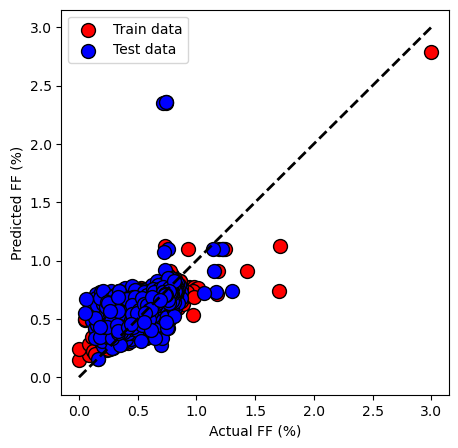

In [21]:
from catboost import CatBoostRegressor


# Convert the data to CatBoost-compatible format
X_train_cat = np.array(X_train)
X_test_cat = np.array(X_test)
y_train_cat = np.array(y_train)
y_test_cat = np.array(y_test)

# Define the model
cb = CatBoostRegressor()

# Define the hyperparameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'loss_function': ['RMSE', 'MAE']
}

# Define the search object
search = GridSearchCV(cb, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train_cat, y_train_cat)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_cb = search.best_estimator_


model_builder(best_cb, y_train_cat, y_test_cat)

In [28]:
models = [best_rf, best_xgb, best_gbr, best_dt, best_svr, best_br, best_et, best_ridge, best_knr, best_cb] # List of models
model_names = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Decision Tree', 'Support Vector',
               'Bagging Regressor', 'Extra Trees', 'Ridge Regressor', 'kNR', 'CatBoost'] # List of model namves

r2_scores = []
mse_score = []
mae_score = []
rmse_score = []

for model, name in zip(models, model_names):
    if model == best_cb:
        y_pred_train = model.predict(X_train_cat)
        y_pred_test = model.predict(X_test_cat)
    else:
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        r2 = r2_score(y_test, y_pred_test)
        mse = mean_squared_error(y_test, y_pred_test)
        mae = mean_absolute_error(y_test, y_pred_test)

    r2_scores.append(r2)
    mse_score.append(mse)
    mae_score.append(mae)

    rmse = np.sqrt(mse)
    rmse_score.append(rmse)

    """
    plt.style.use('default')
    plt.figure(figsize=(5,5))
    plt.scatter(y_train, y_pred_train, c='r', label='Train data', edgecolors=(0, 0, 0), marker="o", s=100)
    plt.scatter(y_test, y_pred_test, c='b', label='Test data', edgecolors=(0, 0, 0), marker="o", s=100)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual El (%)')
    plt.ylabel('Predicted El (%)')
    plt.legend(loc='upper left')

    #plt.legend(loc='upper left')
    plt.savefig(pwd + '/results/figures/'+ name + '.png', dpi=500, bbox_inches="tight")
    plt.close()"""

In [29]:
df_model_evaluation = pd.DataFrame({
    'Model': model_names,
    'R2': r2_scores,
    'MSE': mse_score,
    'RMSE': rmse_score,
    'MAE': mae_score
})


df_model_evaluation = df_model_evaluation.sort_values(by=['R2'], ascending=False).reset_index(drop=True)
df_model_evaluation.to_csv(pwd + '/Hp_tuned_best_models/FF_Model_performance.csv', index=False)
df_model_evaluation # dataframe with evaluation parameters for each model

Model        R2       MSE      RMSE       MAE
0        Extra Trees  0.521833  0.006966  0.083460  0.054694
1      Random Forest  0.511155  0.007121  0.084387  0.056132
2  Gradient Boosting  0.456602  0.007916  0.088971  0.055704
3                kNR  0.435484  0.008223  0.090683  0.058045
4           CatBoost  0.435484  0.008223  0.090683  0.058045
5            XGBoost  0.426724  0.008351  0.091384  0.055567
6  Bagging Regressor  0.398882  0.008757  0.093577  0.055541
7      Decision Tree  0.391338  0.008867  0.094162  0.062276
8     Support Vector  0.315805  0.009967  0.099834  0.074299
9    Ridge Regressor  0.263522  0.010728  0.103578  0.075334